# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [30]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [31]:
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Import libraries to build Ensemble models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

import scipy.stats as stats

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [32]:
df_main = pd.read_csv("EasyVisa.csv") #Loading dataset

In [33]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

###View the first and last 5 rows of the data set.

In [ ]:
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0        592.20290         Hour                  Y      Denied  
1      83425.65000         Year                  Y   Certified  
2     122996.86000         Year                  Y      Denied  
3      83434.03000         Year                  Y      Denied  
4     149907.39000         Year                  Y   Certified

###Understanding the shape of the data set.

In [ ]:
data.shape

(25480, 12)

- There are 25480 rows and 12 columns in the original dataset.

###Checkng the unique values in each column.

In [ ]:

# Dictionary to store unique values for each feature
unique_values = {}

# Loop through each column in the DataFrame
for column in data.columns:
    # Get unique values for the current column
    unique_values[column] = set(data[column].unique())

# Print unique values for each feature
for feature, values in unique_values.items():
    print(f"Unique values for {feature}: {values}")


Unique values for case_id: {'EZYV13000', 'EZYV13951', 'EZYV15453', 'EZYV4850', 'EZYV15206', 'EZYV6106', 'EZYV3599', 'EZYV351', 'EZYV13029', 'EZYV7011', 'EZYV23575', 'EZYV900', 'EZYV4706', 'EZYV16630', 'EZYV1900', 'EZYV6516', 'EZYV13297', 'EZYV24744', 'EZYV9935', 'EZYV11204', 'EZYV18289', 'EZYV17223', 'EZYV10200', 'EZYV968', 'EZYV10567', 'EZYV9668', 'EZYV3043', 'EZYV9596', 'EZYV18193', 'EZYV12632', 'EZYV21782', 'EZYV7014', 'EZYV17225', 'EZYV17231', 'EZYV2588', 'EZYV17919', 'EZYV9108', 'EZYV3672', 'EZYV19316', 'EZYV4431', 'EZYV8715', 'EZYV5772', 'EZYV21416', 'EZYV23189', 'EZYV1207', 'EZYV5336', 'EZYV3404', 'EZYV8366', 'EZYV2199', 'EZYV11976', 'EZYV6667', 'EZYV11155', 'EZYV15615', 'EZYV20512', 'EZYV8103', 'EZYV1623', 'EZYV22139', 'EZYV16299', 'EZYV23183', 'EZYV10197', 'EZYV14251', 'EZYV3414', 'EZYV2729', 'EZYV5429', 'EZYV21058', 'EZYV3859', 'EZYV12491', 'EZYV2867', 'EZYV25315', 'EZYV8608', 'EZYV12940', 'EZYV10384', 'EZYV1546', 'EZYV22991', 'EZYV497', 'EZYV20767', 'EZYV5795', 'EZYV13478', 

###Checking value count of case_status

In [ ]:
data['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- Classes in feature to be predicted is imbalanced

###Check data types of features in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- All datatypes for the various features are ok, nothing is out of place.

- Though, the features with object as data type needs to be converted to category to reduce memoery usage and reduce computational time.

###Fixing data types

In [ ]:
#Assigning features with object data type to a variable.
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
#Changing object datatype to category
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
#Checking data types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


- There are no more features with object data type.

###Checking for missing values.

In [ ]:
#Checking for missing values
missing_values = data.isnull().sum()
print(f'There are {missing_values.sum()} missing values')


There are 0 missing values


###Checking for duplicates.

In [ ]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f'There are {duplicates} duplicates')

There are 0 duplicates


###Statistical summary of data

In [ ]:
#Checking statistical summary
data.describe(include='all').T

count unique         top   freq        mean  \
case_id                     25480  25480      EZYV01      1         NaN   
continent                   25480      6        Asia  16861         NaN   
education_of_employee       25480      4  Bachelor's  10234         NaN   
has_job_experience          25480      2           Y  14802         NaN   
requires_job_training       25480      2           N  22525         NaN   
no_of_employees       25480.00000    NaN         NaN    NaN  5667.04321   
yr_of_estab           25480.00000    NaN         NaN    NaN  1979.40993   
region_of_employment        25480      5   Northeast   7195         NaN   
prevailing_wage       25480.00000    NaN         NaN    NaN 74455.81459   
unit_of_wage                25480      4        Year  22962         NaN   
full_time_position          25480      2           Y  22773         NaN   
case_status                 25480      2   Certified  17018         NaN   

                              std        min         25%         50%  \
case_id                       NaN        NaN         NaN         NaN   
continent                     NaN        NaN         NaN         NaN   
education_of_employee         NaN        NaN         NaN         NaN   
has_job_experience            NaN        NaN         NaN         NaN   
requires_job_training         NaN        NaN         NaN         NaN   
no_of_employees       22877.92885  -26.00000  1022.00000  2109.00000   
yr_of_estab              42.36693 1800.00000  1976.00000  1997.00000   
region_of_employment          NaN        NaN         NaN         NaN   
prevailing_wage       52815.94233    2.13670 34015.48000 70308.21000   
unit_of_wage                  NaN        NaN         NaN         NaN   
full_time_position            NaN        NaN         NaN         NaN   
case_status                   NaN        NaN         NaN         NaN   

                               75%          max  
case_id                        NaN          NaN  
continent                      NaN          NaN  
education_of_employee          NaN          NaN  
has_job_experience             NaN          NaN  
requires_job_training          NaN          NaN  
no_of_employees         3504.00000 602069.00000  
yr_of_estab             2005.00000   2016.00000  
region_of_employment           NaN          NaN  
prevailing_wage       107735.51250 319210.27000  
unit_of_wage                   NaN          NaN  
full_time_position             NaN          NaN  
case_status                    NaN          NaN

- The oldest employer company was established in 1800, while the youngest was established in 2005.
- The highest prevailing wage was 319,210 dollars while the least prevailing wage is 2.1 dollars which is quite unusual though this could be an hourly wage.This will be further visualized later on.
- The employer company with the highest employees have 602,069 employees while the company with least number of employee have -26 employees which is obviously an error.The variance in this column is quite high.

In [ ]:
#Identifying rows with negative number of employees in company
negative_values_data = data[data['no_of_employees'] < 0]
negative_values_data

case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia              Master's                  N   
9872    EZYV9873         Europe              Master's                  Y   
11493  EZYV11494           Asia           High School                  Y   
13471  EZYV13472  North America              Master's                  N   
14022  EZYV14023           Asia            Bachelor's                  N   
14146  EZYV14147           Asia            Bachelor's                  N   
14726  EZYV14727           Asia              Master's                  N   
15600  EZYV15601           Asia            Bachelor's                  N   
15859  EZYV15860           Asia           High School                  N   
16157  EZYV16158           Asia              Master's                  Y   
16883  EZYV16884  North America            Bachelor's                  Y   
17006  EZYV17007           Asia             Doctorate                  Y   
17655  EZYV17656  North America            Bachelor's                  Y   
17844  EZYV17845           Asia            Bachelor's                  N   
17983  EZYV17984           Asia            Bachelor's                  N   
20815  EZYV20816           Asia            Bachelor's                  N   
20984  EZYV20985         Europe             Doctorate                  Y   
21255  EZYV21256  North America           High School                  N   
21760  EZYV21761           Asia            Bachelor's                  Y   
21944  EZYV21945         Africa              Master's                  Y   
22084  EZYV22085  North America            Bachelor's                  Y   
22388  EZYV22389           Asia              Master's                  Y   
23186  EZYV23187           Asia              Master's                  N   
23476  EZYV23477         Europe              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
245                       N              -25         1980   
378                       Y              -11         2011   
832                       N              -17         2002   
2918                      N              -26         2005   
6439                      N              -14         2013   
6634                      N              -26         1923   
7224                      N              -25         1998   
7281                      N              -14         2000   
7318                      Y              -26         2006   
7761                      N              -11         2009   
9872                      N              -26         1996   
11493                     N              -14         1999   
13471                     N              -17         2003   
14022                     Y              -11         1946   
14146                     Y              -26         1954   
14726                     N              -11         2000   
15600                     N              -14         2014   
15859                     N              -11         1969   
16157                     N              -11         1994   
16883                     N              -26         1968   
17006                     N              -11         1984   
17655                     N              -17         2007   
17844                

- The negative values in number of employees in employer company will be handled when treating outliers.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

Answer: Yes, educational level plays a big role in visa approvals, as seen in the visuals, the ratio of approvals increases with each employee higher level of education. To put in to perspective, over 80% of visa applications from employees with Doctorate were approved compared to the about 35% for those with only high school education.

2. How does the visa status vary across different continents?

Answer: There is no much difference in visa status accross the different continents,eventhough European employees slightly had more approvals than the employees from other continents.


3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

Answer: Yes, experience profeesionals are more likely to get their visa approved compared to employees with no experience. From the data, about 75% of experienced employees had their visas approved compared to about 55% for the employees without experience.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

Answer: The yearly pay unit is most likely to be approved, while the hourly pay unit is the least likely to be approved.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Answer: The prevailing wage does not happen to affect the approval status of the employees visa.

In [ ]:
#Creating a copy of dataset for EDA
data1 = data.copy()
#dropping unique identifier column 'case_id'
data1 = data1.drop('case_id', axis=1)  # Remove 'case_id:' column (axis=1 for columns)

In [ ]:
data1.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

###Creating user defined function to carryout EDA.

In [ ]:
#Defining custom variable t plot combine histogram and box plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data1, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data1[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data1[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data1[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data1,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Defining function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data1[predictor].nunique()
    sorter = data1[target].value_counts().index[-1]
    tab1 = pd.crosstab(data1[predictor], data1[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data1[predictor], data1[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data1[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data1[data1[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data1[data1[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data1, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate analysis

####Visualizing for features with countinous variable

<Figure size 640x480 with 0 Axes>

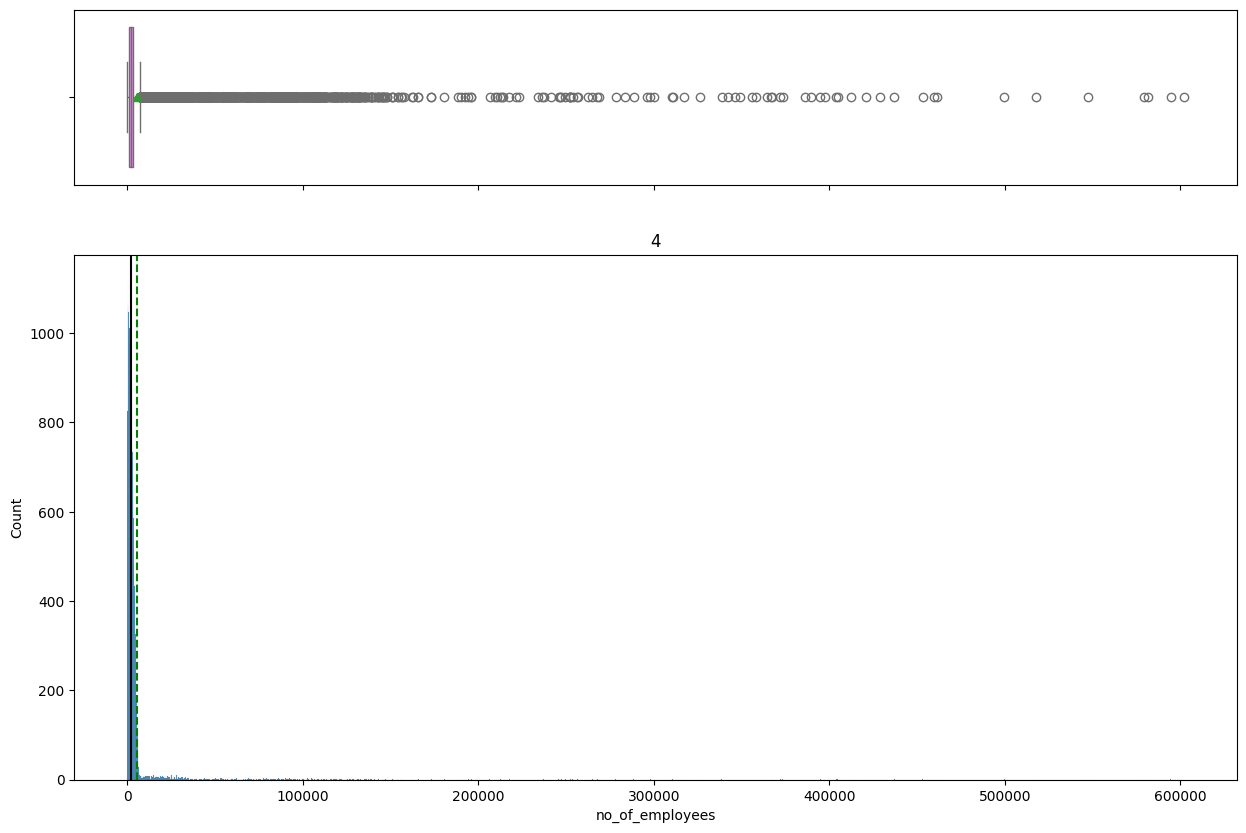

<Figure size 640x480 with 0 Axes>

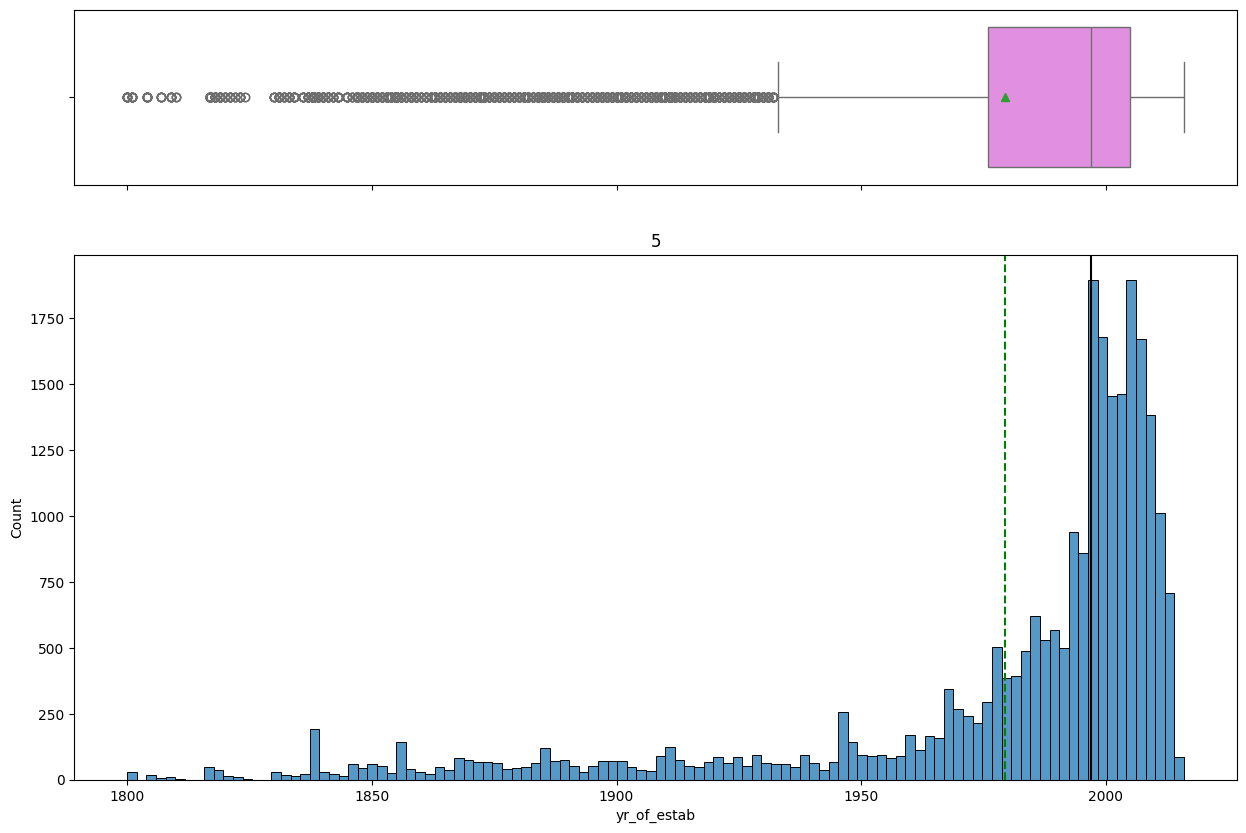

<Figure size 640x480 with 0 Axes>

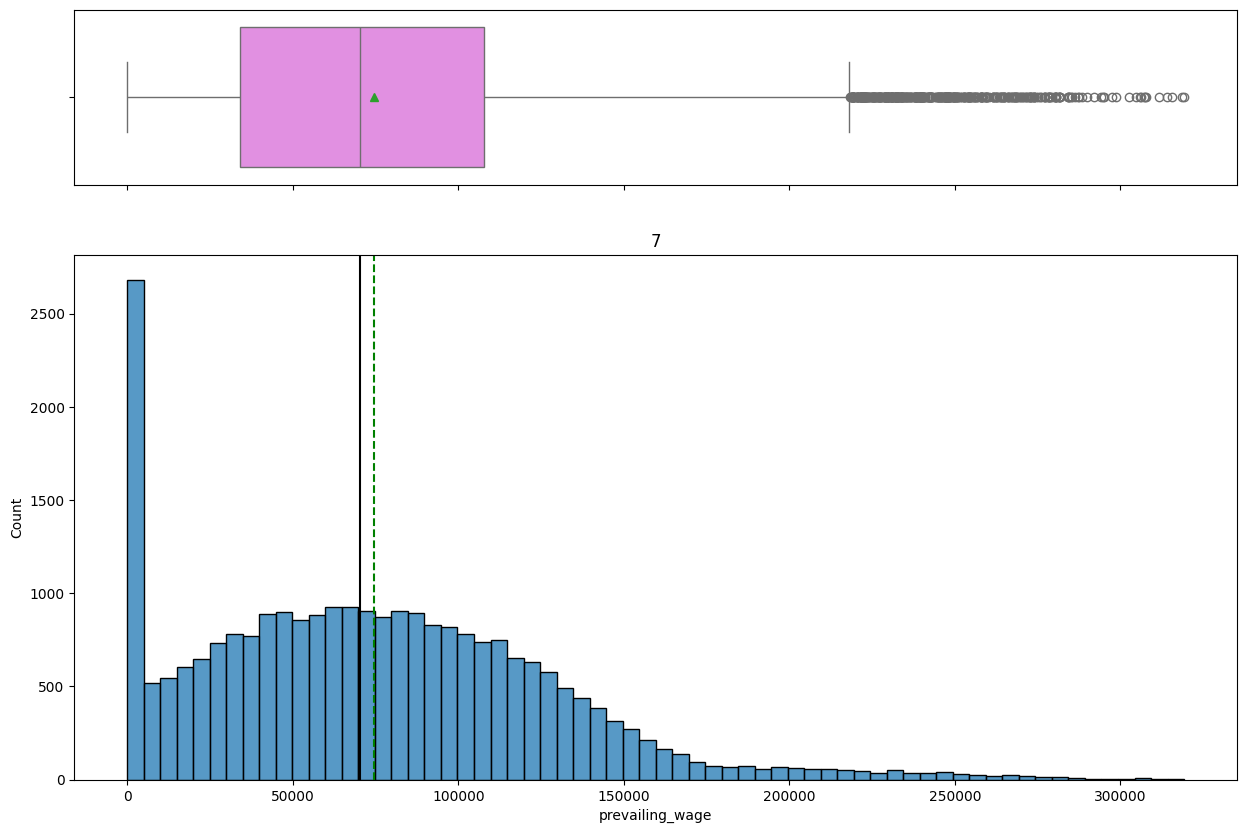

In [ ]:
# Check for continuous data types
continuous_cols = data.select_dtypes(include=[np.number])  # Select numeric columns

# Loop through continuous columns
for col in continuous_cols.columns:
    plt.figure()  # Create a new figure for each plot
    histogram_boxplot(data1, col)  # Pass the column name (feature)

    # Extract the column title from the DataFrame
    col_title = data1.columns.get_loc(col)  # Get the column index and use it to retrieve the title
    plt.title(col_title)  # Set the plot title using the column title
    plt.show()

- All the features with countinous data appear to have skewwed data distribution.

####Visalizing features with categorical variables

<Figure size 640x480 with 0 Axes>

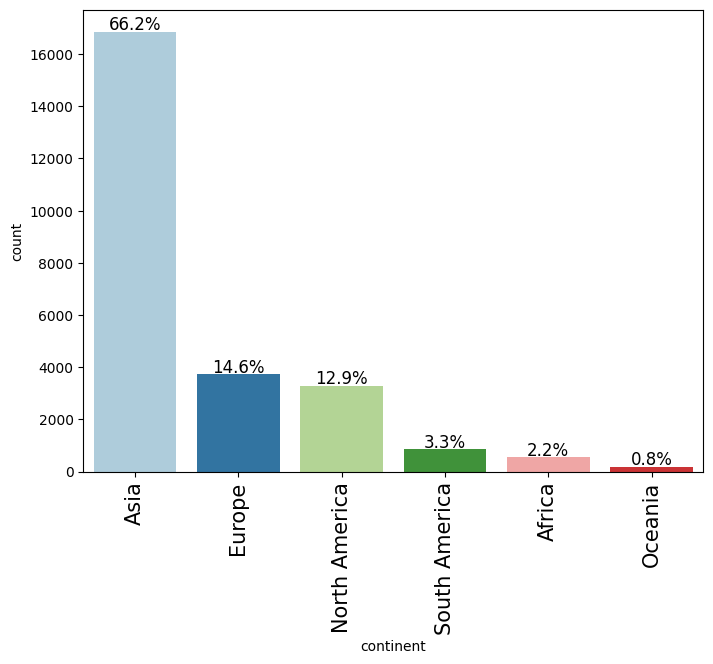

<Figure size 640x480 with 0 Axes>

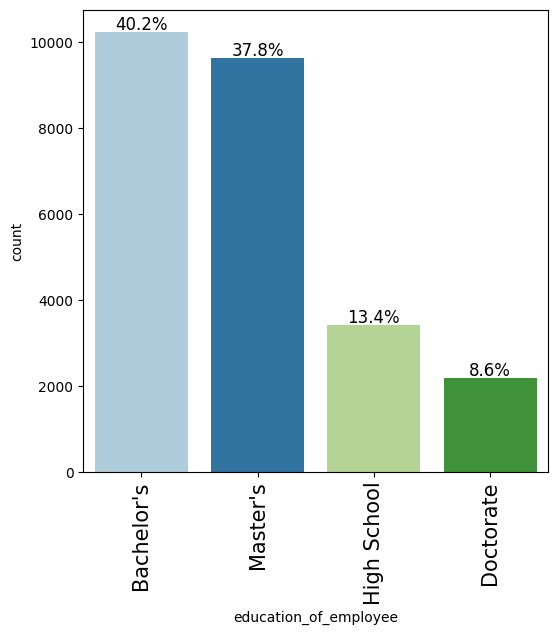

<Figure size 640x480 with 0 Axes>

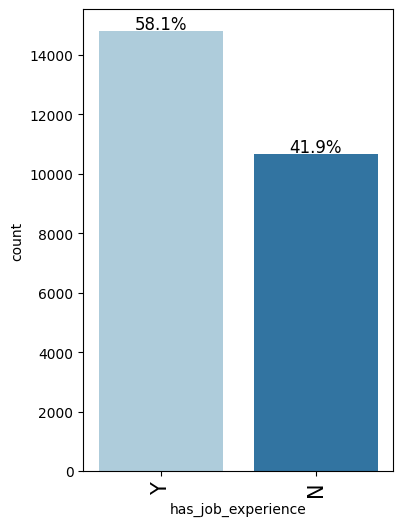

<Figure size 640x480 with 0 Axes>

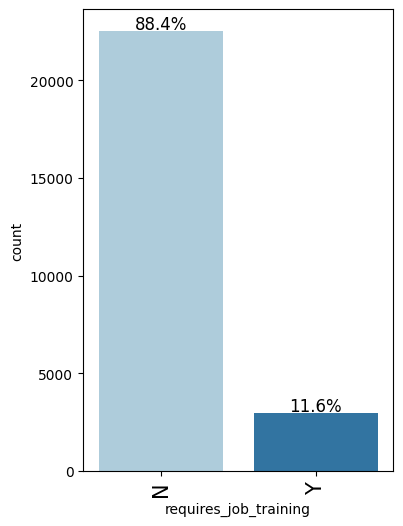

<Figure size 640x480 with 0 Axes>

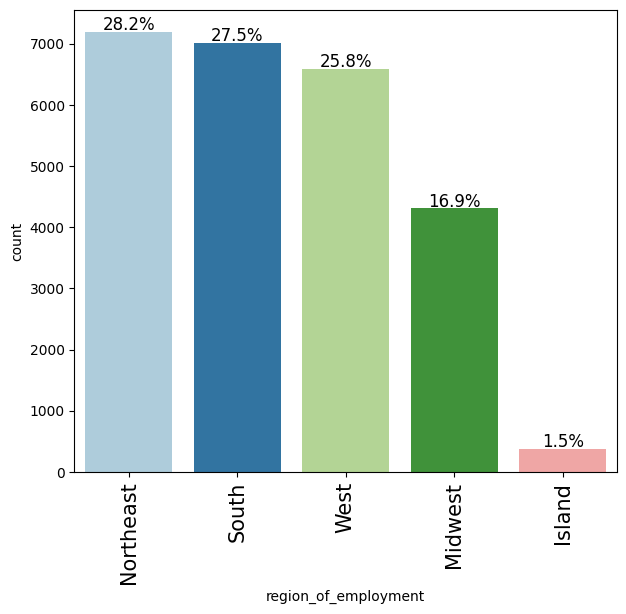

<Figure size 640x480 with 0 Axes>

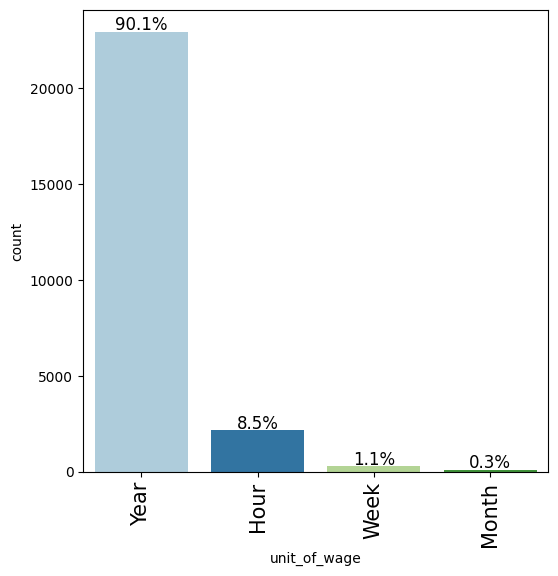

<Figure size 640x480 with 0 Axes>

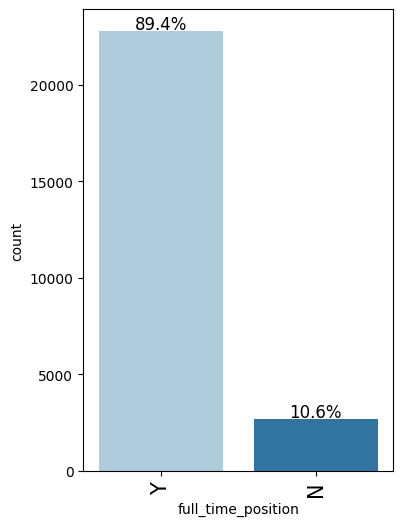

<Figure size 640x480 with 0 Axes>

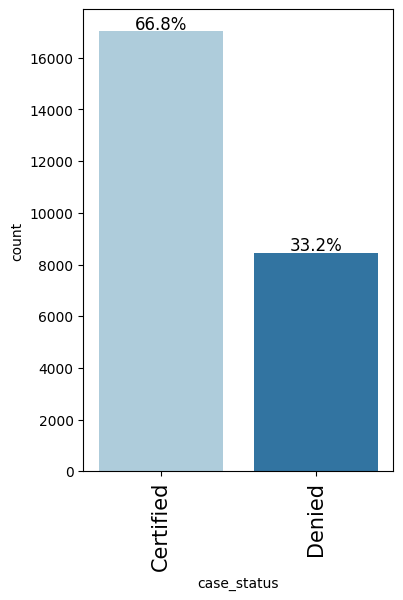

In [ ]:
# Check for categorical data types
categorical_cols = data1.select_dtypes(include=['object'])  # Select category columns (categorical data)


# Loop through categorical columns
for col in categorical_cols.columns:
   plt.figure()  # Create a new figure for each plot

   labeled_barplot(data, col)  # Plot bar chart of categorical variables

   plt.show();

**Observations**

- The continent with most employee visa application was Asia.
- Among all employee educational levels, those with Bachelor's degree formed the majority and Doctorate the least.
- The majority of employees had job experience, which further explains why many emplyees seeking visas did not require job training.
- Majority of employers sponsoring the visas where from the northeast, while the least number of employers came from the island.
- Majority of the employers listed the proposed unit wage for the employee as yearly.
- Majority of the job positions were on a full time basis.
- Majority of the visa applications were certified, Two-third to be precise.

###BIVARIATE ANALYSIS

####preparing data for bivariate visualization.

- Categorical variables will be encoded before been visualized on a correlaton heatmap.

In [ ]:
data2 = data1.copy()

In [ ]:
# Converting Boolean variables to binary coding
data2['case_status'] = data2['case_status'].replace({'Certified': 1, 'Denied': 0})
data2['full_time_position'] = data2['full_time_position'].replace({'Y': 1, 'N': 0})
data2['requires_job_training'] = data2['requires_job_training'].replace({'Y': 1, 'N': 0})
data2['has_job_experience'] = data2['has_job_experience'].replace({'Y': 1, 'N': 0})



In [ ]:
# One-hot encoding non-ordinal features
def create_dummies(data2, specific_cols):
    """
    Creates dummy variables for specific columns in a pandas DataFrame.

    Args:
        data: The pandas DataFrame.
        specific_cols (list): A list of column names to convert to dummy variables.

    Returns:
        pandas.DataFrame: The DataFrame with new dummy variables.
    """

    # Create dummy variables for the specified columns
    dummies = pd.get_dummies(data2[specific_cols], drop_first=False)

    # Drop the original columns from the DataFrame
    data2 = data2.drop(columns=specific_cols)

    # Combine original data without the specified columns with dummy variables
    return pd.concat([data2, dummies], axis=1)


specific_cols = ['unit_of_wage', 'region_of_employment', 'continent']  # Columns to convert to dummies
data2 = create_dummies(data2, specific_cols)  # Saving dummy variables



In [ ]:
# Ordinal encoding features with natural order
data2['education_of_employee'] = data2['education_of_employee'].replace({'High School': 1, "Bachelor's": 2, "Master's": 3,'Doctorate': 4})

In [ ]:
data2.head()

education_of_employee  has_job_experience  requires_job_training  \
0                      1                   0                      0   
1                      3                   1                      0   
2                      2                   0                      1   
3                      2                   0                      0   
4                      3                   1                      0   

   no_of_employees  yr_of_estab  prevailing_wage  full_time_position  \
0            14513         2007        592.20290                   1   
1             2412         2002      83425.65000                   1   
2            44444         2008     122996.86000                   1   
3               98         1897      83434.03000                   1   
4             1082         2005     149907.39000                   1   

   case_status  unit_of_wage_Hour  unit_of_wage_Month  unit_of_wage_Week  \
0            0                  1                   0                  0   
1            1                  0                   0                  0   
2            0                  0                   0                  0   
3            0                  0                   0                  0   
4            1                  0                   0                  0   

   unit_of_wage_Year  region_of_employment_Island  \
0                  0                            0   
1                  1                            0   
2                  1                            0   
3                  1                            0   
4                  1                            0   

   region_of_employment_Midwest  region_of_employment_Northeast  \
0                             0                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   region_of_employment_South  region_of_employment_West  continent_Africa  \
0                           0                          1                 0   
1                           0                          0                 0   
2                           0                          1                 0   
3                           0                          1                 0   
4                           1                          0                 1   

   continent_Asia  continent_Europe  continent_North America  \
0               1                 0                        0   
1               1                 0                        0   
2               1                 0                        0   
3               1                 0                        0   
4               0                 0                        0   

   continent_Oceania  continent_South America  
0                  0                        0  
1                  0                        0  
2                  0                        0  
3                  0                        0  
4                  0                        0

####Correlation Heatmap

In [ ]:
# creating a list of numerical columns
num_cols = data2.select_dtypes(include=np.number).columns.tolist()

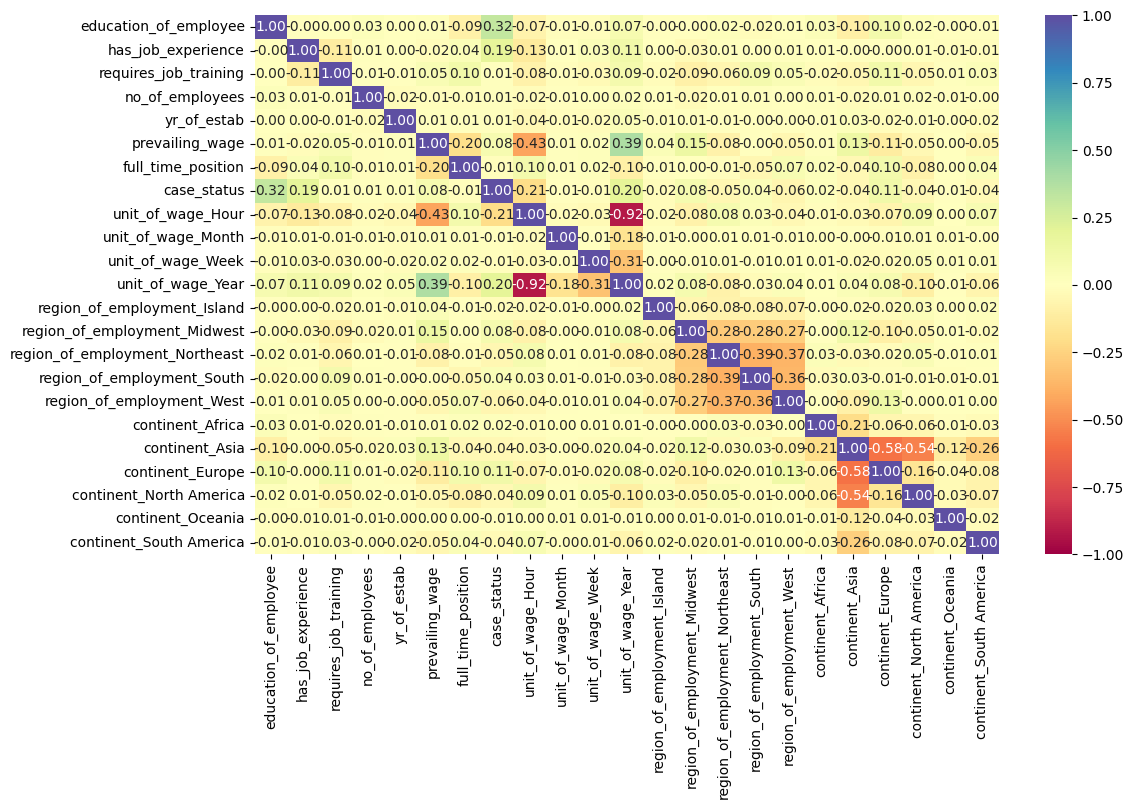

In [ ]:
#plotting correlation heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    data2[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

**Observations**

- There is strong negative correlation between yearly and hourly wages, which is expected.
- There is a positive corrrelation between prevailing wage for the location and yearly wage unit. This may imply, employers tend to pay more when wage is calculated yearly, this is common in white collar jobs and mid to senior level positions.
-There is a negative correlation between prevailing wages and hourly wage unit, as this implies the average pay for a job is likely lesser if its calculated hourly. This is common in blue collar jobs.
- There weak negative correlations for features among continent as well as those from region of employment. This is expected as they are dummy variables.


#### Case_status vs education of employee

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

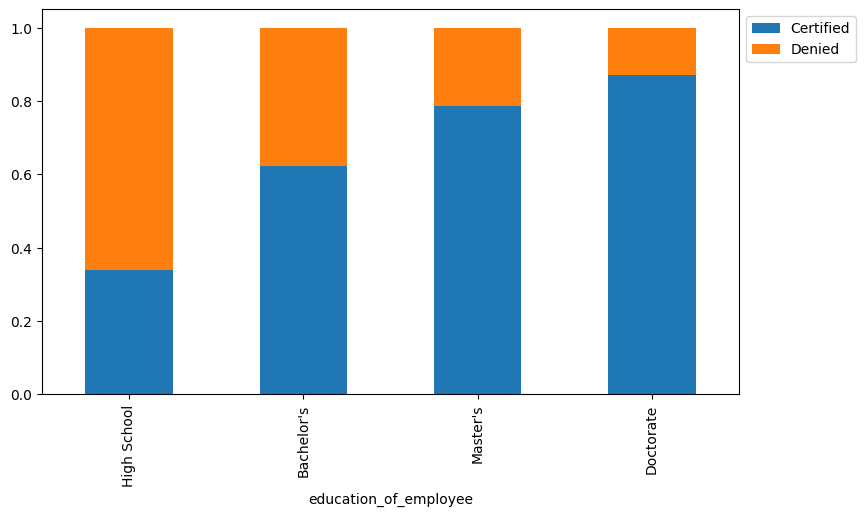

In [ ]:
plt.figure()
stacked_barplot(data,'education_of_employee', 'case_status')
plt.show();

- Visa approval rates steadily increases with employees level of education.This may imply Level of education a role in visa case status.

#### Case_status vs has job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

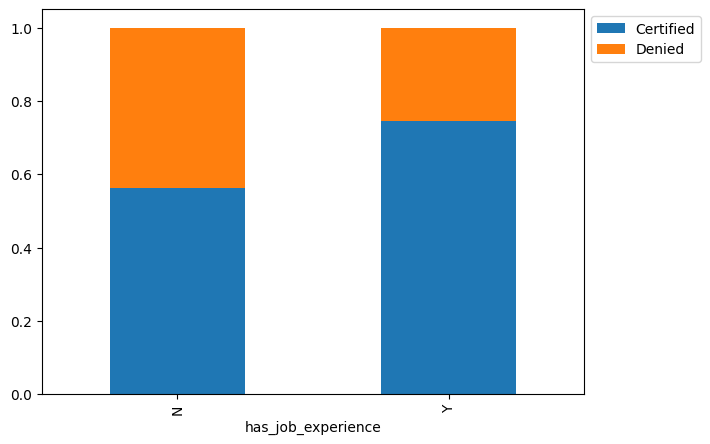

In [ ]:
plt.figure()
stacked_barplot(data,'has_job_experience','case_status' )
plt.show();

- Employees with previous job experience had about 70% chance of their visa getting approved when compared to those without job experience who had about a 50% chance, which is just next to luck.
- This findings may imply job experience play a role in the final visa case status.

#### Case_status vs requires job training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

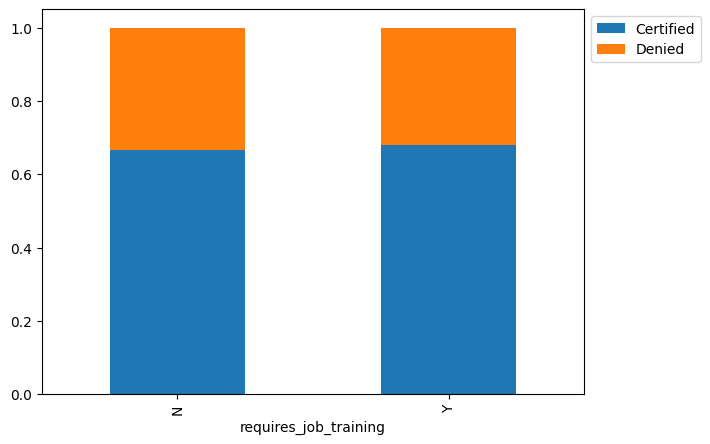

In [ ]:
plt.figure()
stacked_barplot(data,'requires_job_training','case_status', )

plt.show();

- There is no difference in visa approval rates between does who require job training and those who don't.

#### Case_status vs number of employees

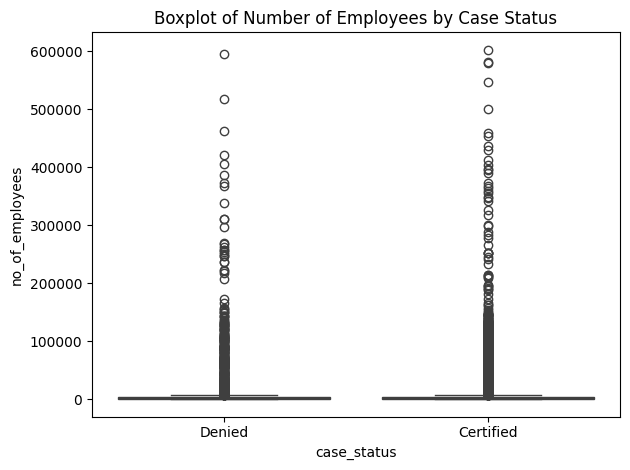

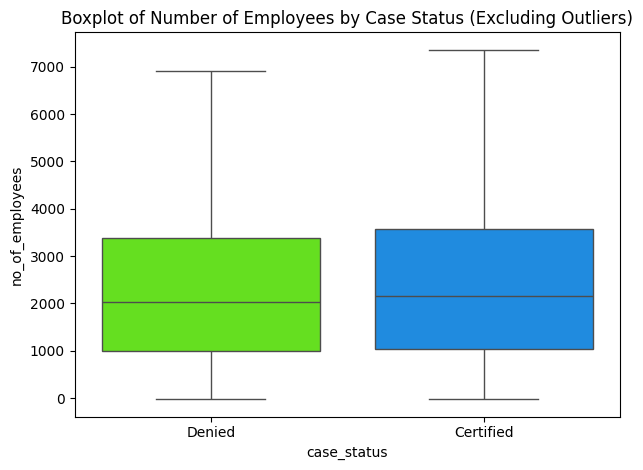

In [ ]:
plt.figure()
sns.boxplot(data = data,x = 'case_status' , y = 'no_of_employees')
plt.title('Boxplot of Number of Employees by Case Status')
plt.tight_layout()
plt.show();


sns.boxplot(data=data,x= 'case_status' ,y= 'no_of_employees',showfliers=False, palette="gist_rainbow")
plt.title('Boxplot of Number of Employees by Case Status (Excluding Outliers)')
plt.tight_layout()
plt.show();

- There is also no much difference for visa approval rates based on current employer staff size.

#### Case_status vs year company established

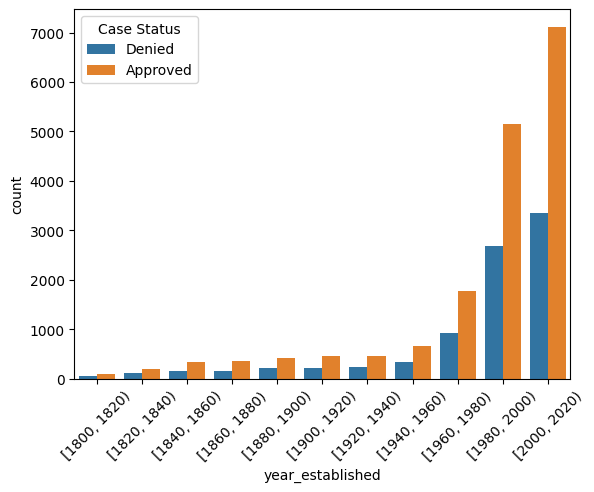

In [ ]:
# Calculate the bins based on 20-year intervals
data2['year_established'] = pd.cut(data2['yr_of_estab'], bins=range(data2['yr_of_estab'].min(), data2['yr_of_estab'].max() + 21, 20), right=False)

# Plot the countplot with the specified bins
plt.figure()
sns.countplot(data=data2, x='year_established', hue='case_status')
# Modify legend labels
plt.legend(title='Case Status', labels=['Denied', 'Approved'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- Employers whose companies were established from year 2000 till date formed the highest population of approvals and denials. This is understandable because majority of the companies sponssoring the visas for their employees were also established during this period.
- However, according to the different employer group based on year of company establishment, The ratio of approvals vs denials was almost 1:2. This may imply this factor may not play a major role in visa case status.

#### Case_status vs prevailing wage

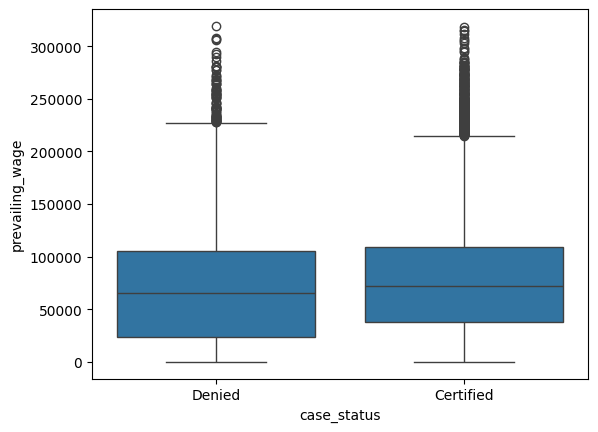

In [ ]:
plt.figure()
sns.boxplot(data, x = 'case_status', y ='prevailing_wage', )
plt.show();

There is not much dfference between visa application status for emplyees based of the prevailing wage of their jobs.

#### Case_status vs full time position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

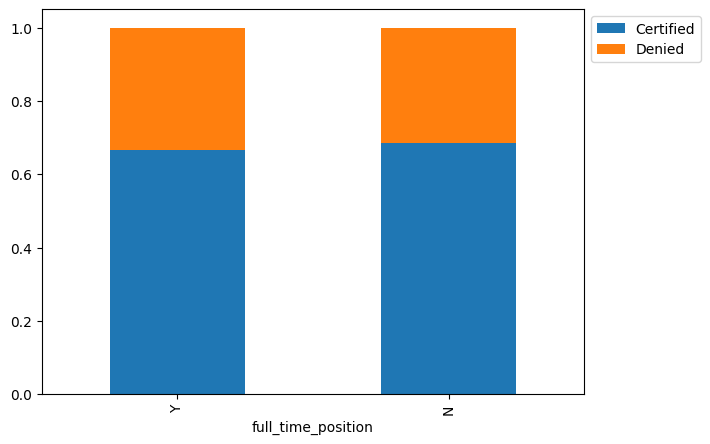

In [ ]:
plt.figure()
stacked_barplot(data,'full_time_position','case_status' )
plt.show();

- The ratio of visa approvals and denials does not seem to be affected by if the employees job is full time or not.

#### Case_status vs unit of wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

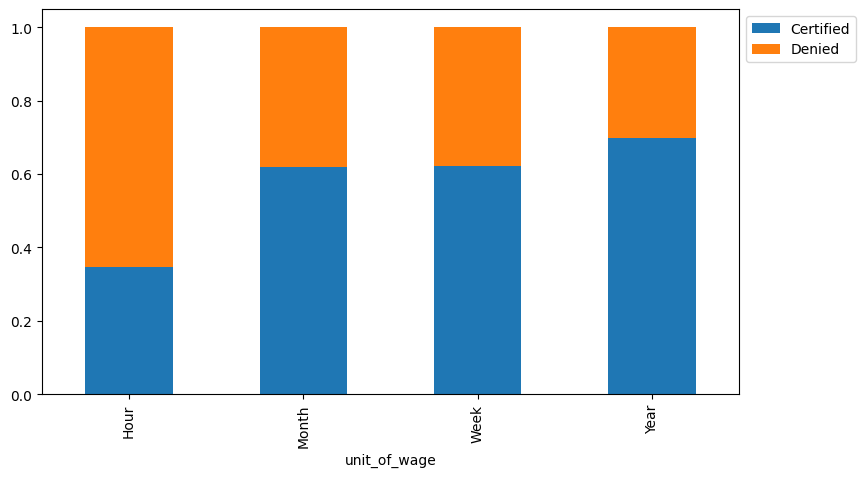

In [ ]:
plt.figure()
stacked_barplot(data,'unit_of_wage','case_status', )
plt.show();

- There seem to be far lesser visa approvals for employees whose job unit wage is listed as hourly. This observation may be as a result of very few visa applications filing Hourly unit of wage.
- The unit of wage based on these findings may play a major role in the final case status.

#### Case_status vs region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

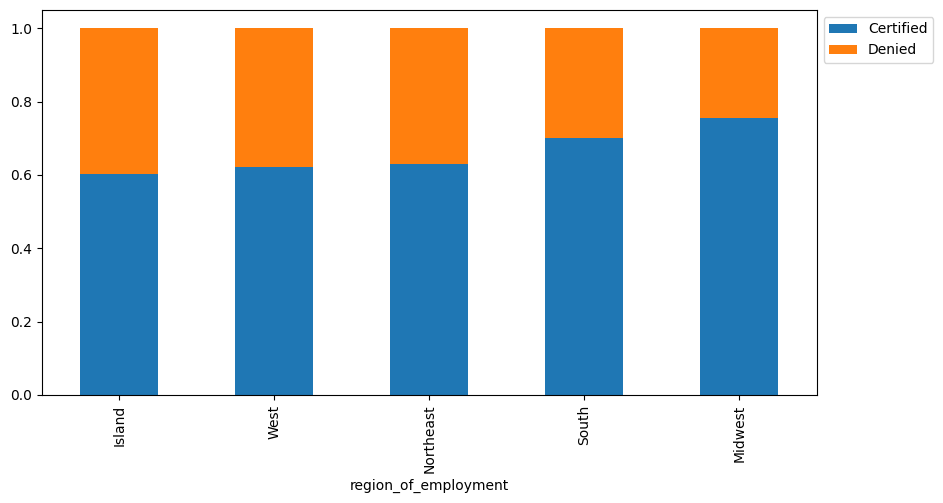

In [ ]:
plt.figure()
stacked_barplot(data,'region_of_employment','case_status', )
plt.show();

- All the regions seem to have the same visa approval rate, though the mid-west region seem to have slightly more visa approvals. This feature may have an impact on the final visa approval status.

#### Case_status vs continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

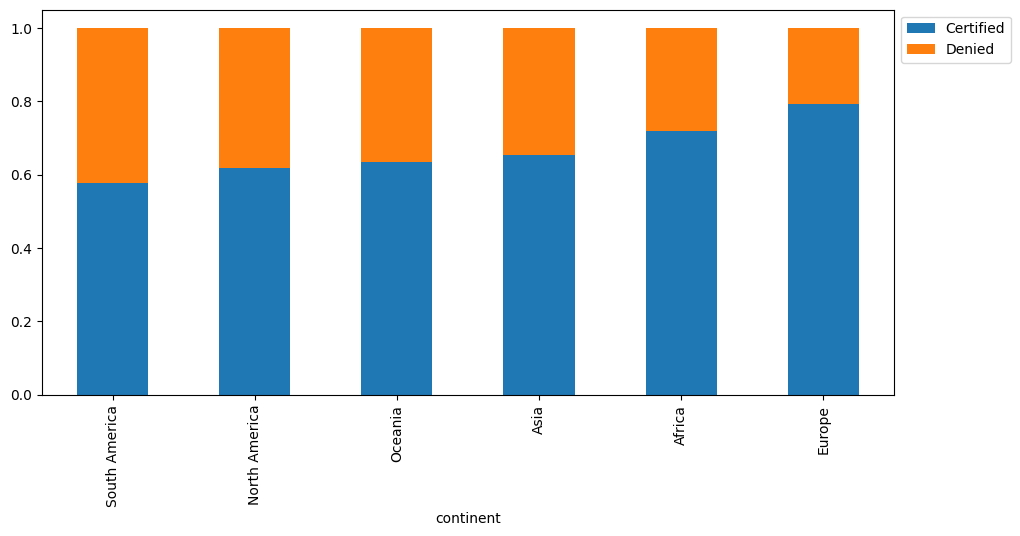

In [ ]:
plt.figure()
stacked_barplot(data,'continent','case_status', )
plt.show();

- Eventhough, Africa and Europe have slightly higher visa approval rates around 70% and 80% respectively. The approval rates for the other continents seem to be the same around 60%. This may imply this feature may not play much a role in the final visa case status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [34]:
df = data.copy() #Creating copy of data set from original dataset for preprocessing.

###1. Missing value handling

Checking for missing value in data set.

In [35]:
missing_values = df.isnull().sum() #Checking for missing values
print(f'There are {missing_values.sum()} missing values') #printing total missing values

There are 0 missing values


There are no missing values to handle.

###2. Feature engineering

No feature engineering needed.

###3. Outlier detection and treatment.

#####Outlier Detection.

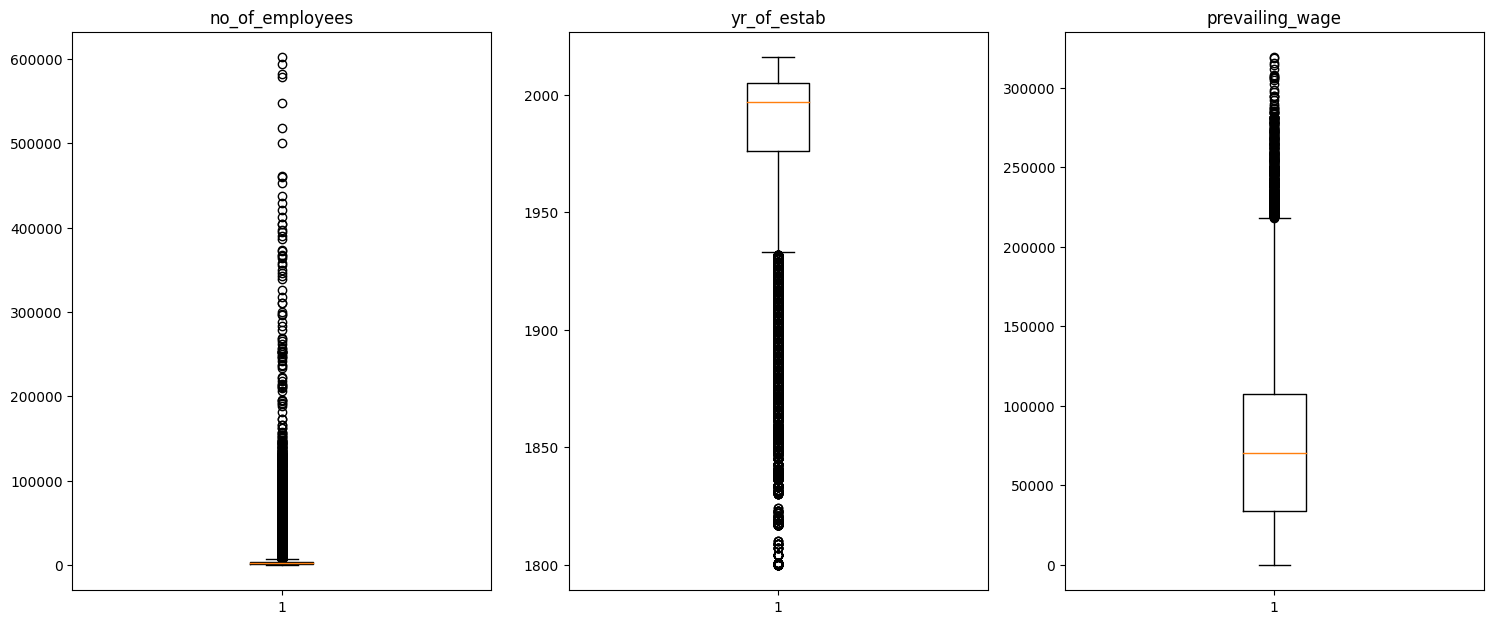

In [36]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist() #Assigning numerical columns to a variable
plt.figure(figsize=(20, 30))

#Creating for loop to visualize columns with outliers from numerical columns
for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

checking values of number of employees that were initially identified as negative and thus incorrect.

In [37]:
#Identifying rows with negative number of employees in company
negative_values_data = data[data['no_of_employees'] < 0]
negative_values_data

case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia              Master's                  N   
9872    EZYV9873         Europe              Master's                  Y   
11493  EZYV11494           Asia           High School                  Y   
13471  EZYV13472  North America              Master's                  N   
14022  EZYV14023           Asia            Bachelor's                  N   
14146  EZYV14147           Asia            Bachelor's                  N   
14726  EZYV14727           Asia              Master's                  N   
15600  EZYV15601           Asia            Bachelor's                  N   
15859  EZYV15860           Asia           High School                  N   
16157  EZYV16158           Asia              Master's                  Y   
16883  EZYV16884  North America            Bachelor's                  Y   
17006  EZYV17007           Asia             Doctorate                  Y   
17655  EZYV17656  North America            Bachelor's                  Y   
17844  EZYV17845           Asia            Bachelor's                  N   
17983  EZYV17984           Asia            Bachelor's                  N   
20815  EZYV20816           Asia            Bachelor's                  N   
20984  EZYV20985         Europe             Doctorate                  Y   
21255  EZYV21256  North America           High School                  N   
21760  EZYV21761           Asia            Bachelor's                  Y   
21944  EZYV21945         Africa              Master's                  Y   
22084  EZYV22085  North America            Bachelor's                  Y   
22388  EZYV22389           Asia              Master's                  Y   
23186  EZYV23187           Asia              Master's                  N   
23476  EZYV23477         Europe              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
245                       N              -25         1980   
378                       Y              -11         2011   
832                       N              -17         2002   
2918                      N              -26         2005   
6439                      N              -14         2013   
6634                      N              -26         1923   
7224                      N              -25         1998   
7281                      N              -14         2000   
7318                      Y              -26         2006   
7761                      N              -11         2009   
9872                      N              -26         1996   
11493                     N              -14         1999   
13471                     N              -17         2003   
14022                     Y              -11         1946   
14146                     Y              -26         1954   
14726                     N              -11         2000   
15600                     N              -14         2014   
15859                     N              -11         1969   
16157                     N              -11         1994   
16883                     N              -26         1968   
17006                     N              -11         1984   
17655                     N              -17         2007   
17844                

#####Treating outliers

From the data overview it was observed that in some applications filed, the total number of employees in the applying company had negative values which is actually impossible. These negative values may impact the performance of my models negatively, since they could include biase to the model.The negatve values are actually outlier,
Hence this will be the only outlier I will be treating. There are quite a few other numerical features with outliers, but they will not be treated because they are proper values.

In [38]:
# User defined functions to treat outliers by flooring and capping


def treat_outliers_lower(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR

    # Replace the lower whisker with zero if it's negative
    Lower_Whisker = max(0, Lower_Whisker)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker

    df[col] = np.clip(df[col], Lower_Whisker, np.inf)

    return df

In [39]:
#treating outliers with user defined function.
df = treat_outliers_lower(df, 'no_of_employees')

In [40]:
#Identifying rows with negative number of employees in company
negative_values_df = df[df['no_of_employees'] < 0]
negative_values_df

Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []

There are no more negative values in number of employees

###4. Preparing data for modelling.

- As identified earlier, there is significant imbalance in the ditribution of the target classes, since we are dealing with a classification problem, it is important to use stratified sampling. This will help preserve the relative class frequencies.
- This is done using the 'stratify' parameter in the training_test_split function.

In [41]:
# Converting Boolean variables to binary coding
df['case_status'] = df['case_status'].replace({'Certified': 1, 'Denied': 0})
df['full_time_position'] = df['full_time_position'].replace({'Y': 1, 'N': 0})
df['requires_job_training'] = df['requires_job_training'].replace({'Y': 1, 'N': 0})
df['has_job_experience'] = df['has_job_experience'].replace({'Y': 1, 'N': 0})

In [42]:
# Ordinal encoding features with natural order
df['education_of_employee'] = df['education_of_employee'].replace({'High School': 1, "Bachelor's": 2, "Master's": 3,'Doctorate': 4})

In [43]:
df = X = df.drop(['case_id'],axis=1)

In [44]:
# One-hot encoding non-ordinal features
def create_dummies(df, specific_cols):
    """
    Creates dummy variables for specific columns in a pandas DataFrame.

    Args:
        data: The pandas DataFrame.
        specific_cols (list): A list of column names to convert to dummy variables.

    Returns:
        pandas.DataFrame: The DataFrame with new dummy variables.
    """

    # Create dummy variables for the specified columns
    dummies = pd.get_dummies(df[specific_cols], drop_first=False)

    # Drop the original columns from the DataFrame
    df = df.drop(columns=specific_cols)

    # Combine original data without the specified columns with dummy variables
    return pd.concat([df, dummies], axis=1)


specific_cols = ['unit_of_wage', 'region_of_employment', 'continent']  # Columns to convert to dummies
df = create_dummies(df, specific_cols)  # Saving dummy variables

In [45]:
X = df.drop(['case_status'],axis=1)
y = df['case_status']

X = pd.get_dummies(X,drop_first=False)

In [46]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 22) (7644, 22)


In [47]:
y.value_counts(1)

case_status
1   0.66790
0   0.33210
Name: proportion, dtype: float64

In [48]:
y_test.value_counts(1)

case_status
1   0.66784
0   0.33216
Name: proportion, dtype: float64

In [49]:
df.head()

education_of_employee  has_job_experience  requires_job_training  \
0                      1                   0                      0   
1                      3                   1                      0   
2                      2                   0                      1   
3                      2                   0                      0   
4                      3                   1                      0   

   no_of_employees  yr_of_estab  prevailing_wage  full_time_position  \
0            14513         2007        592.20290                   1   
1             2412         2002      83425.65000                   1   
2            44444         2008     122996.86000                   1   
3               98         1897      83434.03000                   1   
4             1082         2005     149907.39000                   1   

   case_status  unit_of_wage_Hour  unit_of_wage_Month  unit_of_wage_Week  \
0            0               True               False              False   
1            1              False               False              False   
2            0              False               False              False   
3            0              False               False              False   
4            1              False               False              False   

   unit_of_wage_Year  region_of_employment_Island  \
0              False                        False   
1               True                        False   
2               True                        False   
3               True                        False   
4               True                        False   

   region_of_employment_Midwest  region_of_employment_Northeast  \
0                         False                           False   
1                         False                            True   
2                         False                           False   
3                         False                           False   
4                         False                           False   

   region_of_employment_South  region_of_employment_West  continent_Africa  \
0                       False                       True             False   
1                       False                      False             False   
2                       False                       True             False   
3                       False                       True             False   
4                        True                      False              True   

   continent_Asia  continent_Europe  continent_North America  \
0            True             False                    False   
1            True             False                    False   
2            True             False                    False   
3            True             False                    False   
4           False             False                    False   

   continent_Oceania  continent_South America  
0              False                    False  
1              False                    False  
2              False                    False  
3              False                    False  
4              False                    False

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   yr_of_estab                     25480 non-null  int64  
 5   prevailing_wage                 25480 non-null  float64
 6   full_time_position              25480 non-null  int64  
 7   case_status                     25480 non-null  int64  
 8   unit_of_wage_Hour               25480 non-null  bool   
 9   unit_of_wage_Month              25480 non-null  bool   
 10  unit_of_wage_Week               25480 non-null  bool   
 11  unit_of_wage_Year               25480 non-null  bool   
 12  region_of_employment_Island     

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## EDA

- It is a good idea to explore the data once again after manipulating it.

###custom function

In [ ]:
#Defining custom variable t plot combine histogram and box plot
def histogram_boxplot1(df, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot1(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Defining function to plot stacked barplot
def stacked_barplot1(data, predictor, target, legend_labels=None, xlabel=None):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    legend_labels: list of legend labels (optional)
    xlabel: label for the x-axis (optional)
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    # Customize legend if legend_labels provided
    if legend_labels:
        plt.legend(legend_labels, loc="upper left", bbox_to_anchor=(1, 1))

    # Set X label if xlabel provided
    if xlabel:
        plt.xlabel(xlabel)

    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target1(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data1[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_lay

###Univariate analysis

<Figure size 640x480 with 0 Axes>

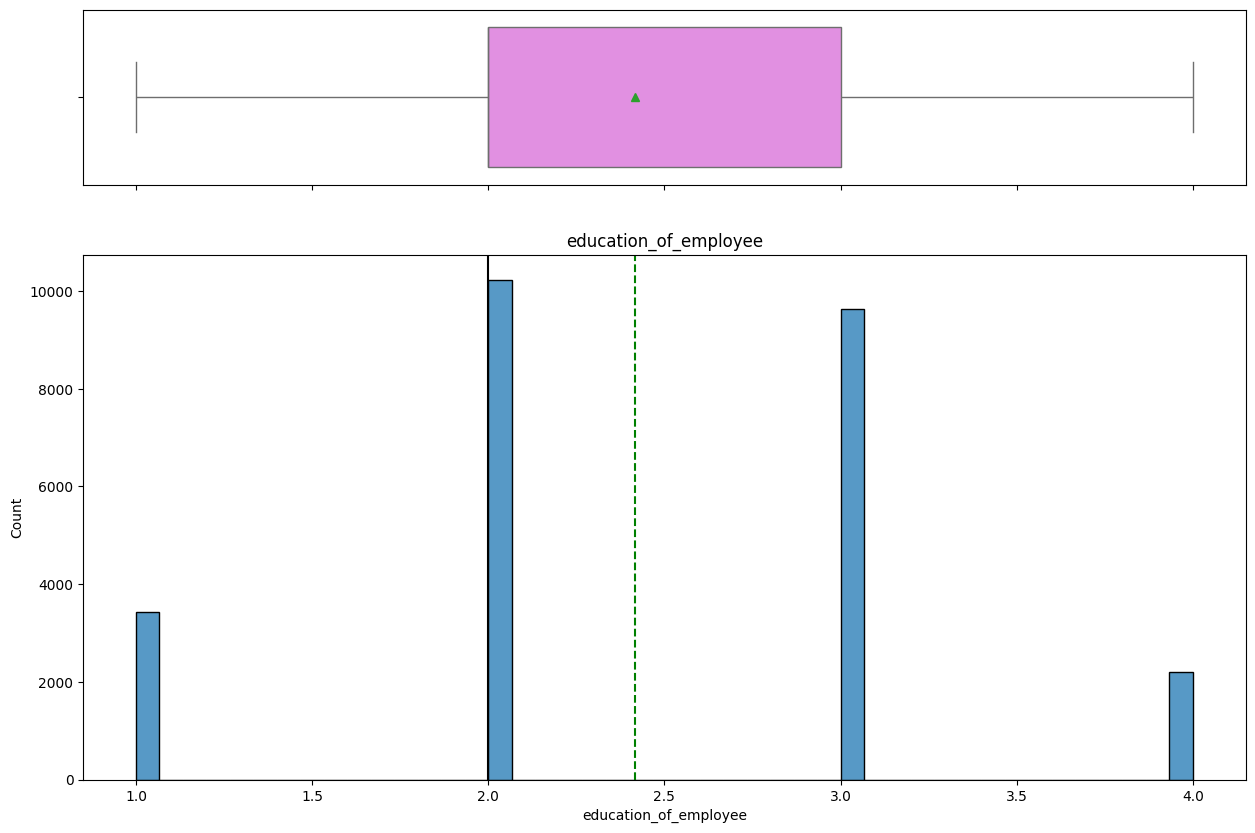

<Figure size 640x480 with 0 Axes>

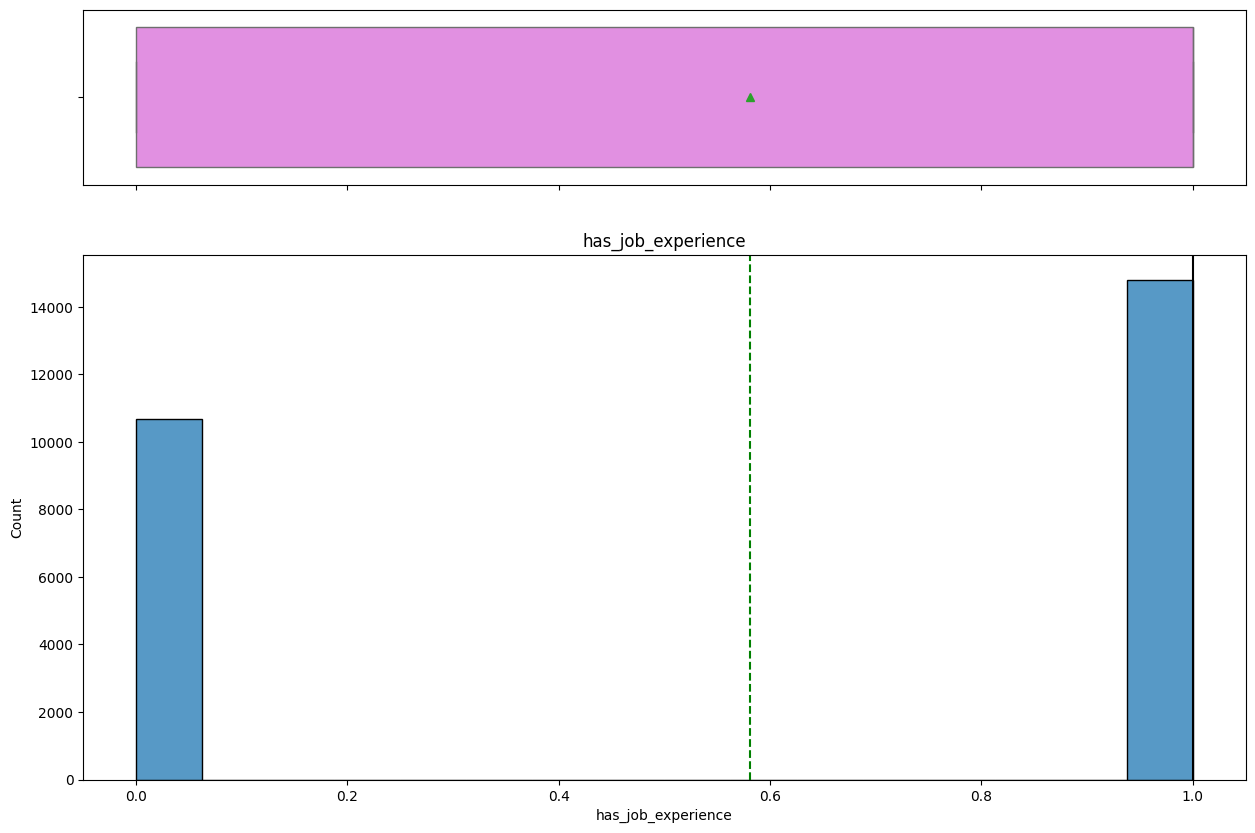

<Figure size 640x480 with 0 Axes>

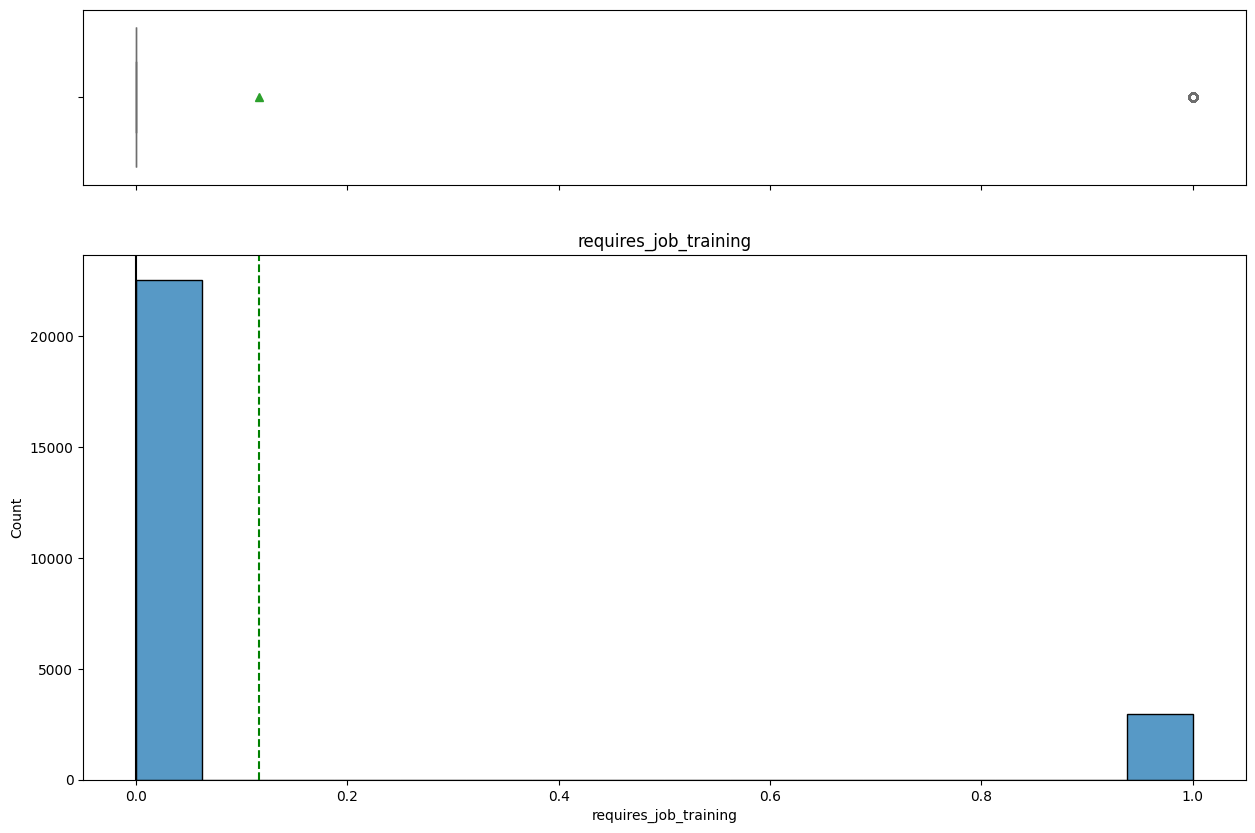

<Figure size 640x480 with 0 Axes>

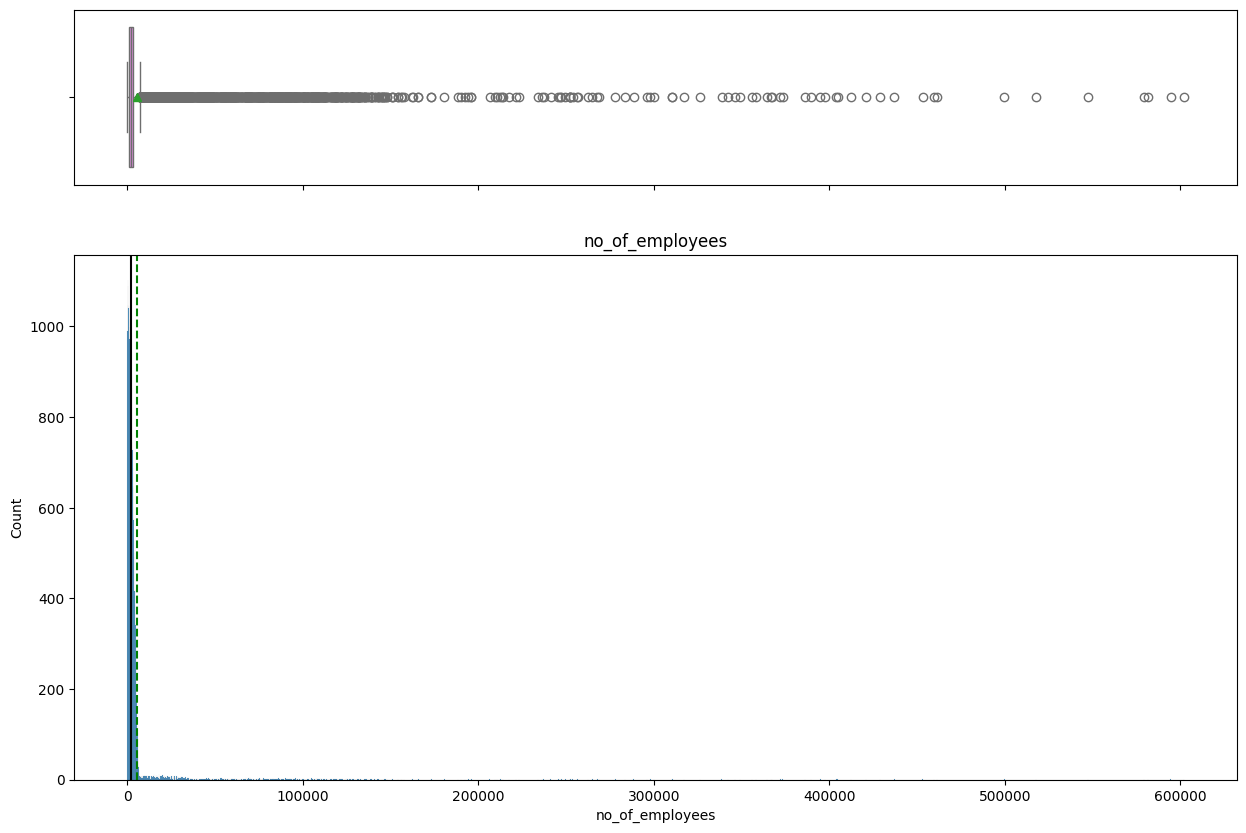

<Figure size 640x480 with 0 Axes>

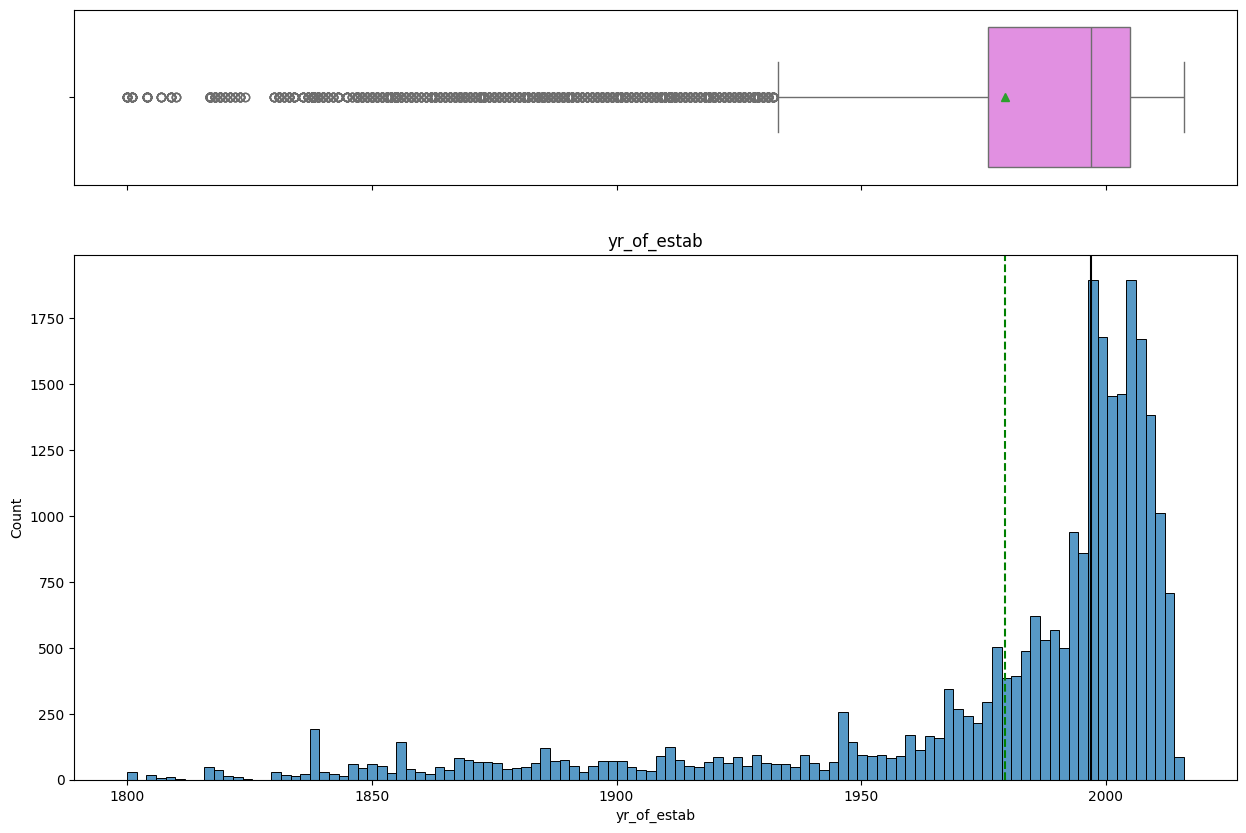

<Figure size 640x480 with 0 Axes>

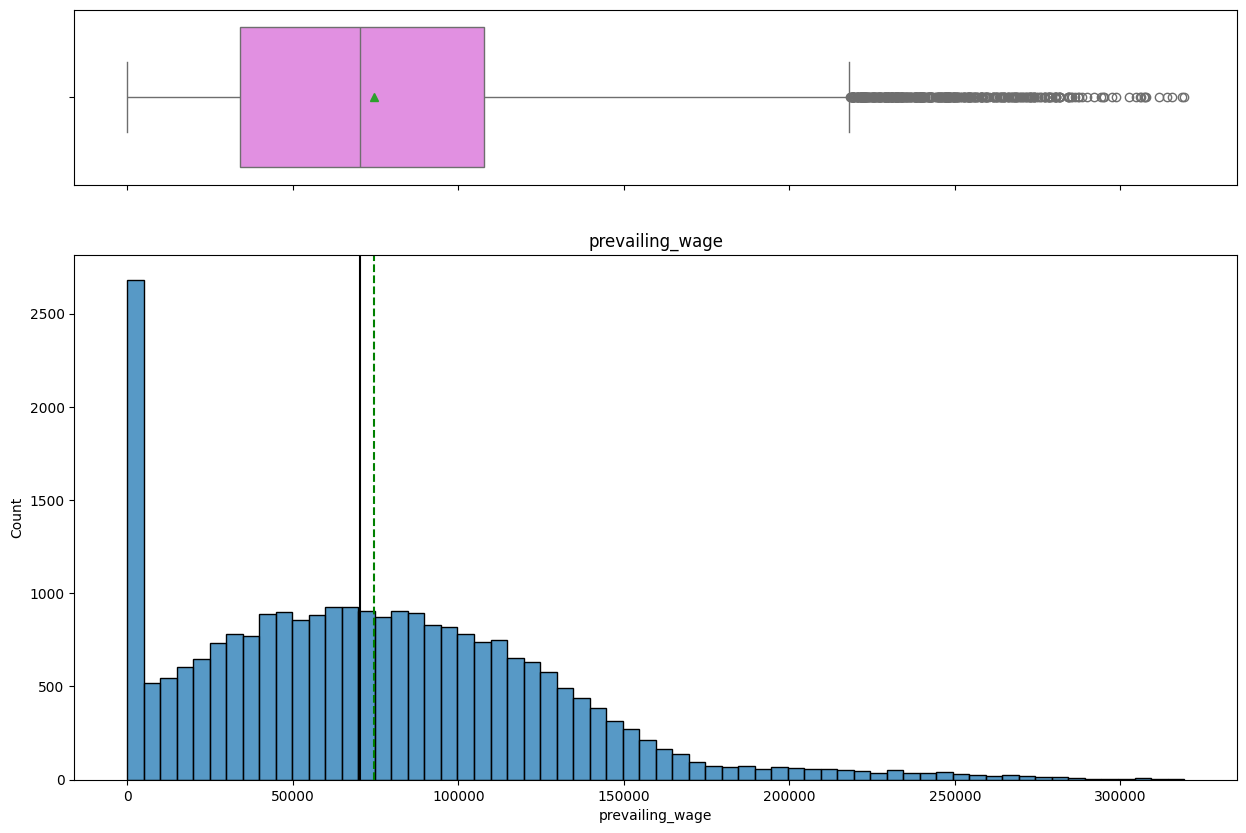

<Figure size 640x480 with 0 Axes>

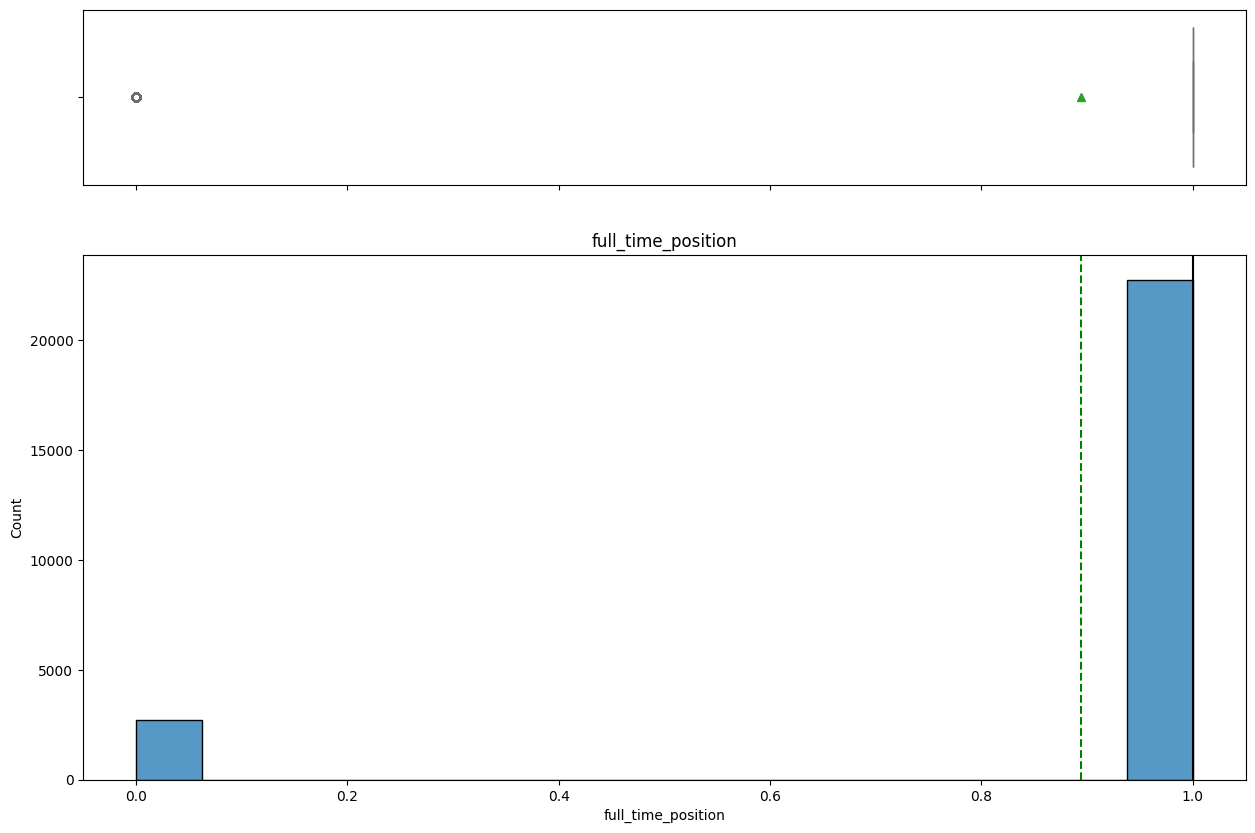

<Figure size 640x480 with 0 Axes>

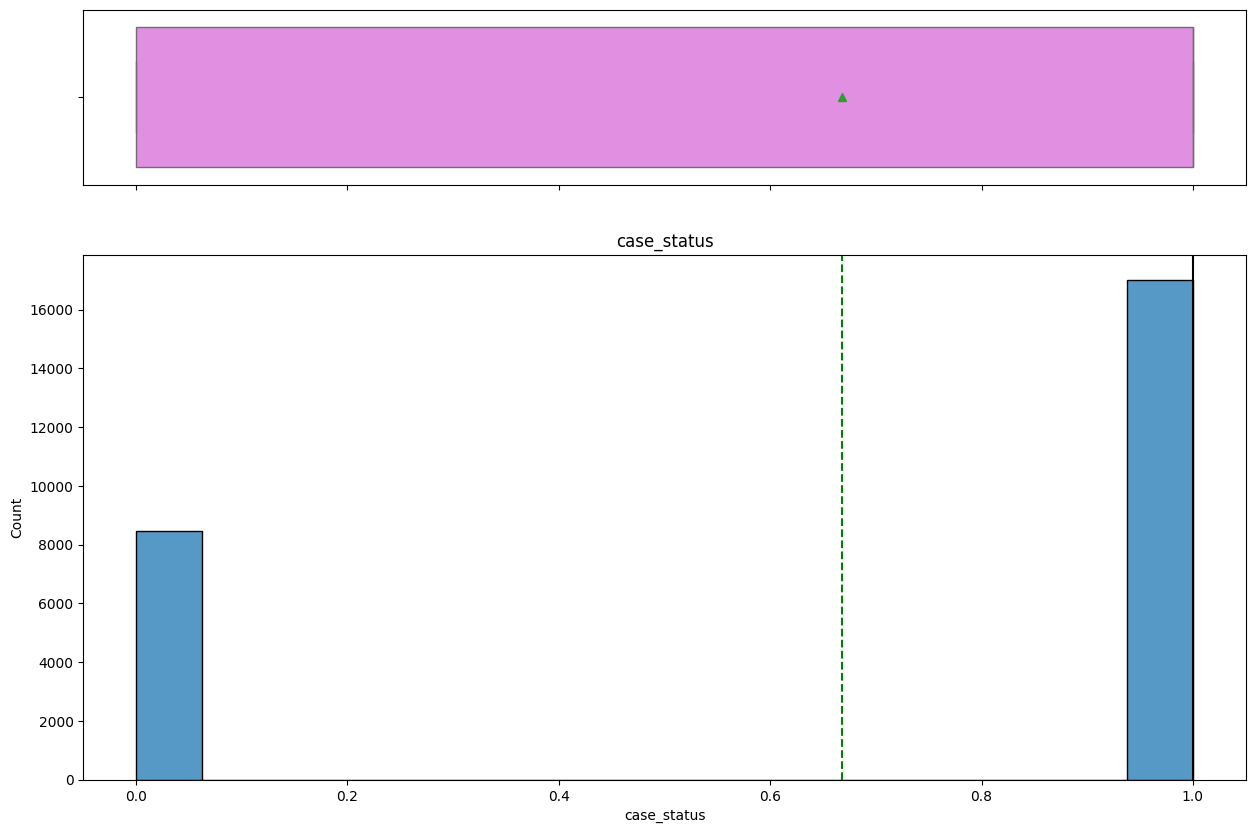

<Figure size 640x480 with 0 Axes>

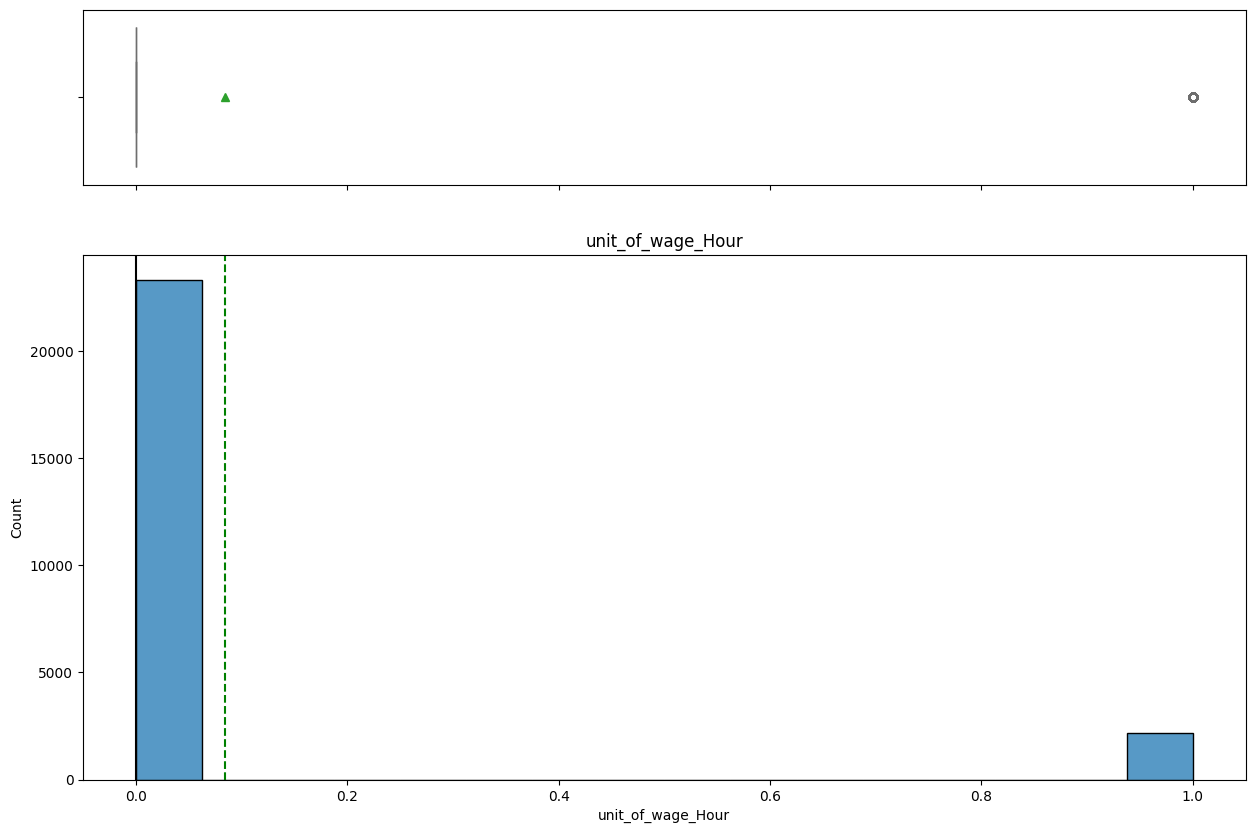

<Figure size 640x480 with 0 Axes>

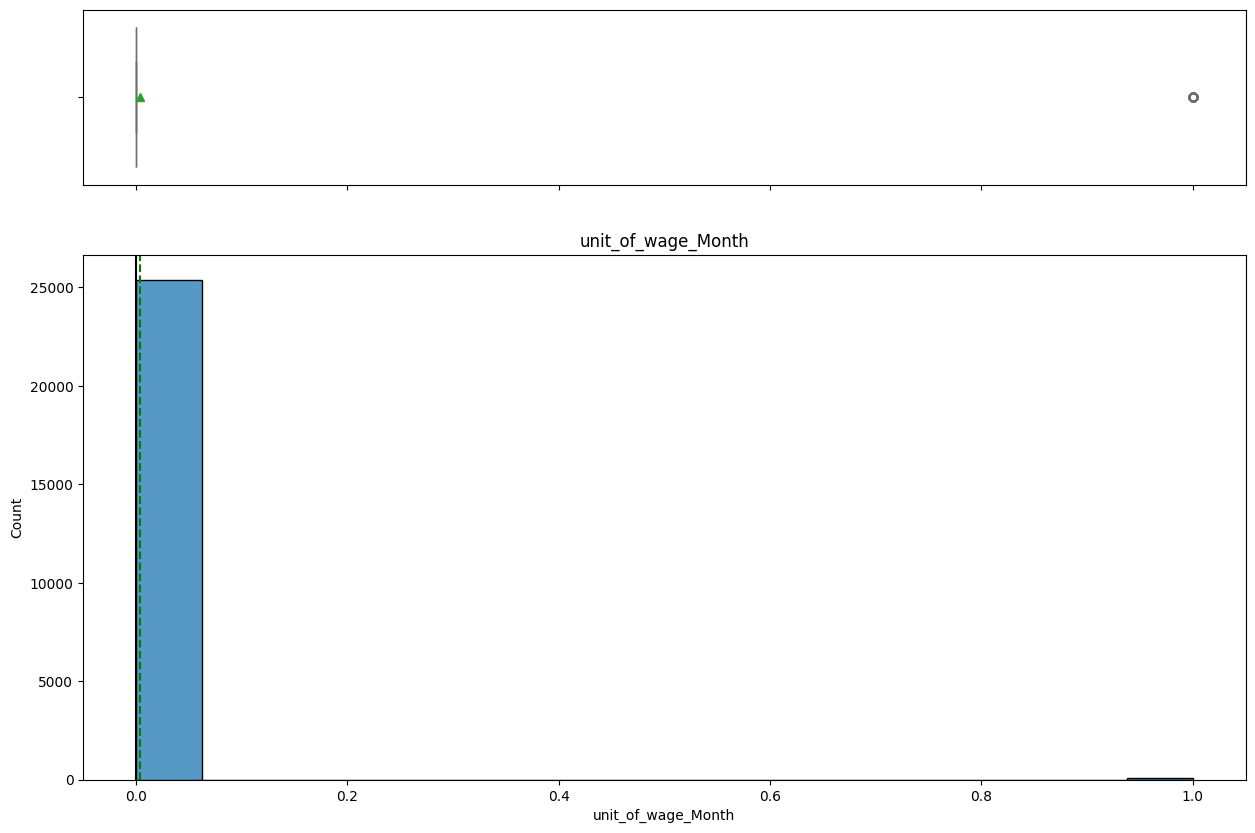

<Figure size 640x480 with 0 Axes>

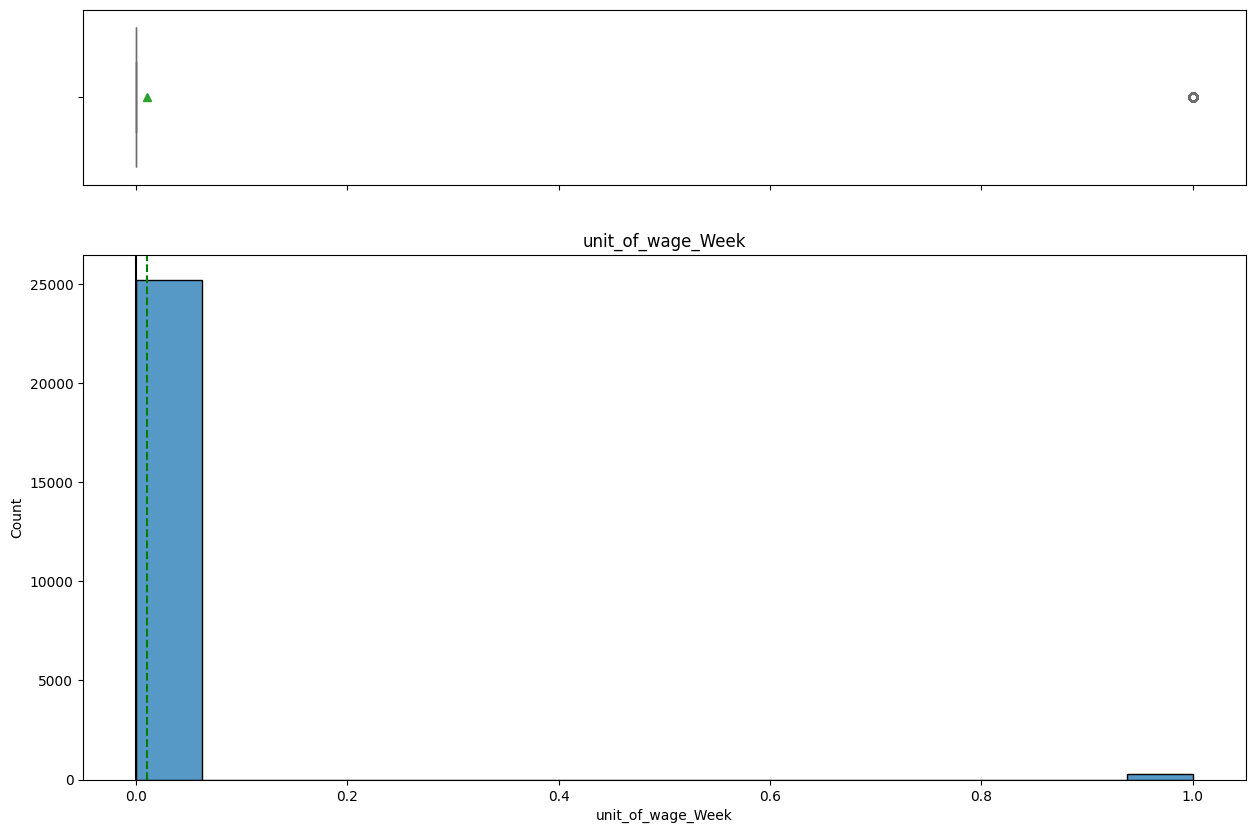

<Figure size 640x480 with 0 Axes>

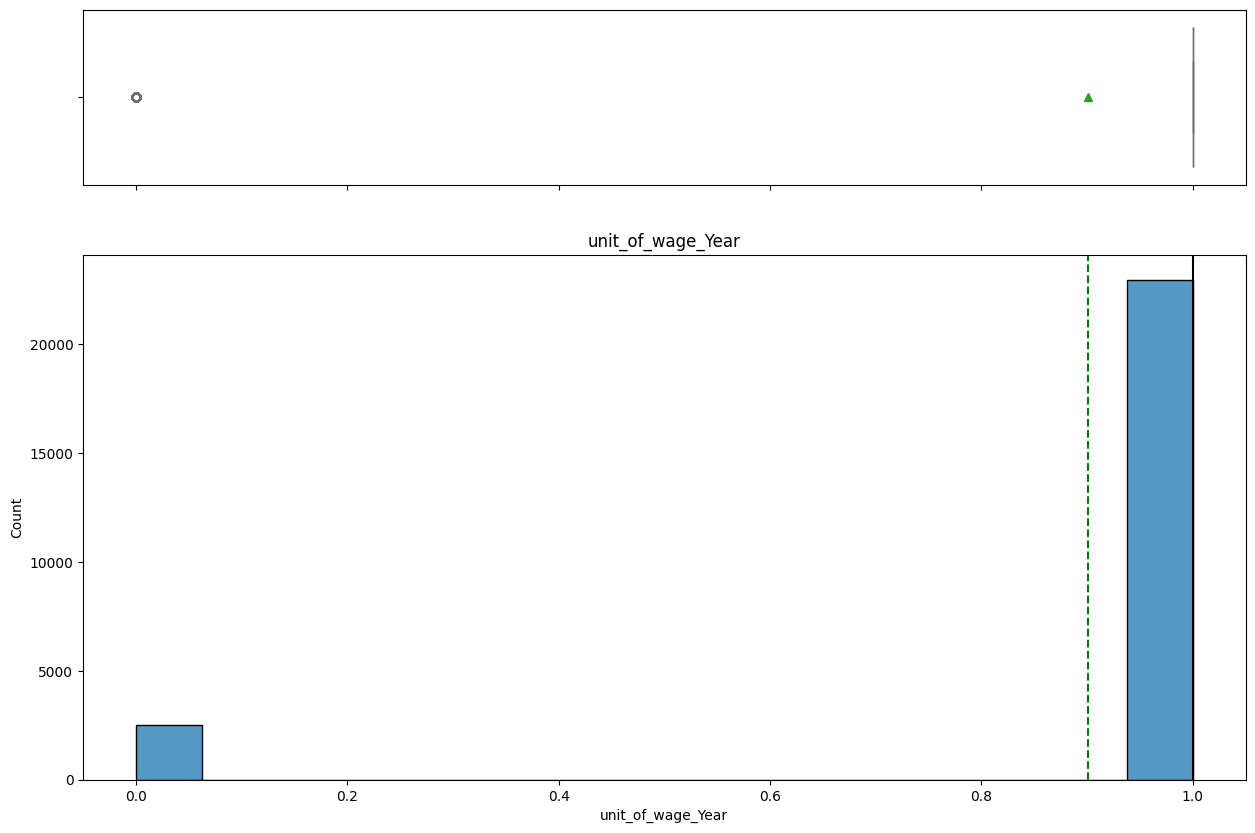

<Figure size 640x480 with 0 Axes>

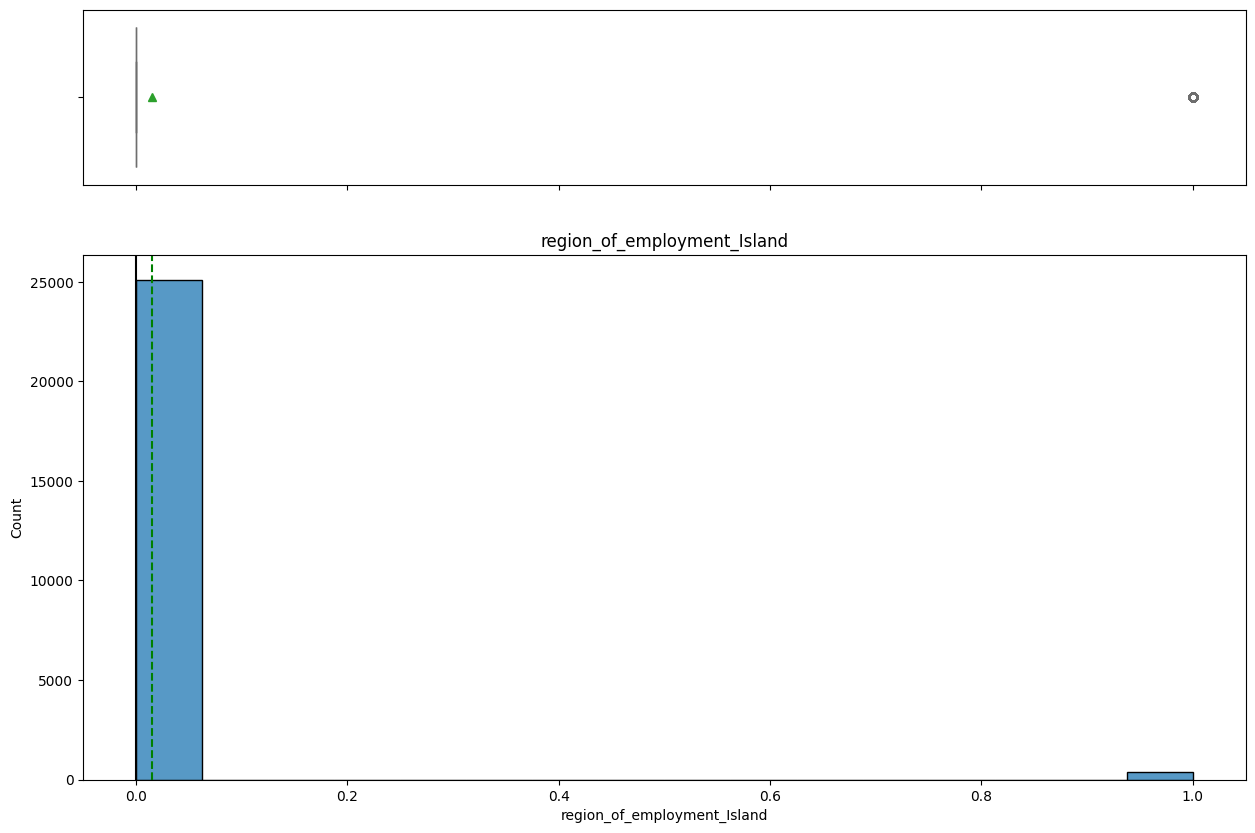

<Figure size 640x480 with 0 Axes>

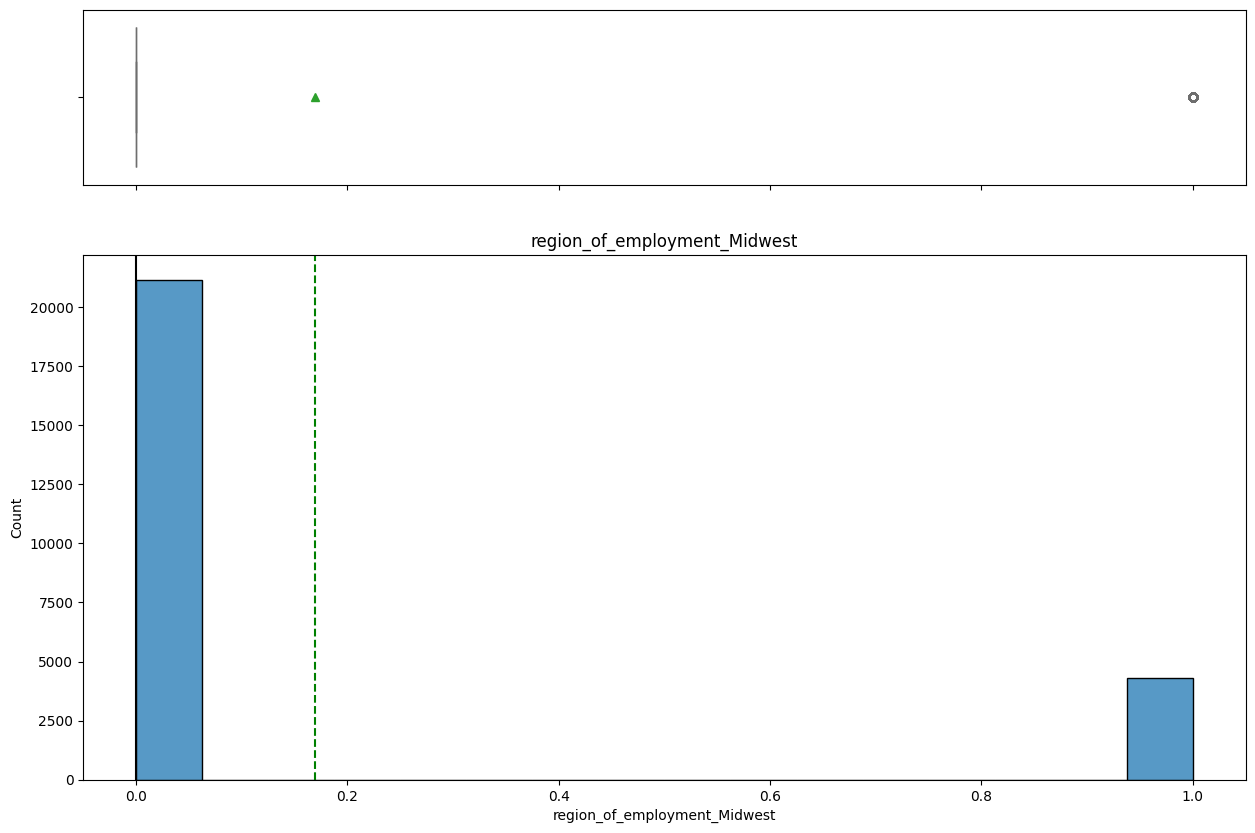

<Figure size 640x480 with 0 Axes>

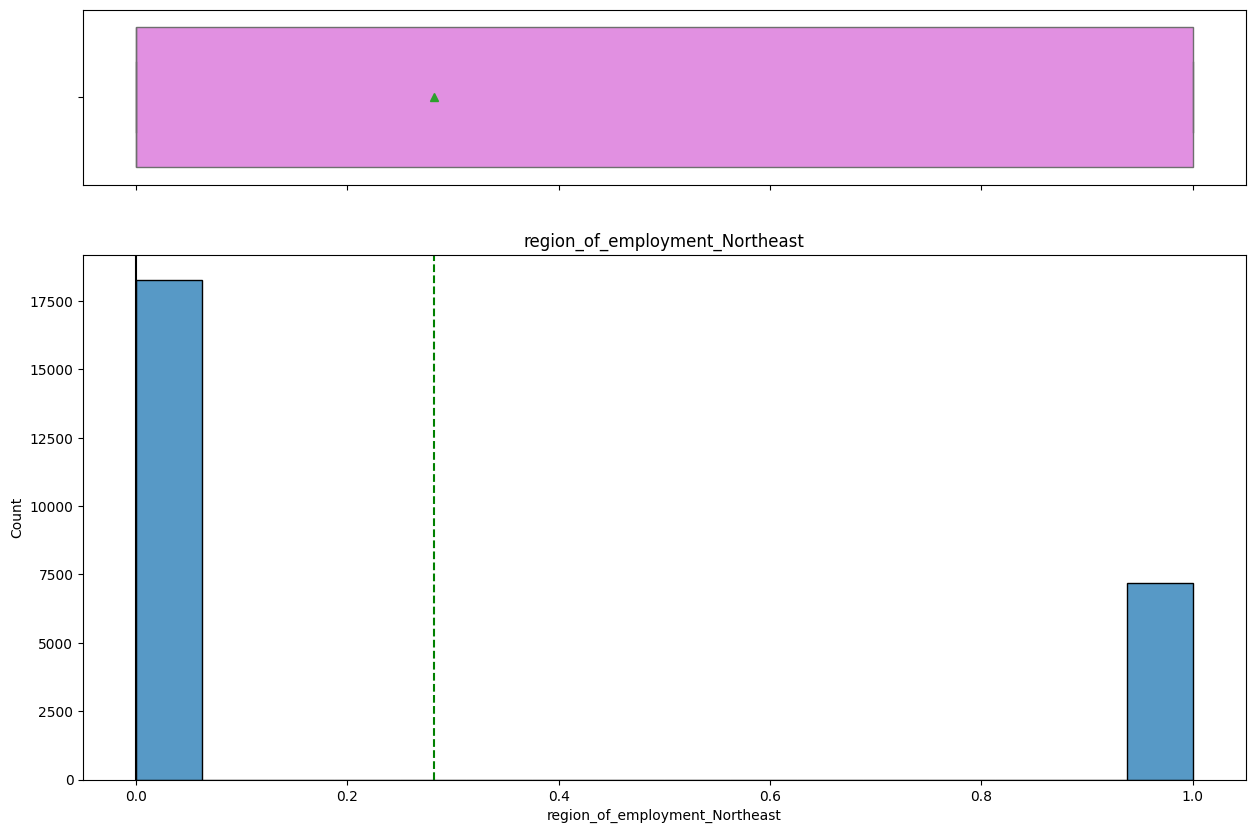

<Figure size 640x480 with 0 Axes>

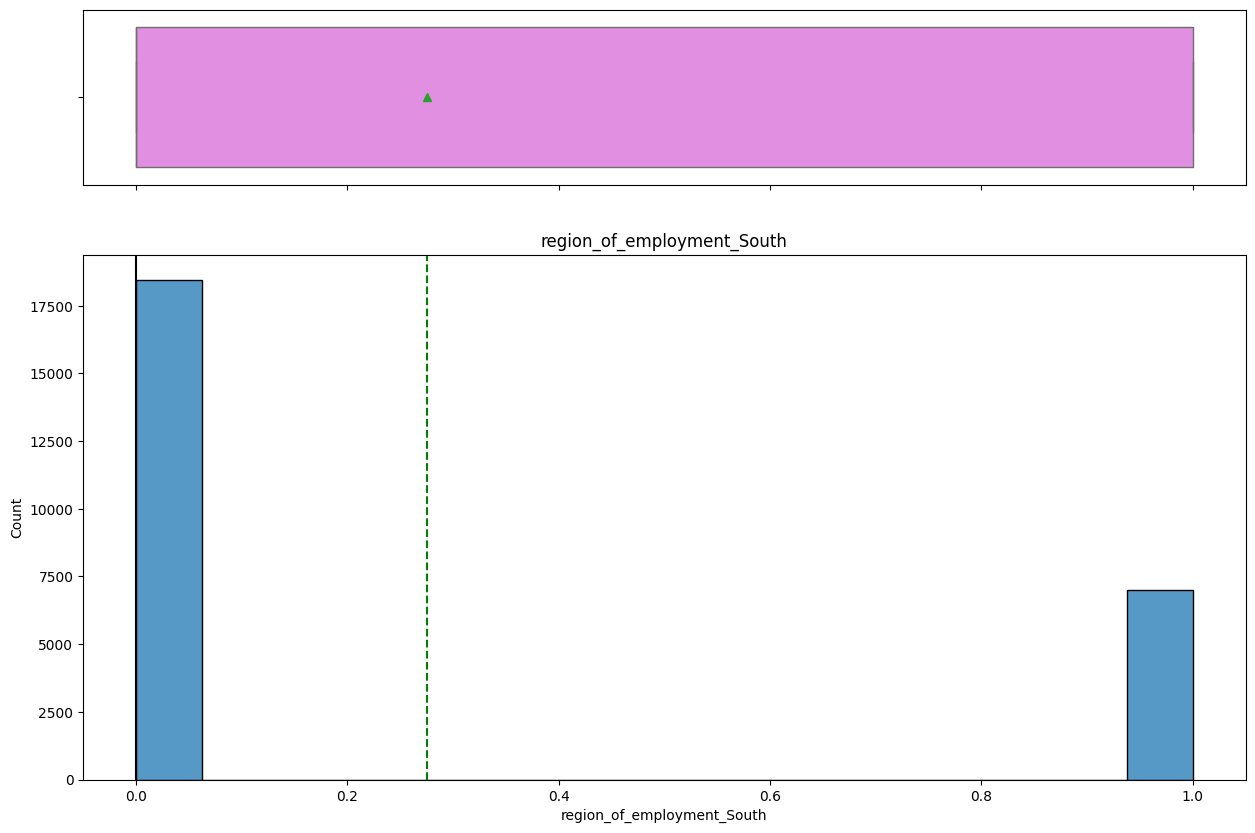

<Figure size 640x480 with 0 Axes>

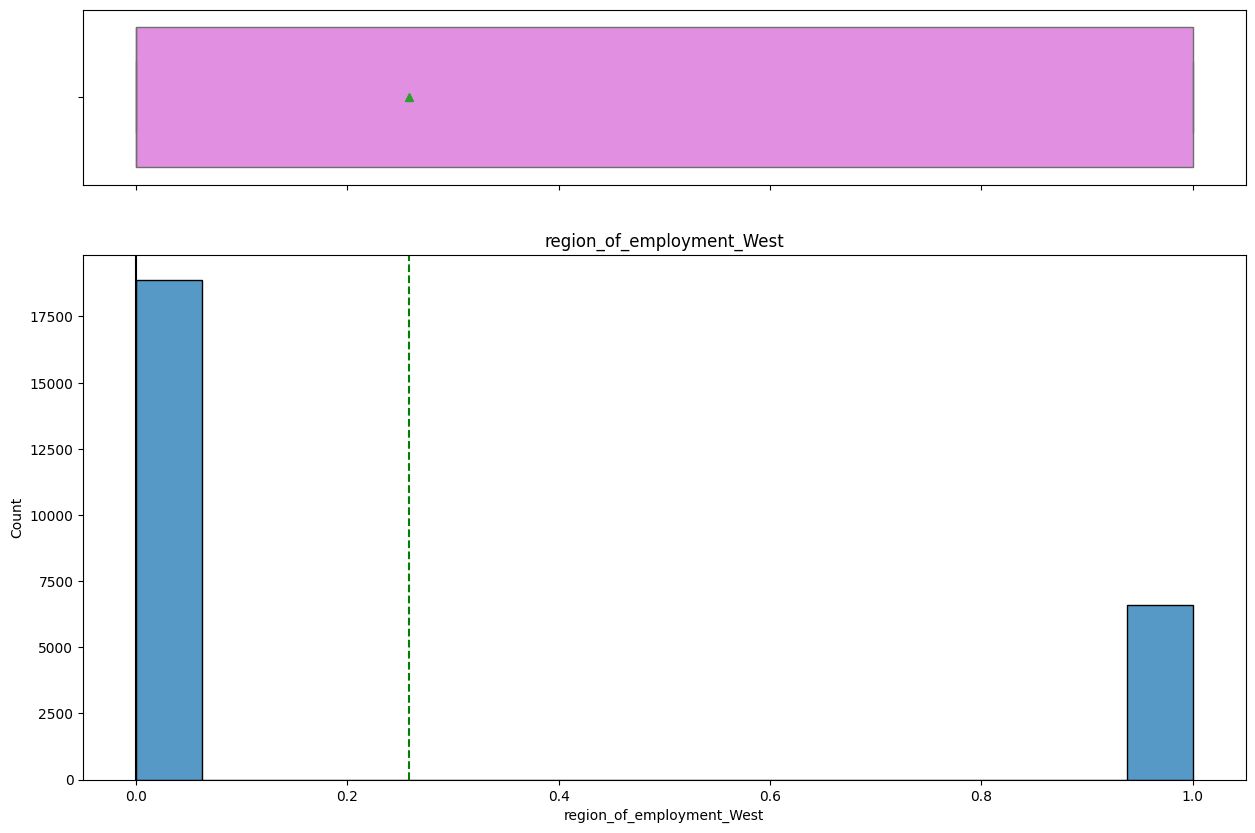

<Figure size 640x480 with 0 Axes>

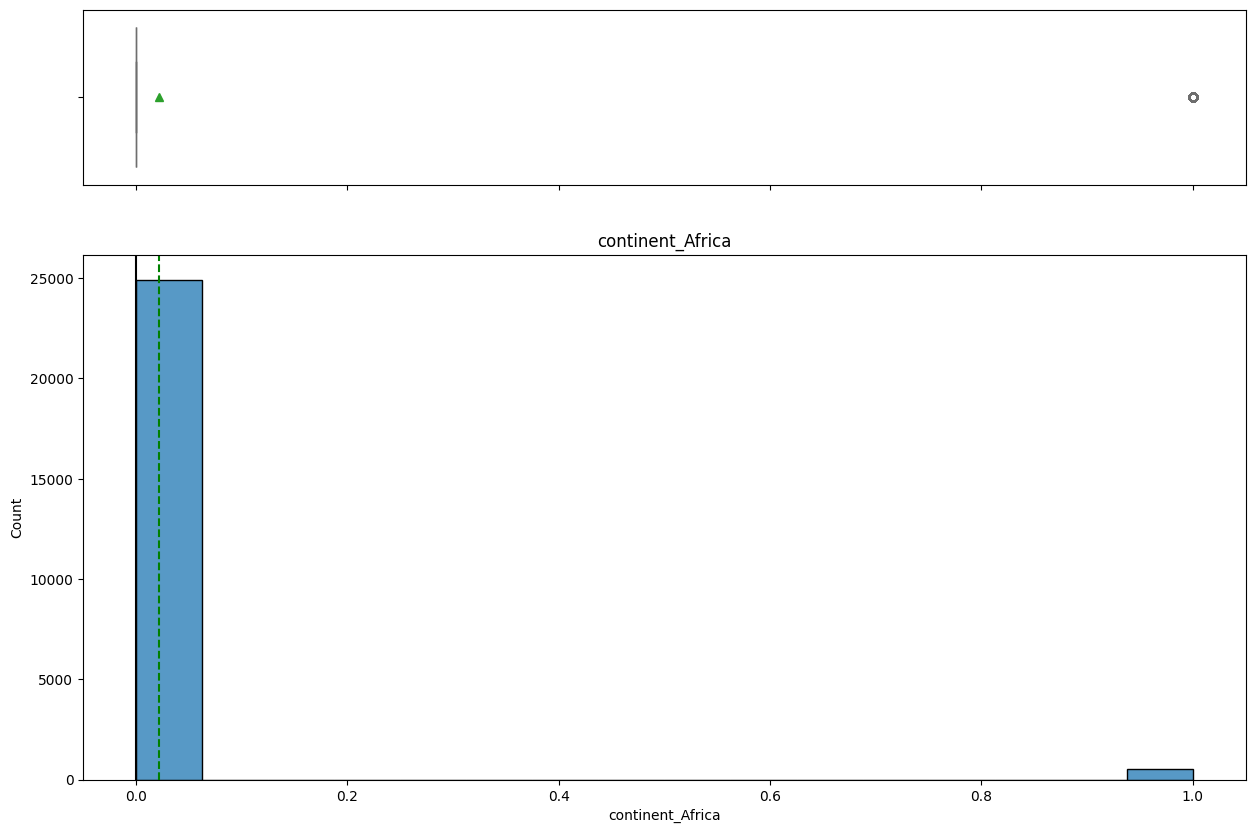

<Figure size 640x480 with 0 Axes>

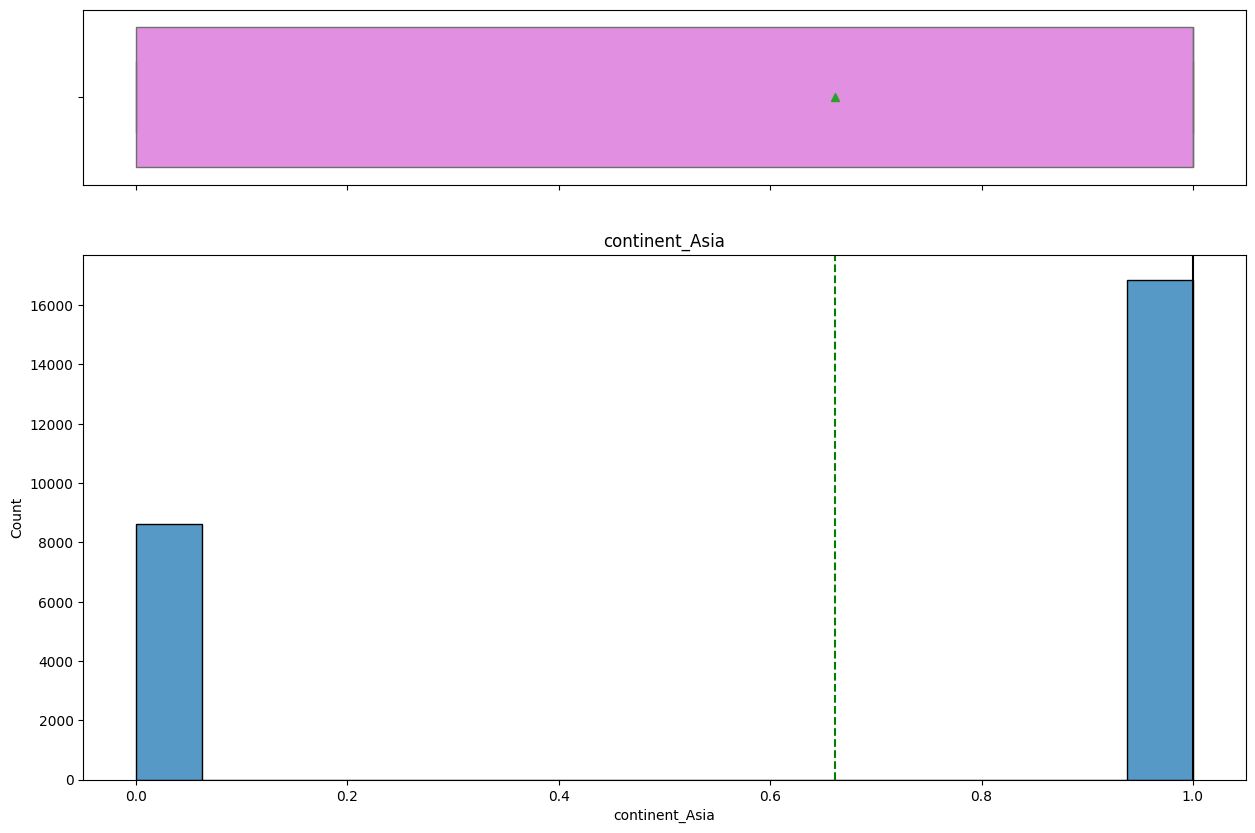

<Figure size 640x480 with 0 Axes>

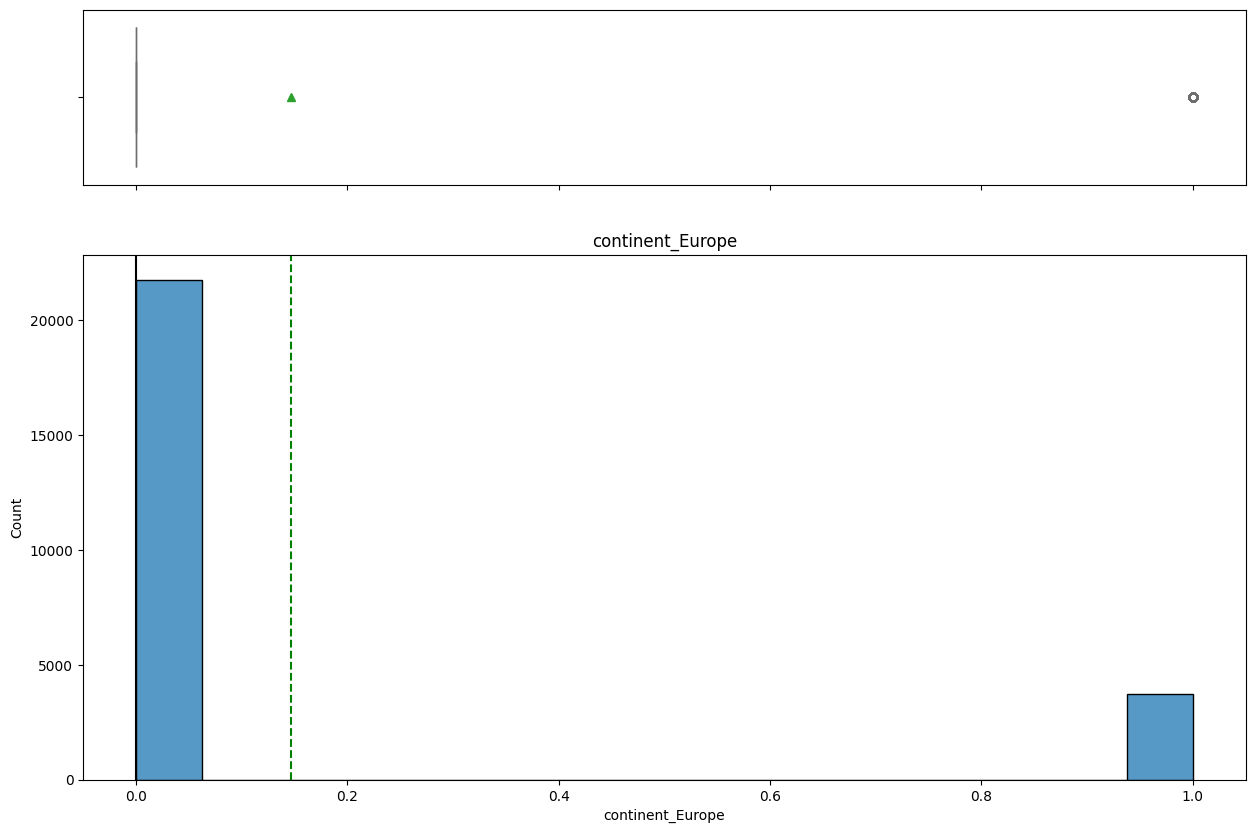

<Figure size 640x480 with 0 Axes>

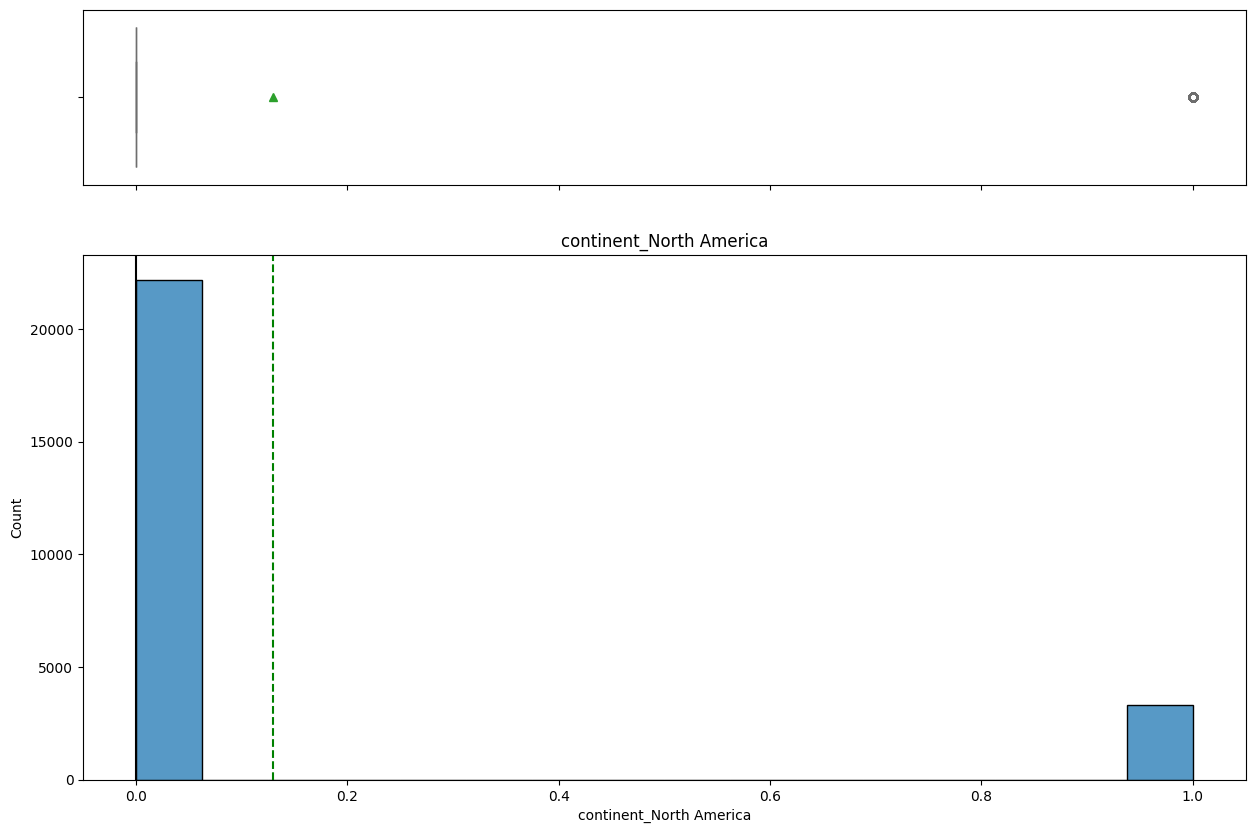

<Figure size 640x480 with 0 Axes>

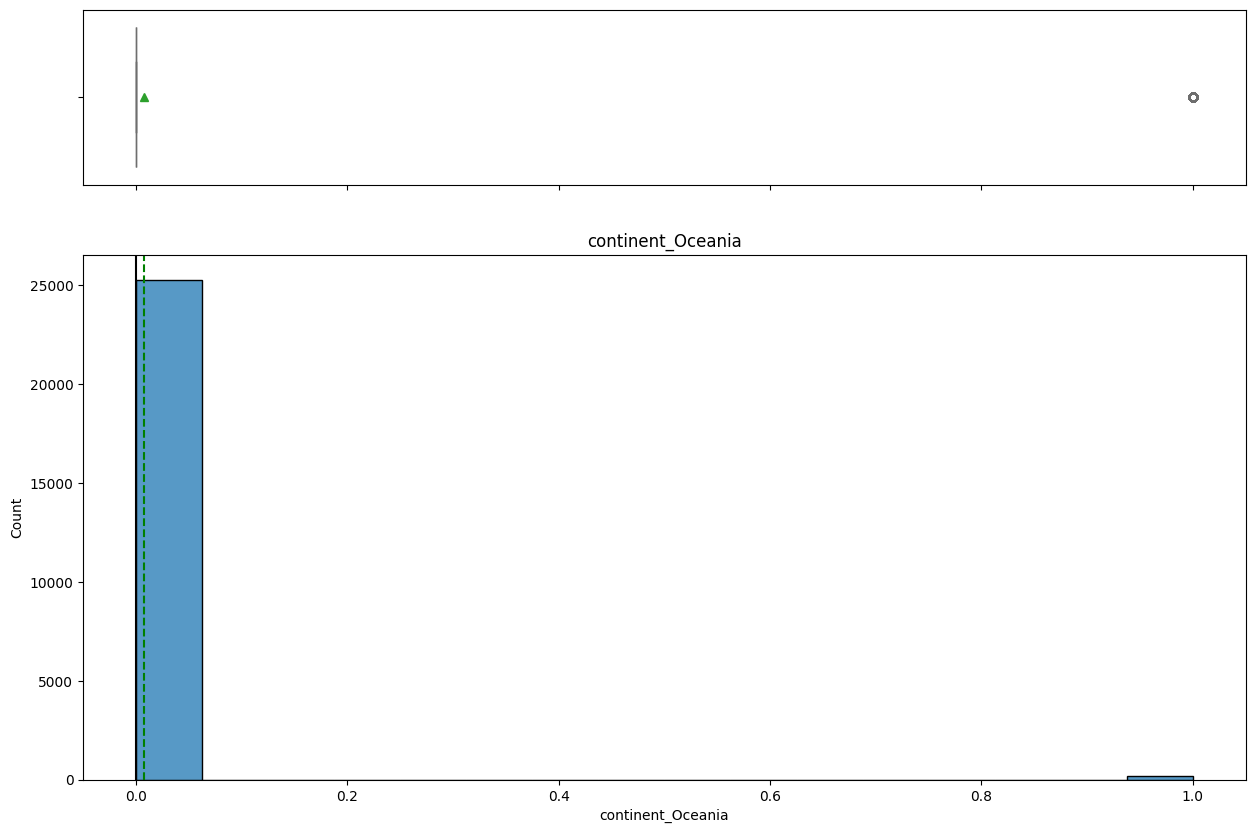

<Figure size 640x480 with 0 Axes>

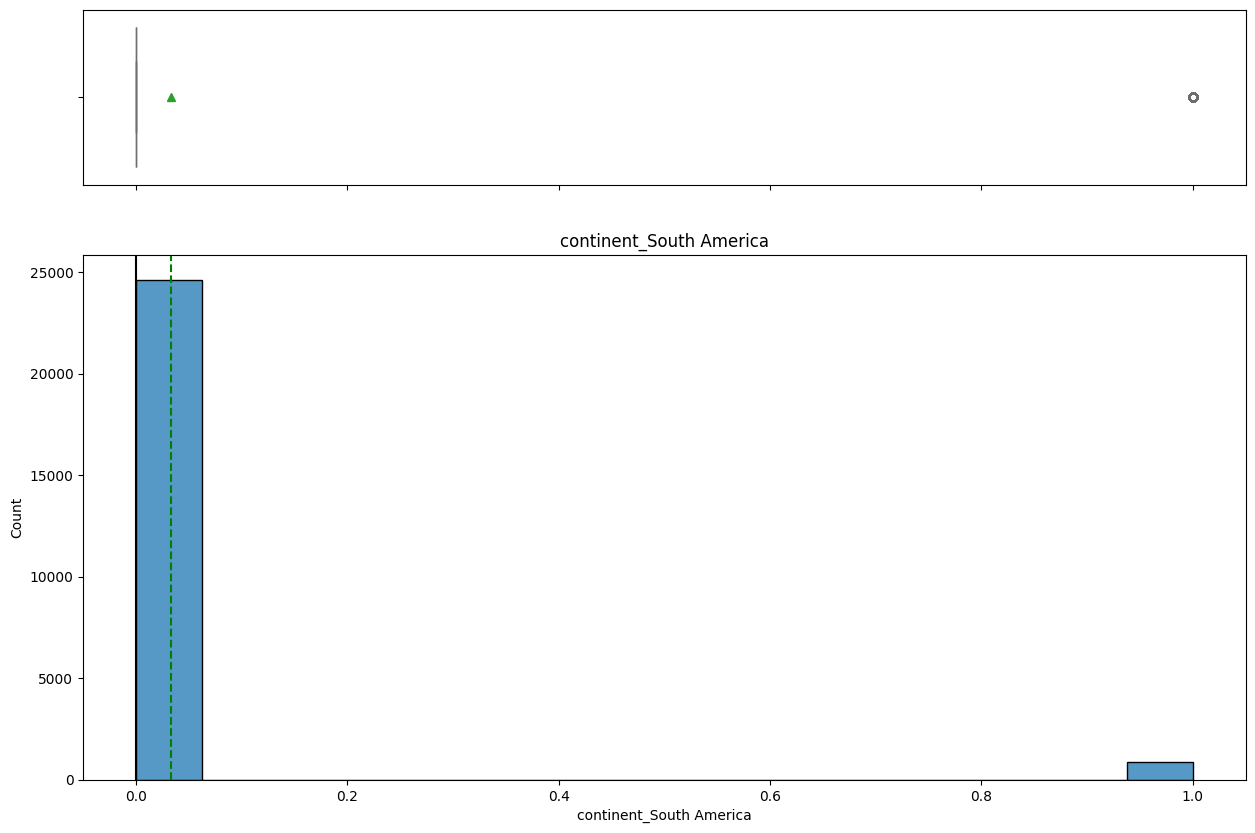

In [ ]:
# Assign variable to plot univariate chart

continuous_cols = df.select_dtypes(include=['int', 'float', 'bool'])  # Select integer, float, and boolean datatypes

# Loop through continuous columns
for col in continuous_cols.columns:
    plt.figure()  # Create a new figure for each plot
    histogram_boxplot1(df, col)  # Pass the column name (feature)

    # Set the plot title using the column name
    plt.title(col)
    plt.show()
  # Select integer, float, and boolean datatypes

# Loop through continuous columns
for col in continuous_cols.columns:
    plt.figure()  # Create a new figure for each plot
    histogram_boxplot1(df, col)  # Pass the column name (feature)

    # Set the plot title using the column name
    plt.title(col)
    plt.show()


####Categorical variable

In [ ]:
# Check for categorical data types
categorical_cols = df.select_dtypes(include=['category'])  # Select category columns (categorical data)

# Check if there are any categorical columns
if not categorical_cols.empty:
    # Loop through categorical columns
    for col in categorical_cols.columns:
       plt.figure()  # Create a new figure for each plot
       labeled_barplot1(df, col)  # Plot bar chart of categorical variables
       plt.show()
else:
    print("No columns with categorical data found.")

No columns with categorical data found.


- There are no more categorical variables after processing.

###Bivariate analysis

####Correlation heatmap.

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

education_of_employee has_job_experience requires_job_training  \
0                     1                  0                     0   
1                     3                  1                     0   
2                     2                  0                     1   
3                     2                  0                     0   
4                     3                  1                     0   

   no_of_employees  yr_of_estab  prevailing_wage full_time_position  \
0            14513         2007        592.20290                  1   
1             2412         2002      83425.65000                  1   
2            44444         2008     122996.86000                  1   
3               98         1897      83434.03000                  1   
4             1082         2005     149907.39000                  1   

  case_status  unit_of_wage_Hour  unit_of_wage_Month  unit_of_wage_Week  \
0           0               True               False              False   
1           1              False               False              False   
2           0              False               False              False   
3           0              False               False              False   
4           1              False               False              False   

   unit_of_wage_Year  region_of_employment_Island  \
0              False                        False   
1               True                        False   
2               True                        False   
3               True                        False   
4               True                        False   

   region_of_employment_Midwest  region_of_employment_Northeast  \
0                         False                           False   
1                         False                            True   
2                         False                           False   
3                         False                           False   
4                         False                           False   

   region_of_employment_South  region_of_employment_West  continent_Africa  \
0                       False                       True             False   
1                       False                      False             False   
2                       False                       True             False   
3                       False                       True             False   
4                        True                      False              True   

   continent_Asia  continent_Europe  continent_North America  \
0            True             False                    False   
1            True             False                    False   
2            True             False                    False   
3            True             False                    False   
4           False             False                    False   

   continent_Oceania  continent_South America  
0              False                    False  
1              False                    False  
2              False                    False  
3              False                    False  
4              False                    False

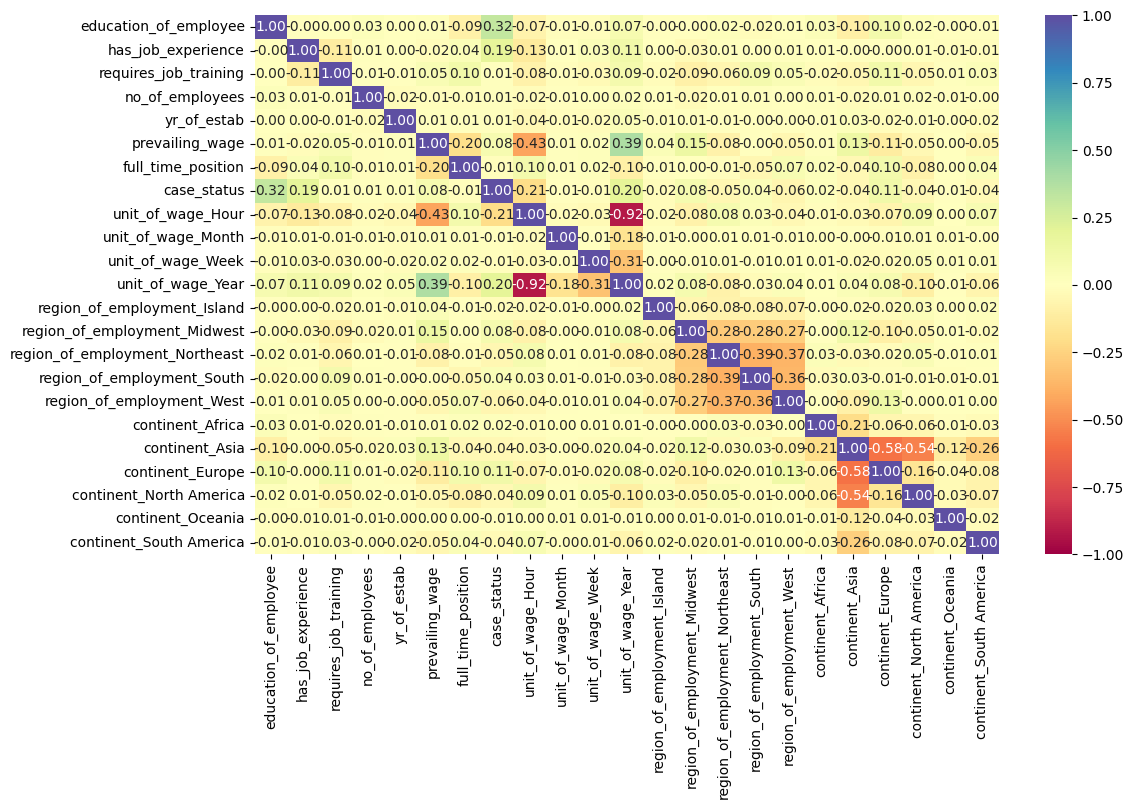

In [ ]:
# Select numerical columns (integer and float) from the DataFrame
continuous_cols = df1.select_dtypes(include=['int', 'float'])

# Convert boolean columns to numerical values (0 or 1)
boolean_cols = df1.select_dtypes(include=['bool'])
for col in boolean_cols.columns:
    df1[col] = df1[col].astype(int)

# Plot correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Case status vs Employee educational level.

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
2                      3867   6367  10234
1                      2256   1164   3420
3                      2059   7575   9634
4                       280   1912   2192
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

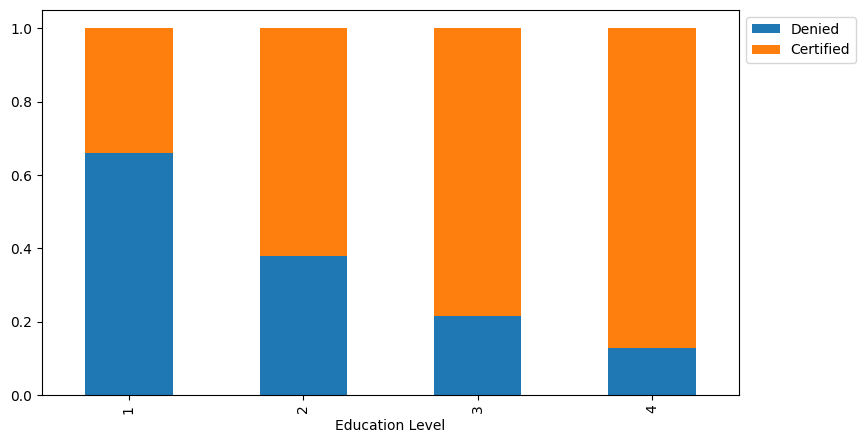

In [ ]:
plt.figure()
stacked_barplot1(df1, 'education_of_employee', 'case_status', legend_labels=['Denied', 'Certified'], xlabel='Education Level')
plt.show()

####Case status vs number of employees

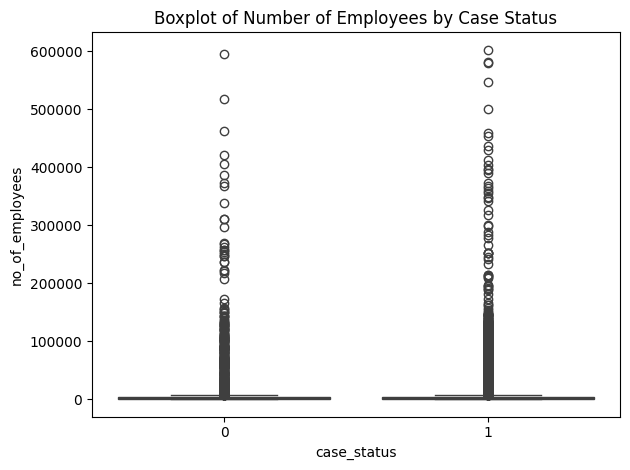

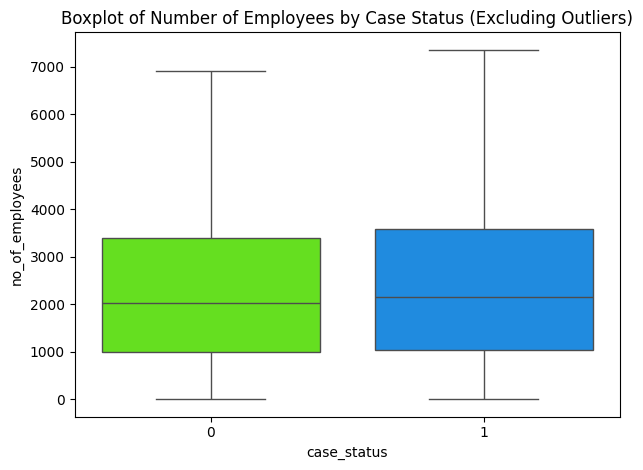

In [ ]:
plt.figure()
sns.boxplot(data = df,x = 'case_status' , y = 'no_of_employees')
plt.title('Boxplot of Number of Employees by Case Status')
plt.tight_layout()
plt.show();


sns.boxplot(data=df,x= 'case_status' ,y= 'no_of_employees',showfliers=False, palette="gist_rainbow")
plt.title('Boxplot of Number of Employees by Case Status (Excluding Outliers)')
plt.tight_layout()
plt.show();

####Case status vs job experience

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
0                   4684   5994  10678
1                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

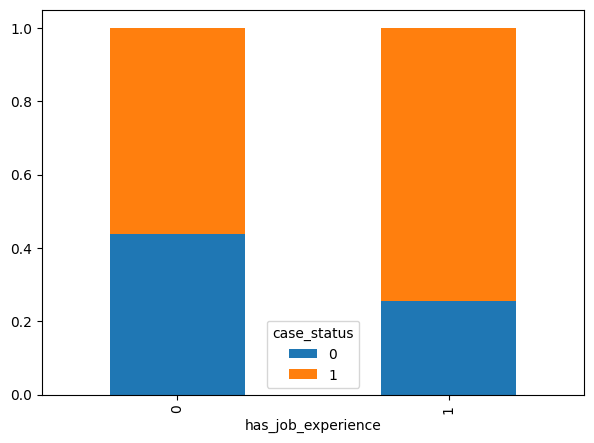

In [ ]:
plt.figure()
stacked_barplot1(df,'has_job_experience','case_status' )
plt.show();

## Building bagging and boosting models

- I will be building multiple bagging and boosting models as well as a decision tree model to get the best prediction for my data set.
- The metrics I will be using to measure the performance of my models will be the f1-score.
- The model will be futher tuned using multiple parameter values using GridSearch function.
- Predictions will be made based on the model with the best test performance, as well as the ability of the model to generalize on unseen data.


###Decision Tree model(base)

Since the classes are unbalanced, I will be setting class weights to account for this.

In [116]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.40,1:0.60},random_state=1) #assigning the base classifier to the variable created for this model

In [117]:
dtree.fit(X_train, y_train) #training the decision tree model

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=1)

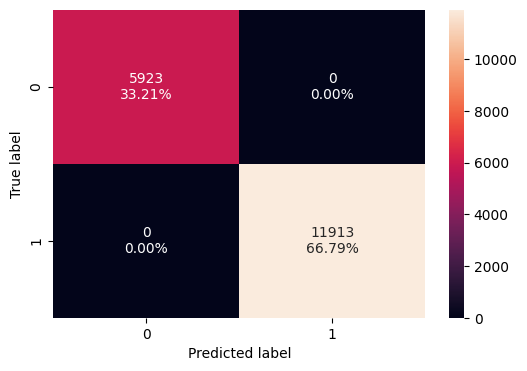

In [118]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [119]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)#evaluating performance on tain data
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000


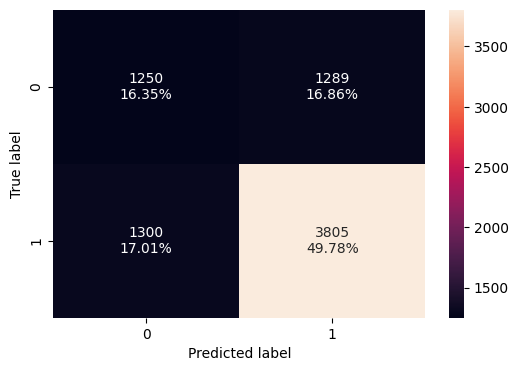

In [120]:
confusion_matrix_sklearn(dtree, X_test, y_test)


In [121]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)#evaluating performance on test data
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.66130 0.74535    0.74696 0.74615


- The decision model with class weight does perform well in f1_score, however, the model overfits and performance drops with unseen data.
- More tuning will be done to improve performance.

###Bagging models

- I will be creating bagging models with and without class weight check for any improvements between them.

####Bagging Clasifier

In [122]:
bagging = BaggingClassifier(random_state=1) #assigning baggingclassifier
bagging.fit(X_train,y_train)#training model

BaggingClassifier(random_state=1)

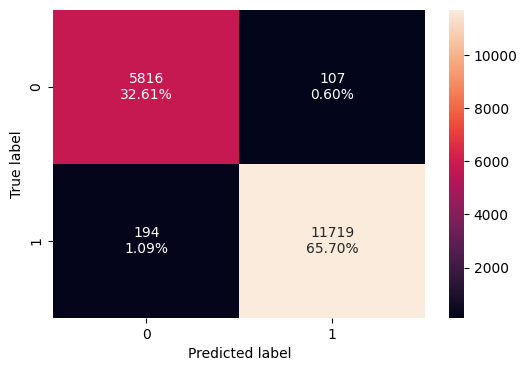

In [123]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [124]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)#evaluating performance on train data
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.98312 0.98372    0.99095 0.98732


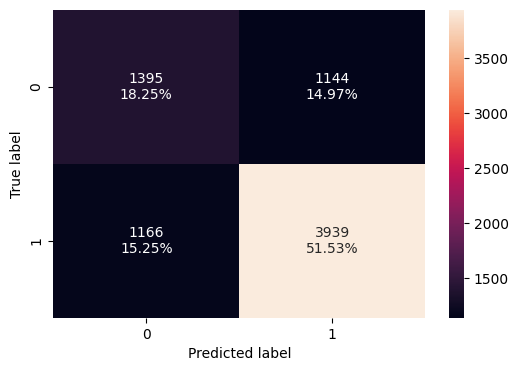

In [125]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [126]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)#evaluating performance on test data
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.69780 0.77160    0.77494 0.77326


**BAGGING CLASSIFIER WITH WEIGHTED DECISION TREE**

In [127]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.40,1:0.60},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.4,
                                                                      1: 0.6},
                                                        random_state=1),
                  random_state=1)

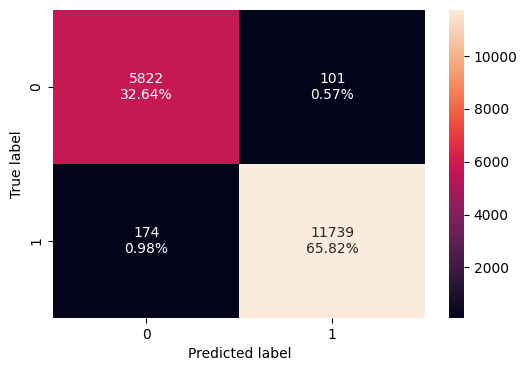

In [128]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [129]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.98458 0.98539    0.99147 0.98842


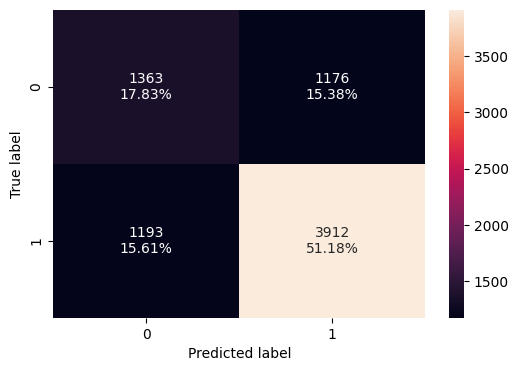

In [130]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [131]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.69008 0.76631    0.76887 0.76759


- Both weighted and default weighted bagging classifier models perform well, however,they are both overfitted.
- The default weighted model here even performed slightly better with f1_score than the weighted model.

####Random Forest model

In [132]:
rf = RandomForestClassifier(oob_score=True,random_state=1) #Assigning randomforest classifier
rf.fit(X_train,y_train) #training model

RandomForestClassifier(oob_score=True, random_state=1)

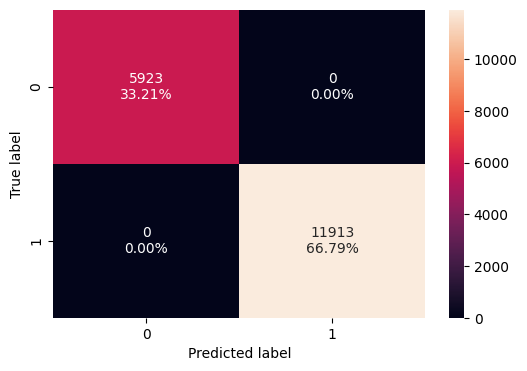

In [133]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [134]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)#evaluating performance on train data
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000


In [135]:
# Access the OOB predictions
oob_predictions = rf.predict(X_train)

# Compute f1-score using OOB predictions and true labels
oob_f1_score = f1_score(y_train, oob_predictions)

print("OOB F1 Score:", oob_f1_score)

OOB F1 Score: 1.0


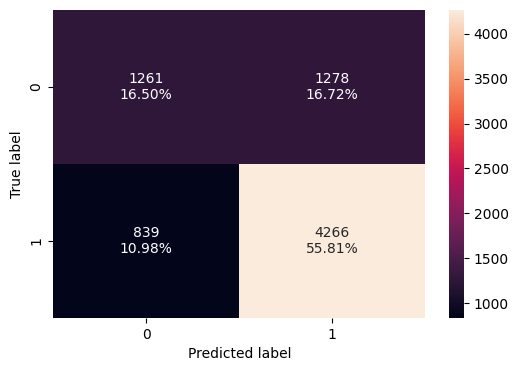

In [136]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [137]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)#evaluating performance on test data
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.72305 0.83565    0.76948 0.80120


**RANDOM FOREST WITH CLASS WEIGHTS**

In [138]:
rf_wt = RandomForestClassifier(oob_score=True,class_weight={0:0.40,1:0.60}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, oob_score=True,
                       random_state=1)

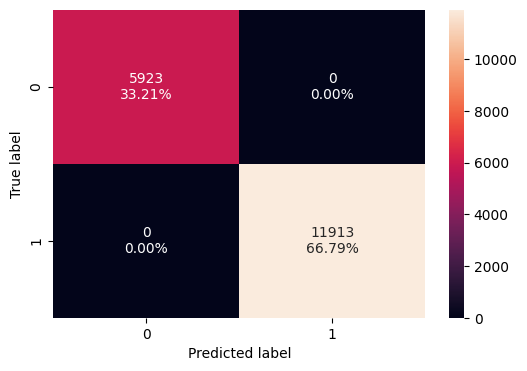

In [139]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [140]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000


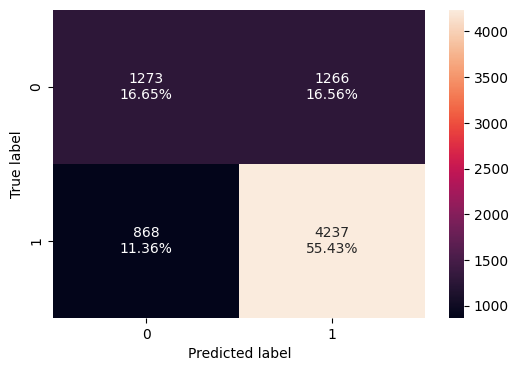

In [141]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [142]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.72083 0.82997    0.76994 0.79883


- Here, the default weighted RandomForest model still performs slightly better than the weighted model.
- Both model perform even marginally better than the BaggingClassifier models.
- However, they still suffer from a lot of over-fitting and needs further tuning.

###Boosting models

####GBM Model

In [143]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

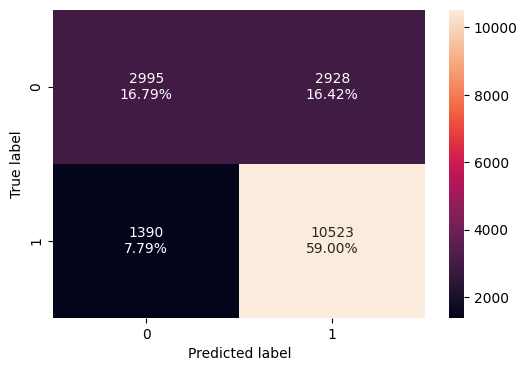

In [144]:
confusion_matrix_sklearn(gb, X_train,y_train)

In [145]:
gb_model_train_perf = model_performance_classification_sklearn(gb, X_train,y_train)
print("Training performance \n",gb_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.75791 0.88332    0.78232 0.82976


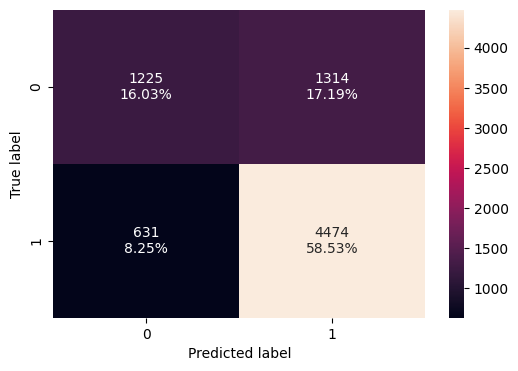

In [146]:
confusion_matrix_sklearn(gb, X_test,y_test)

In [147]:
gb_model_test_perf = model_performance_classification_sklearn(gb, X_test, y_test)
print("Testing performance \n",gb_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.74555 0.87640    0.77298 0.82144


- This is the best performing model so far.
- It is also normally fitted, hence will generalize well on unseen data.

####AdaBoost Model

In [148]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

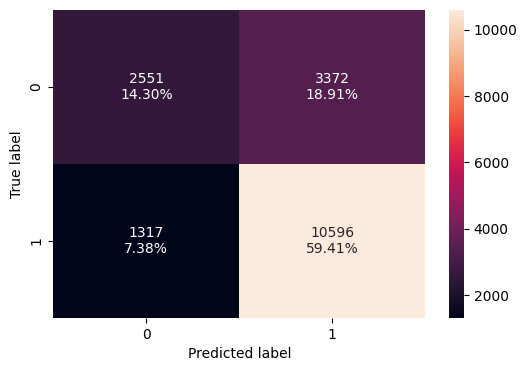

In [149]:
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

In [150]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.73710 0.88945    0.75859 0.81882


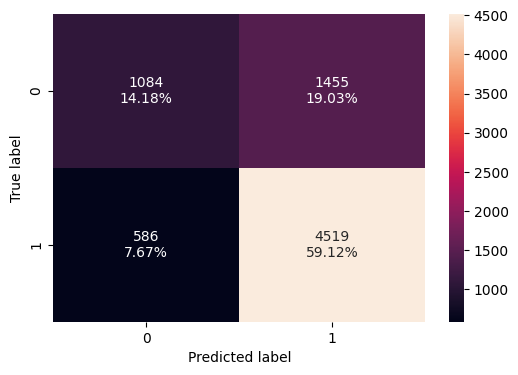

In [151]:
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

In [152]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.73299 0.88521    0.75644 0.81578


- This model also performs very well.
- It is normally fitted and will generalize well on unseen data.
- Though this model far performs better than the bagging models and the decision tree model, the earlier Gbm model still performs slightly better than it in F1_score metric.

####XG BOOST MODEL

In [153]:
xgb_classifier=XGBClassifier(random_state=1, verbosity = 0)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

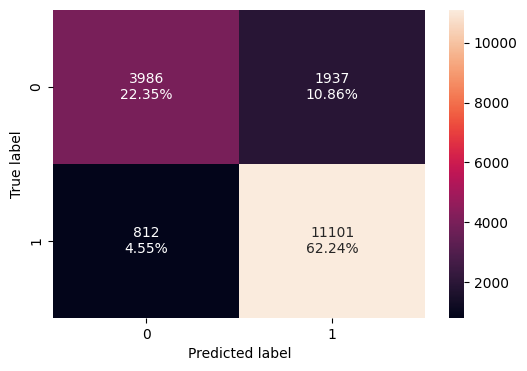

In [154]:
confusion_matrix_sklearn(xgb_classifier, X_train,y_train)

In [155]:
xgb_classifer_model_train_perf =  model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
print("Training performance \n",xgb_classifer_model_train_perf )

Training performance 
    Accuracy  Recall  Precision      F1
0   0.84587 0.93184    0.85143 0.88982


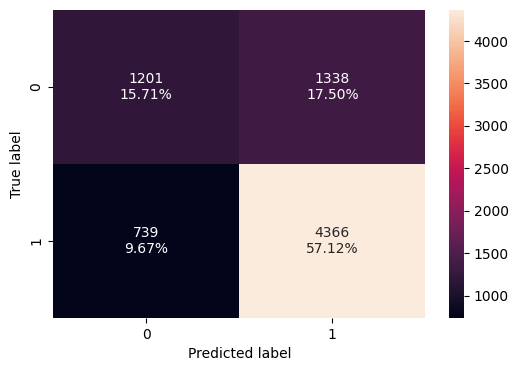

In [156]:
confusion_matrix_sklearn(xgb_classifier, X_test,y_test)

In [157]:
xgb_classifer_model_test_perf =  model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
print("Test performance \n",xgb_classifer_model_test_perf )

Test performance 
    Accuracy  Recall  Precision      F1
0   0.72828 0.85524    0.76543 0.80785


- This model performs very well, and even have test F1_score that is close to the earlier GBM and Ada boost models.
- However , this model slightly overfits and may need further tuning.

###Notes for hypertuning

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

- So far, the basic Adaboost and GBM models with default parameter performed the best and normally fitted. Normally, this might imply there is no further need for tuning these two models. But, I will be tuning them purely for acedemic purposes.

- The models will have to models,eventhough, perform well. Needs to be tuned to improve their ability to generalize on unseen data.
- I will be using the GridSearch function to tune the Bagging and boosting model, as well as, tuning the decision tree models.

###GBM tuning

In [165]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid  = {
    "n_estimators": np.arange(50, 200, 25),
    "learning_rate": [0.01, 0.05,0.1, 0.8],
    "subsample": [0.7, 0.9],
    "max_depth": [2,3],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=75, random_state=1,
                           subsample=0.7)

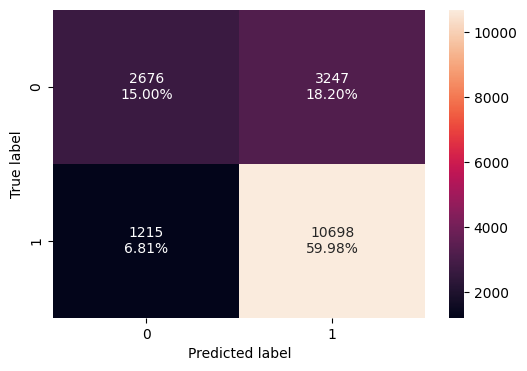

In [166]:
confusion_matrix_sklearn(gb_tuned, X_train,y_train)

In [167]:
gb_model_tuned_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,y_train)
print("Training performance \n",gb_model_tuned_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.74983 0.89801    0.76716 0.82744


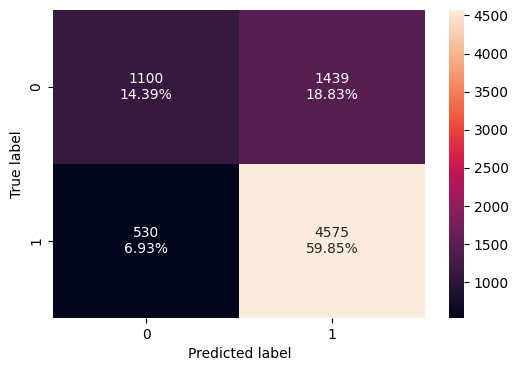

In [168]:
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

In [169]:
gb_model_tuned_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_model_tuned_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.74241 0.89618    0.76072 0.82292


In [170]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.50100
has_job_experience             0.16214
prevailing_wage                0.06961
unit_of_wage_Hour              0.06483
continent_Europe               0.05783
region_of_employment_Midwest   0.03336
unit_of_wage_Year              0.02089
region_of_employment_South     0.02024
continent_North America        0.01625
region_of_employment_West      0.01380
continent_Asia                 0.01150
region_of_employment_Northeast 0.00743
yr_of_estab                    0.00649
no_of_employees                0.00514
full_time_position             0.00390
continent_South America        0.00361
requires_job_training          0.00113
continent_Africa               0.00046
region_of_employment_Island    0.00021
unit_of_wage_Month             0.00011
unit_of_wage_Week              0.00007
continent_Oceania              0.00000


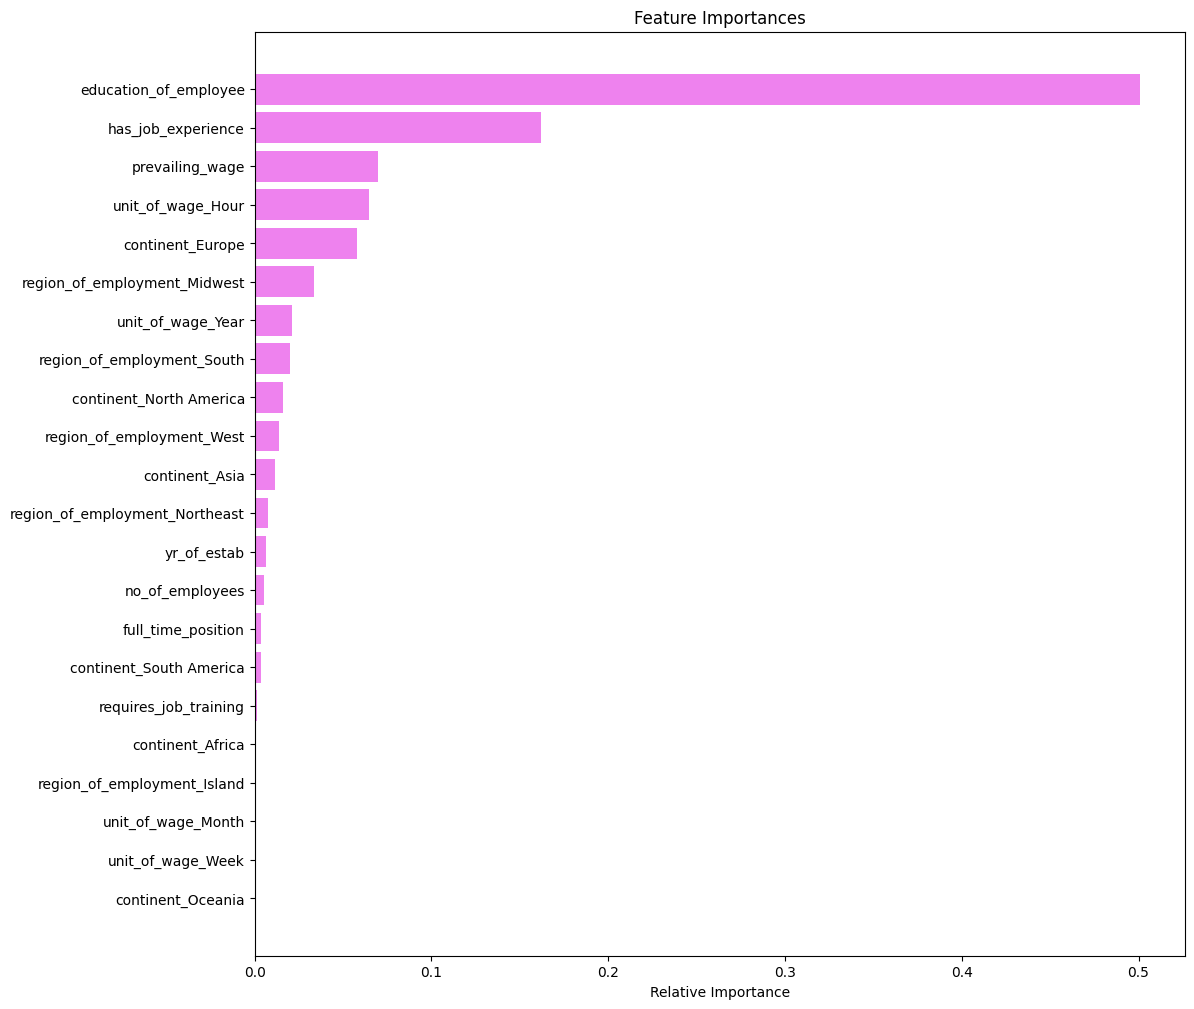

In [171]:
feature_names7 = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names7[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- As espected no much improved model in this tuned model from the untuned model based on the f1_score.
- However, there is seem to be a 1% improvement in the recall metrics.
- model is still very well able to generalize on seen data.

###AdaBoost Tuning

In [91]:
# Create a one-step decision tree (decision stump)
decision_stump = DecisionTreeClassifier(max_depth=1, random_state=1)

# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(base_estimator=decision_stump, random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 200, 10),
    "learning_rate": [1, 0.1, 0.5, 0.8, 0.01],
    "algorithm": ['SAMME', 'SAMME.R'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.8, n_estimators=20, random_state=1)

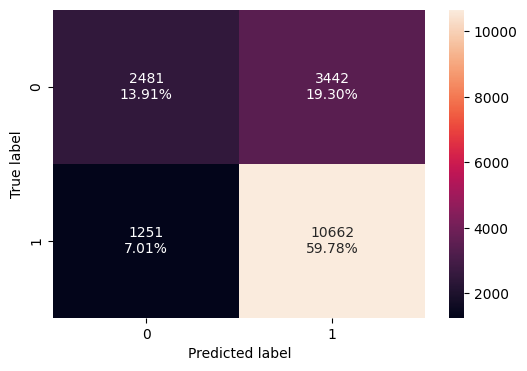

In [92]:
confusion_matrix_sklearn(ab_tuned, X_train,y_train)

In [93]:
ab_model_tuned_train_perf = model_performance_classification_sklearn(ab_tuned, X_train,y_train)
print("Training performance \n",ab_model_tuned_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.73688 0.89499    0.75596 0.81962


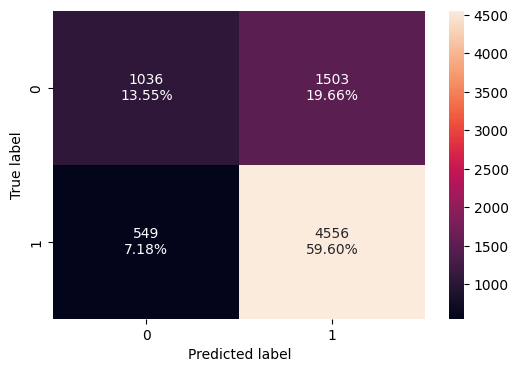

In [94]:
confusion_matrix_sklearn(ab_tuned, X_test,y_test)

In [95]:
ab_model_tuned_test_perf = model_performance_classification_sklearn(ab_tuned, X_test, y_test)
print("Testing performance \n",ab_model_tuned_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.73155 0.89246    0.75194 0.81619


In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.43232
has_job_experience             0.12292
continent_Europe               0.11288
unit_of_wage_Hour              0.10701
region_of_employment_Midwest   0.09952
unit_of_wage_Year              0.05881
region_of_employment_West      0.03569
region_of_employment_South     0.03086
region_of_employment_Northeast 0.00000
continent_Oceania              0.00000
continent_North America        0.00000
continent_Asia                 0.00000
continent_Africa               0.00000
region_of_employment_Island    0.00000
unit_of_wage_Week              0.00000
unit_of_wage_Month             0.00000
full_time_position             0.00000
prevailing_wage                0.00000
yr_of_estab                    0.00000
no_of_employees                0.00000
requires_job_training          0.00000
continent_South America        0.00000


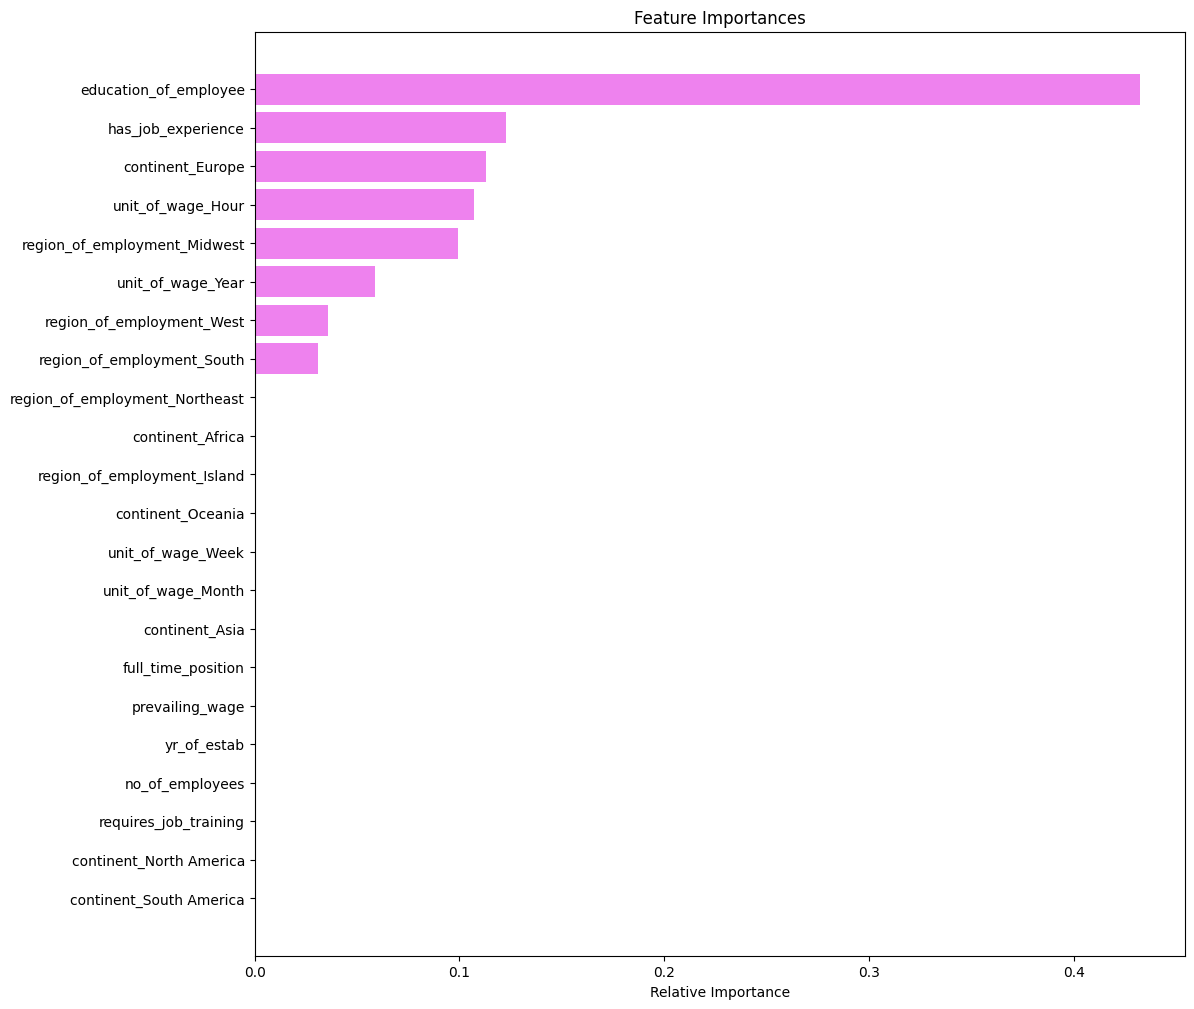

In [97]:
feature_names6 = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names6[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- There is no much improvement tuning the Ada boost model.
- model is still able to genearalize well on unseen data.
- Though f1_score performance is still slightly not as good as the GBM tuned model.

###XG BOOSTING MODEL TUNED

In [158]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05,0.7],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

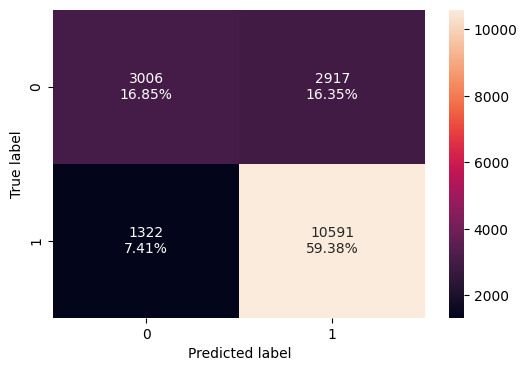

In [159]:
confusion_matrix_sklearn(xgb_tuned, X_train,y_train)

In [160]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.76233 0.88903    0.78405 0.83325


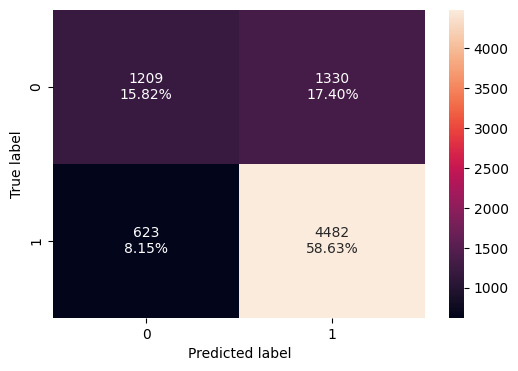

In [161]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

In [162]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.74451 0.87796    0.77116 0.82110


In [163]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.24798
unit_of_wage_Hour              0.22538
has_job_experience             0.13301
continent_Europe               0.04712
unit_of_wage_Year              0.04645
region_of_employment_Midwest   0.03219
region_of_employment_South     0.02763
region_of_employment_Northeast 0.02737
full_time_position             0.02356
region_of_employment_West      0.02272
continent_Asia                 0.01999
continent_North America        0.01940
requires_job_training          0.01890
prevailing_wage                0.01885
continent_South America        0.01696
continent_Africa               0.01267
region_of_employment_Island    0.01252
yr_of_estab                    0.01173
no_of_employees                0.00985
unit_of_wage_Week              0.00947
continent_Oceania              0.00920
unit_of_wage_Month             0.00705


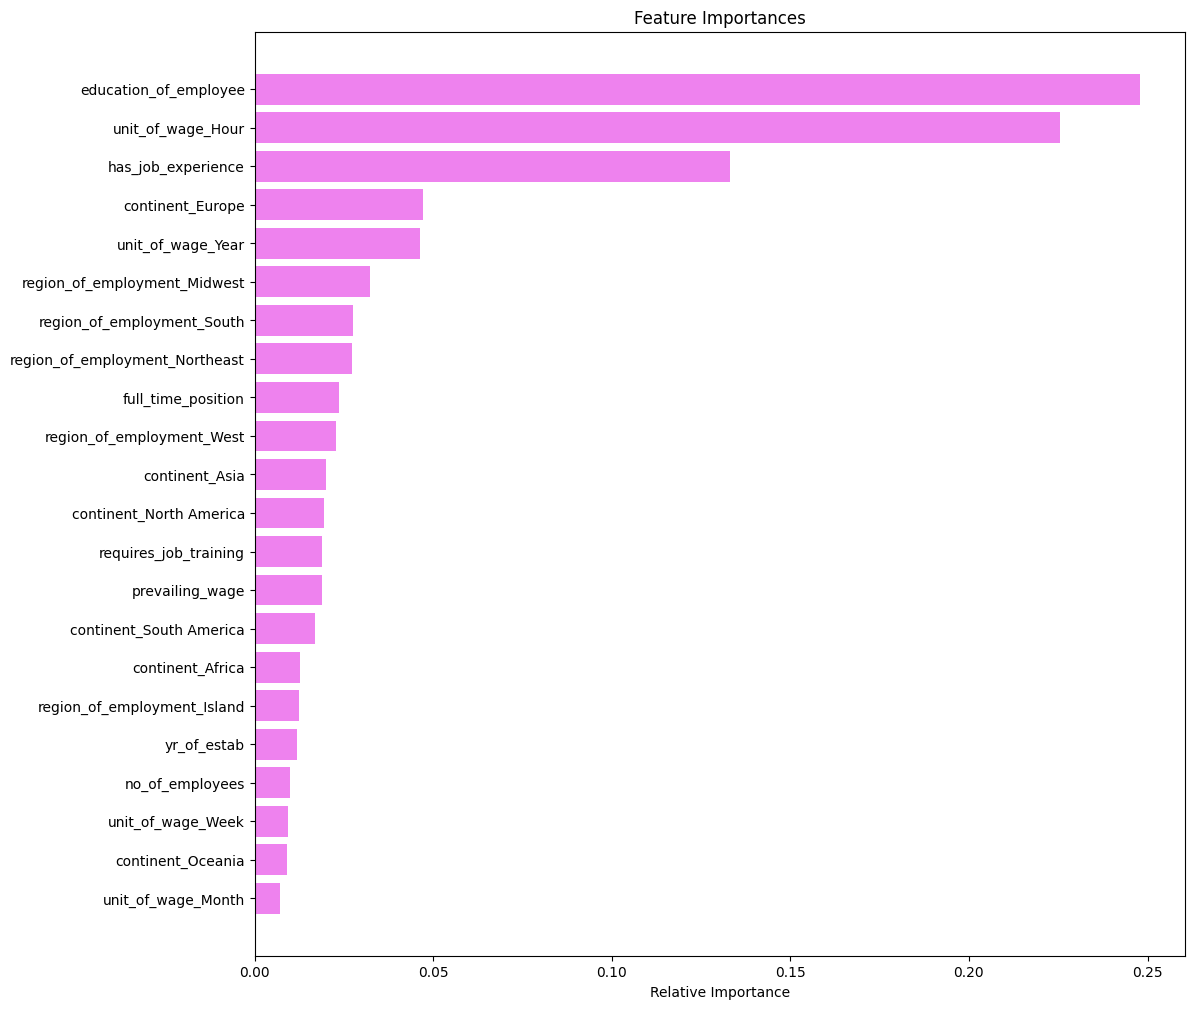

In [164]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The tuned XGB model still performs well and overfitting has also reduced to 1%,though this still not as good as the GBM Ada boost models which do not have any overfitting.

###Random Forest Tuning

In [83]:
# Choose the type of classifier.
rf_classifier_tuned = RandomForestClassifier(oob_score=True,random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [25,300,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.9, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_classifier_tuned to the best combination of parameters
rf_classifier_tuned= grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_classifier_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=300,
                       oob_score=True, random_state=1)

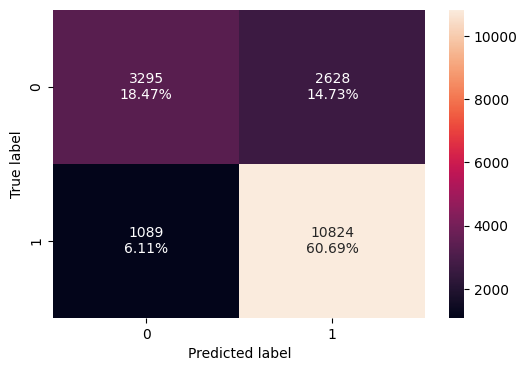

In [84]:
confusion_matrix_sklearn(rf_classifier_tuned, X_train,y_train)

In [85]:
rf_classifier_tuned_model_train_perf=model_performance_classification_sklearn(rf_classifier_tuned, X_train,y_train)
print("Training performance \n",rf_classifier_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.79160 0.90859    0.80464 0.85346


In [86]:
# Access the OOB predictions
oob_predictions_rf_tuned = rf_classifier_tuned.predict(X_train)

# Compute f1-score using OOB predictions and true labels
oob_f1_score_rf_tuned = f1_score(y_train, oob_predictions_rf_tuned)

print("OOB F1 Score:", oob_f1_score_rf_tuned)

OOB F1 Score: 0.8534594914251922


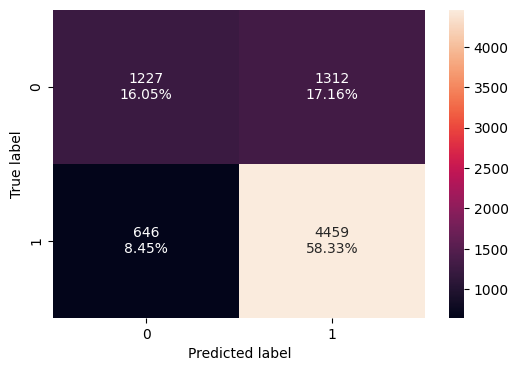

In [87]:
confusion_matrix_sklearn(rf_classifier_tuned, X_test,y_test)

In [88]:
rf_classifier_tuned_model_test_perf=model_performance_classification_sklearn(rf_classifier_tuned, X_test, y_test)
print("Testing performance \n",rf_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.74385 0.87346    0.77266 0.81997


In [89]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_classifier_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.23283
prevailing_wage                0.19023
no_of_employees                0.15857
yr_of_estab                    0.13617
has_job_experience             0.07910
unit_of_wage_Hour              0.02860
continent_Europe               0.02565
unit_of_wage_Year              0.02159
region_of_employment_Midwest   0.01592
region_of_employment_West      0.01508
continent_Asia                 0.01481
full_time_position             0.01377
region_of_employment_South     0.01353
requires_job_training          0.01349
continent_North America        0.01285
region_of_employment_Northeast 0.01272
continent_South America        0.00618
continent_Africa               0.00274
region_of_employment_Island    0.00262
unit_of_wage_Week              0.00158
continent_Oceania              0.00145
unit_of_wage_Month             0.00053


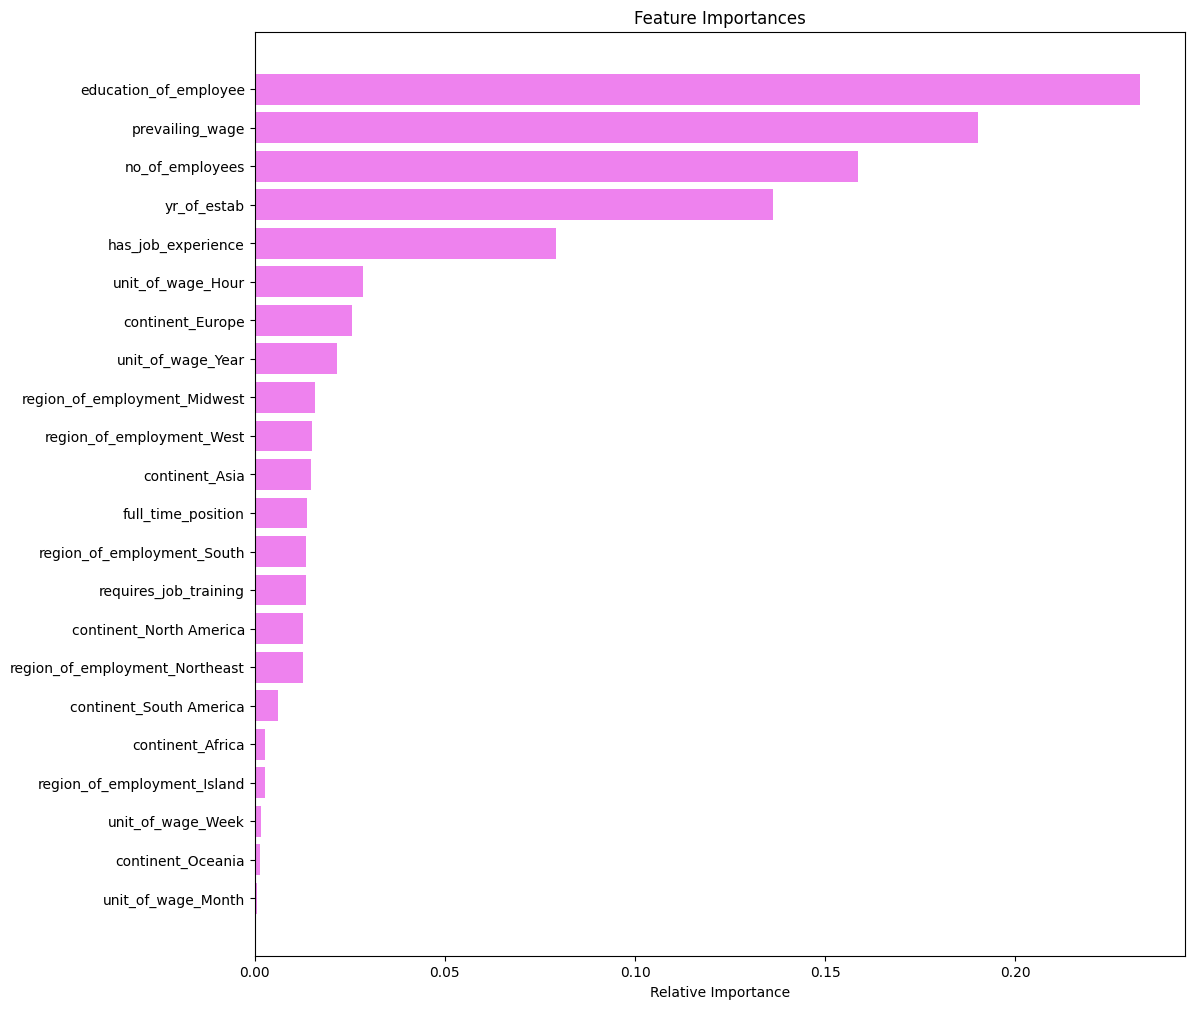

In [90]:
feature_names1 = X_train.columns
importances = rf_classifier_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names1[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The tuned Randomed forest model still has good performance but is still overfiiting by 4%.Thus, may not generalize well on unseen data.

###Bagging model tuned

In [98]:
# grid search for bagging classifier
bagging_tuned = DecisionTreeClassifier(class_weight={0:0.40,1:0.60},random_state=1)
param_grid = {'base_estimator':[bagging_tuned],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
# Define the scoring metric
scorer = metrics.make_scorer(f1_score)

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.4,
                                                                      1: 0.6},
                                                        random_state=1),
                  max_features=0.7, n_estimators=51, random_state=1)

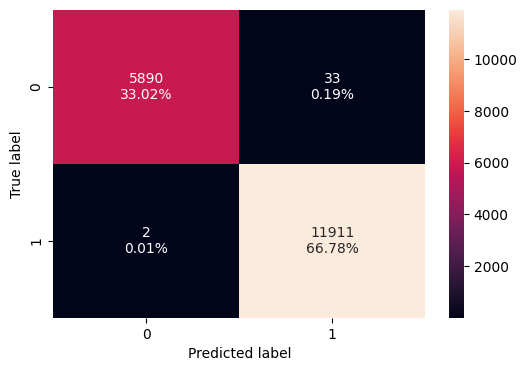

In [99]:
confusion_matrix_sklearn(bagging_tuned, X_train,y_train)

In [100]:
bagging_classifier_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train,y_train)
print("Training performance \n",bagging_classifier_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.99804 0.99983    0.99724 0.99853


In [101]:
# Access the OOB predictions
oob_predictions_bagging_tuned = bagging_tuned.predict(X_train)

# Compute f1-score using OOB predictions and true labels
oob_f1_score_bagging_tuned = f1_score(y_train, oob_predictions_bagging_tuned)

print("OOB F1 Score:", oob_f1_score_bagging_tuned)

OOB F1 Score: 0.9985329253468583


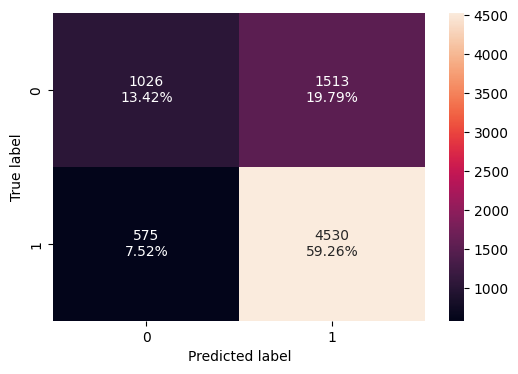

In [102]:
confusion_matrix_sklearn(bagging_tuned, X_test,y_test)

In [103]:
bagging_classifier_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print("Testing performance \n",bagging_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.72684 0.88737    0.74963 0.81270


In [104]:
# Access feature importances of the base estimator
if hasattr(bagging_tuned.base_estimator, 'feature_importances_'):
    feature_importances = bagging_tuned.base_estimator.feature_importances_
    print("Feature Importances:", feature_importances)
else:
    print("Base estimator does not have feature importances attribute.")

Base estimator does not have feature importances attribute.


- The tuned Bagging classifier model is still moderately overfiiting, eventhough it still performing well in terms on f1_score.
- However, this model cannot be used be cause it appears to be the worst in terms of generalize well on unseen data.

###Decision tree (tuned)

####Pre-pruned

In [65]:
# Define the DecisionTreeClassifier with initial hyperparameters
dtree_pre_prune = DecisionTreeClassifier(criterion='gini', random_state=1)

# Define the parameter grid for hyperparameter tuning
param_grid = { 'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(dtree_pre_prune  , param_grid=param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)

# Get the best DecisionTreeClassifier estimator
best_dtree_pre_prune_estimator = grid.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Fit the best estimator to the training data
dtree_pre_prune = grid.best_estimator_

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 7}


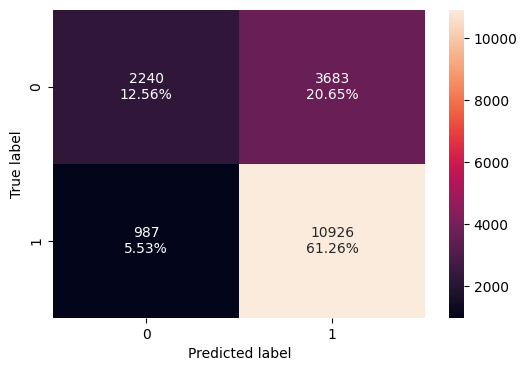

In [66]:
confusion_matrix_sklearn(dtree_pre_prune, X_train,y_train)

In [67]:
dtree_pre_prune_model_train_perf=model_performance_classification_sklearn(dtree_pre_prune, X_train,y_train)
print("Training performance \n",dtree_pre_prune_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.73817 0.91715    0.74790 0.82392


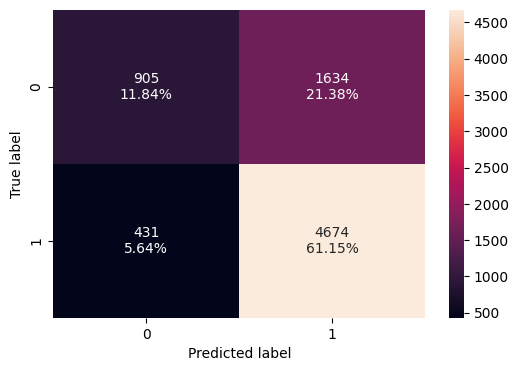

In [68]:
confusion_matrix_sklearn(dtree_pre_prune, X_test,y_test)

In [69]:
dtree_pre_prune_model_test_perf=model_performance_classification_sklearn(dtree_pre_prune, X_test,y_test)
print("Testing performance \n",dtree_pre_prune_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.72985 0.91557    0.74096 0.81907


In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_pre_prune.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.52238
has_job_experience             0.22124
prevailing_wage                0.10987
continent_Europe               0.07028
unit_of_wage_Hour              0.04934
continent_Asia                 0.01522
region_of_employment_West      0.00700
region_of_employment_Northeast 0.00467
continent_Oceania              0.00000
continent_North America        0.00000
continent_Africa               0.00000
region_of_employment_South     0.00000
region_of_employment_Island    0.00000
region_of_employment_Midwest   0.00000
unit_of_wage_Year              0.00000
unit_of_wage_Week              0.00000
unit_of_wage_Month             0.00000
full_time_position             0.00000
yr_of_estab                    0.00000
no_of_employees                0.00000
requires_job_training          0.00000
continent_South America        0.00000


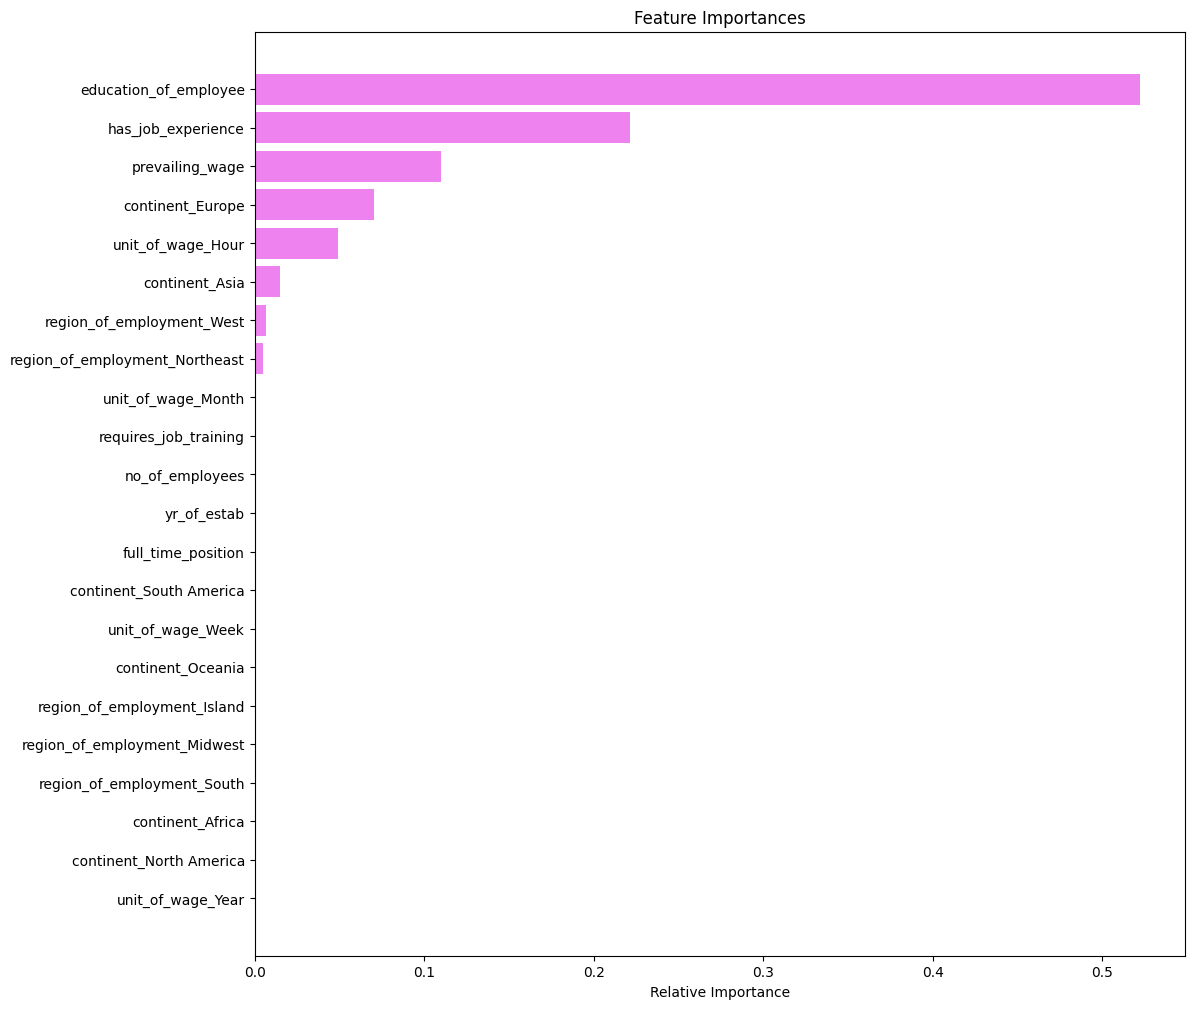

In [72]:
feature_names5= X_train.columns
importances = dtree_pre_prune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names5[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####Post-pruned(with class weight)

In [73]:
# Define the DecisionTreeClassifier with initial hyperparameters
dtree_post_prune = DecisionTreeClassifier(criterion='gini', class_weight={0: 0.40, 1: 0.60}, random_state=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.1, 0.5, 1.0]  # Varying values of ccp_alpha for post-pruning
}

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(dtree_post_prune , param_grid=param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)

# Get the best DecisionTreeClassifier estimator
best_dtree_post_prune_estimator = grid.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Fit the best estimator to the training data
dtree_post_prune = grid.best_estimator_


Best Parameters: {'ccp_alpha': 0.01}


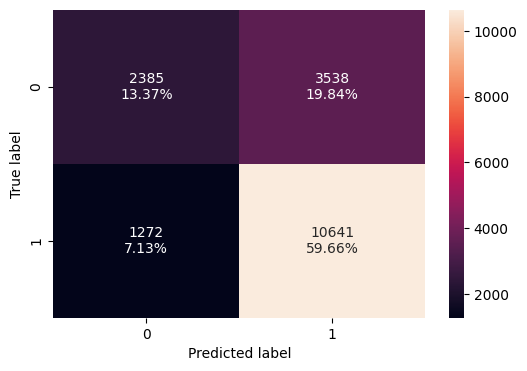

In [74]:
confusion_matrix_sklearn(dtree_post_prune, X_train,y_train)

In [75]:
dtree_post_prune_model_train_perf=model_performance_classification_sklearn(dtree_post_prune, X_train,y_train)
print("Training performance \n",dtree_post_prune_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.73032 0.89323    0.75048 0.81565


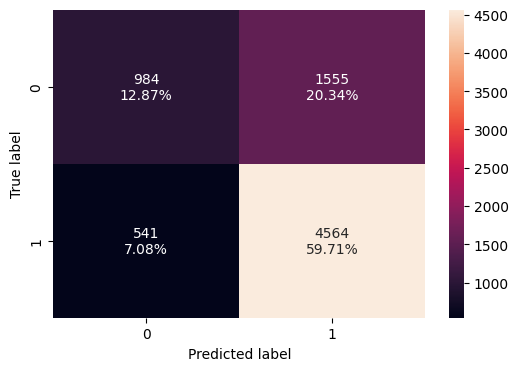

In [76]:
confusion_matrix_sklearn(dtree_post_prune, X_test,y_test)

In [77]:
dtree_post_prune_model_test_perf=model_performance_classification_sklearn(dtree_post_prune, X_test, y_test)
print("Testing performance \n",dtree_post_prune_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.72580 0.89403    0.74587 0.81326


In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_post_prune.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.66499
unit_of_wage_Hour              0.33501
region_of_employment_Midwest   0.00000
continent_Oceania              0.00000
continent_North America        0.00000
continent_Europe               0.00000
continent_Asia                 0.00000
continent_Africa               0.00000
region_of_employment_West      0.00000
region_of_employment_South     0.00000
region_of_employment_Northeast 0.00000
region_of_employment_Island    0.00000
has_job_experience             0.00000
unit_of_wage_Year              0.00000
unit_of_wage_Week              0.00000
unit_of_wage_Month             0.00000
full_time_position             0.00000
prevailing_wage                0.00000
yr_of_estab                    0.00000
no_of_employees                0.00000
requires_job_training          0.00000
continent_South America        0.00000


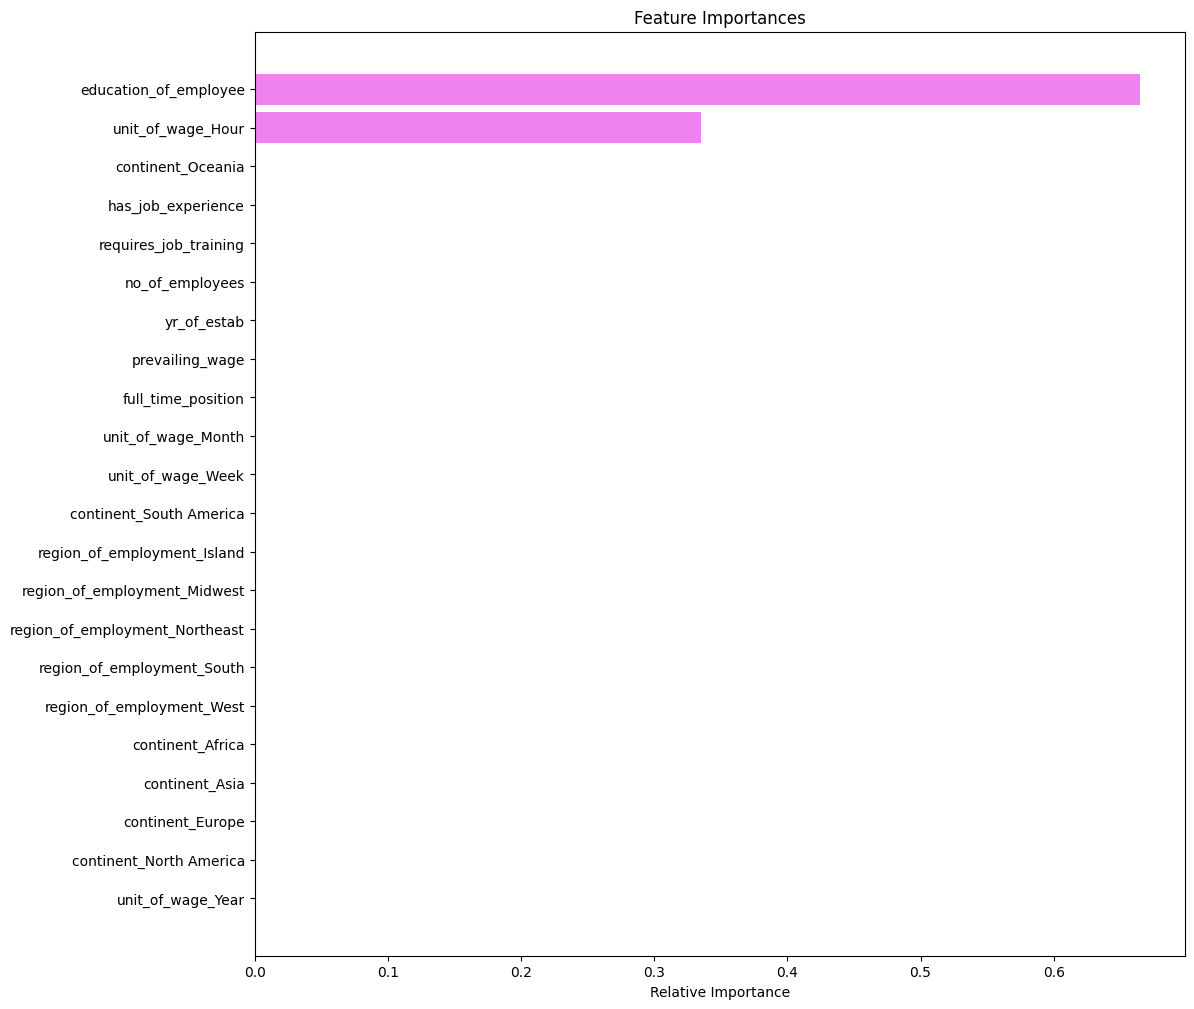

In [79]:
feature_names4= X_train.columns
importances = dtree_post_prune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names4[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The performance for both The post pruned and pre-pruned decision tree has improved when compared to the basic decision tree.
- Both models are also fitting very well,and can generalized on unseen data very well now.

##Stacking model

- For the stacking model, I will be using pre-pruned decision tree model,tuned Ada Boost model, and and tuned GBM model as meta estimators.
- The XGB classifier will be used as the final estimator.

In [174]:
estimators=[('Decision Tree pre pruned', dtree_pre_prune),('Ada boosting', ab_tuned),
           ('Gradient boosting', gb_tuned )]
final_estimator=XGBClassifier(random_state=1)

In [175]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree pre pruned',
                                DecisionTreeClassifier(max_depth=4,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=7,
                                                       random_state=1)),
                               ('Ada boosting',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.8,
                                                   n_estimators=20,
                                                   random_state=1)),
                               ('...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

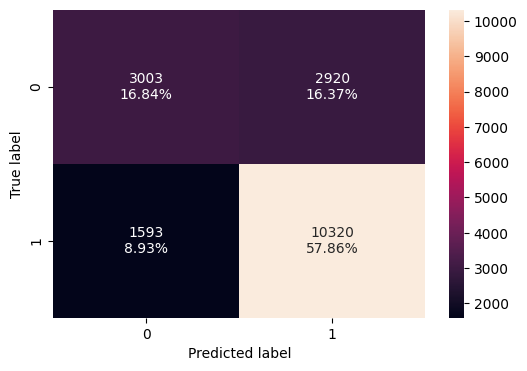

In [176]:
confusion_matrix_sklearn(stacking_estimator, X_train,y_train)

In [177]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision      F1
0   0.74697 0.86628    0.77946 0.82058


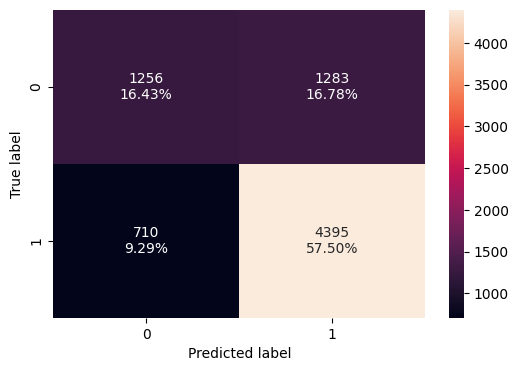

In [178]:
confusion_matrix_sklearn(stacking_estimator, X_test,y_test)

In [179]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0   0.73927 0.86092    0.77404 0.81517


- The stacking model is also performing well, though there is very little over-fitting with the model.

- The F1_score of this model still slightly falls short when compared to the performance of the tuned GBM model.

## Model Performance Comparison and Conclusions

###Model comparism

In [180]:
# Training performance comparison

models_train_comp_df = pd.concat([
    dtree_model_train_perf.T, bagging_model_train_perf.T, bagging_wt_model_train_perf.T,
    rf_model_train_perf.T, rf_wt_model_train_perf.T, gb_model_train_perf.T,
    ab_classifier_model_train_perf.T, xgb_classifer_model_train_perf.T,
    gb_model_tuned_train_perf.T, ab_model_tuned_train_perf.T, xgb_tuned_model_train_perf.T,
    rf_classifier_tuned_model_train_perf.T, bagging_classifier_tuned_model_train_perf.T,
    dtree_post_prune_model_train_perf.T, dtree_pre_prune_model_train_perf.T, stacking_estimator_model_train_perf .T,
], axis=1)

models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging classifer",
    "Bagging Estimator wt weights",
    "Random Forest classifier",
    "Random Forest classifier wt weights",
    "Gradient Boost classifier",
    "Adaboost classifier",
    "XGB classifier",
    "Gradient Boost Tuned",
    "Adaboost Tuned",
    "XGB Tuned",
    "Random Forest Classifier tuned",
    "Bagging classifier tuned",
    'Decesion tree classifier(post-pruned)',
    "Decision tree classifier(pre-pruned)",
    "Stacking estimator"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Bagging classifer  Bagging Estimator wt weights  \
Accuracy         1.00000            0.98312                       0.98458   
Recall           1.00000            0.98372                       0.98539   
Precision        1.00000            0.99095                       0.99147   
F1               1.00000            0.98732                       0.98842   

           Random Forest classifier  Random Forest classifier wt weights  \
Accuracy                    1.00000                              1.00000   
Recall                      1.00000                              1.00000   
Precision                   1.00000                              1.00000   
F1                          1.00000                              1.00000   

           Gradient Boost classifier  Adaboost classifier  XGB classifier  \
Accuracy                     0.75791              0.73710         0.84587   
Recall                       0.88332              0.88945         0.93184   
Precision                    0.78232              0.75859         0.85143   
F1                           0.82976              0.81882         0.88982   

           Gradient Boost Tuned  Adaboost Tuned  XGB Tuned  \
Accuracy                0.74983         0.73688    0.76233   
Recall                  0.89801         0.89499    0.88903   
Precision               0.76716         0.75596    0.78405   
F1                      0.82744         0.81962    0.83325   

           Random Forest Classifier tuned  Bagging classifier tuned  \
Accuracy                          0.79160                   0.99804   
Recall                            0.90859                   0.99983   
Precision                         0.80464                   0.99724   
F1                                0.85346                   0.99853   

           Decesion tree classifier(post-pruned)  \
Accuracy                                 0.73032   
Recall                                   0.89323   
Precision                                0.75048   
F1                                       0.81565   

           Decision tree classifier(pre-pruned)  Stacking estimator  
Accuracy                                0.73817             0.74697  
Recall                                  0.91715             0.86628  
Precision                               0.74790             0.77946  
F1                                      0.82392             0.82058

In [181]:
# Test performance comparison

models_test_comp_df = pd.concat([
    dtree_model_test_perf.T, bagging_model_test_perf.T, bagging_wt_model_test_perf.T,
    rf_model_test_perf.T, rf_wt_model_test_perf.T, gb_model_test_perf.T,
    ab_classifier_model_test_perf.T, xgb_classifer_model_test_perf.T,
    gb_model_tuned_test_perf.T, ab_model_tuned_test_perf.T, xgb_tuned_model_test_perf.T,
    rf_classifier_tuned_model_test_perf.T, bagging_classifier_tuned_model_test_perf.T,
    dtree_post_prune_model_test_perf.T, dtree_pre_prune_model_test_perf.T, stacking_estimator_model_test_perf.T
], axis=1)

models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging estimator",
    "Bagging Estimator wt weights",
    "Random Forest classifier",
    "Random Forest classifier wt weights",
    "Gradient Boost classifier",
    "Adaboost classifier",
    "XGB classifier",
    "Gradient Boost Tuned",
    "Adaboost Tuned",
    "XGB Tuned",
    "Random Forest Classifier tuned",
    "Bagging classifier tuned",
    'Decision tree classifier(post-pruned)',
    "Decision tree classifier(pre-pruned)",
    "Stacking Estimator"
]

print("Test performance comparison:")
(models_test_comp_df)




Test performance comparison:


Decision Tree  Bagging estimator  Bagging Estimator wt weights  \
Accuracy         0.66130            0.69780                       0.69008   
Recall           0.74535            0.77160                       0.76631   
Precision        0.74696            0.77494                       0.76887   
F1               0.74615            0.77326                       0.76759   

           Random Forest classifier  Random Forest classifier wt weights  \
Accuracy                    0.72305                              0.72083   
Recall                      0.83565                              0.82997   
Precision                   0.76948                              0.76994   
F1                          0.80120                              0.79883   

           Gradient Boost classifier  Adaboost classifier  XGB classifier  \
Accuracy                     0.74555              0.73299         0.72828   
Recall                       0.87640              0.88521         0.85524   
Precision                    0.77298              0.75644         0.76543   
F1                           0.82144              0.81578         0.80785   

           Gradient Boost Tuned  Adaboost Tuned  XGB Tuned  \
Accuracy                0.74241         0.73155    0.74451   
Recall                  0.89618         0.89246    0.87796   
Precision               0.76072         0.75194    0.77116   
F1                      0.82292         0.81619    0.82110   

           Random Forest Classifier tuned  Bagging classifier tuned  \
Accuracy                          0.74385                   0.72684   
Recall                            0.87346                   0.88737   
Precision                         0.77266                   0.74963   
F1                                0.81997                   0.81270   

           Decision tree classifier(post-pruned)  \
Accuracy                                 0.72580   
Recall                                   0.89403   
Precision                                0.74587   
F1                                       0.81326   

           Decision tree classifier(pre-pruned)  Stacking Estimator  
Accuracy                                0.72985             0.73927  
Recall                                  0.91557             0.86092  
Precision                               0.74096             0.77404  
F1                                      0.81907             0.81517

- The tuned Gradient boost is the best performance with an F1_SCORE of 82.23%. - It also one of the best two models in terms of generalizing on unseen data as it is almost perfectly fitted, the one almost perfectly fitting is the Adaboost tuned.
- The top two models are are GBM tuned and XGB tuned. Though the XGB tuned model is slightly overfited.

- The final model selceted is the GBM tuned model.

###Final prediction and conclusion

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee          0.50100
has_job_experience             0.16214
prevailing_wage                0.06961
unit_of_wage_Hour              0.06483
continent_Europe               0.05783
region_of_employment_Midwest   0.03336
unit_of_wage_Year              0.02089
region_of_employment_South     0.02024
continent_North America        0.01625
region_of_employment_West      0.01380
continent_Asia                 0.01150
region_of_employment_Northeast 0.00743
yr_of_estab                    0.00649
no_of_employees                0.00514
full_time_position             0.00390
continent_South America        0.00361
requires_job_training          0.00113
continent_Africa               0.00046
region_of_employment_Island    0.00021
unit_of_wage_Month             0.00011
unit_of_wage_Week              0.00007
continent_Oceania              0.00000


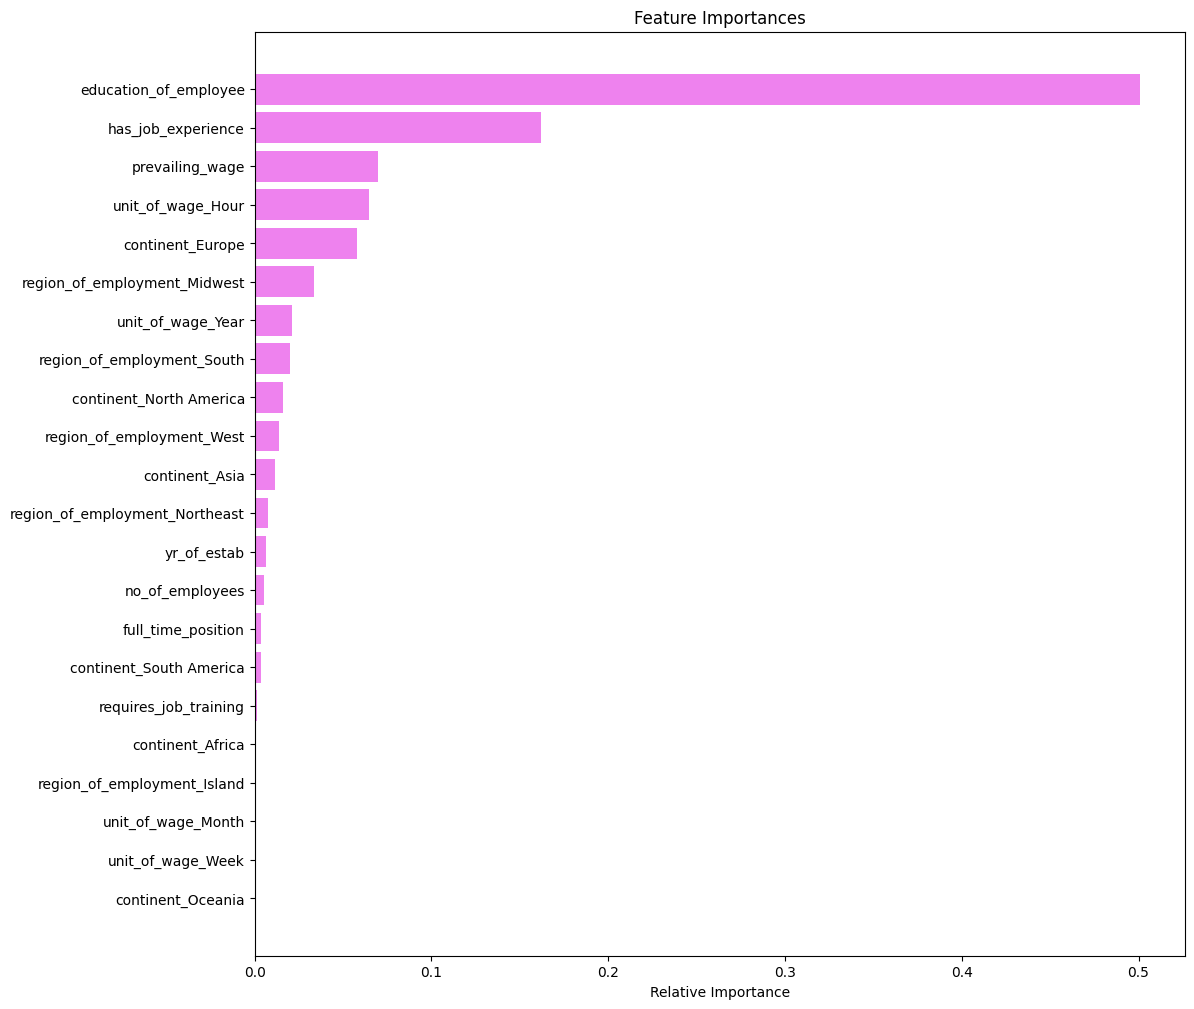

In [ ]:
feature_names7 = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names7[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Education level of employee is the most important feature which alligns with my findings during EDA.
- Job Experience is the second most important feature.
- Other than the above two, the other features have very little importance predicting if a employee visa application will be certified or denied.

## Actionable Insights and Recommendations

- The final model is quite strong in predicting visa case status going forward as long as the features supplied are the same with what was used in training the model. With this model, visa approval or denial processes can be done with accuracy mimicking the key factors important to immigration staffs when they make visa status decisions. This will also reduce workload and stream-line work flow for immigration officials.

- Contrary to pre-model building believes that prevailing wages play a big role in the immigration official decisions in approval. This model has highlighted that this is not the case. Though, availability of data on the kind of jobs the employees will be doing in the US would have made the immigration official to consider more the prevailing wages when making their decision. For example, for dangerous jobs that require higher pay locally, if foreign employees are paid lower wages, this might lead to such visas been denied.

- Hence, further data on job nature of these employees need to be collected.

- The education level of employee play the biggest role in visa case status decisions.The final model and EDA agree greatly in this observation. The higher the educational level the more likely the Visa will be approved, as does with very high educational qualification likely possess skills not readily available in country. As observed those with doctorates degrees have an 80% chance of their visa been approved.
- Similiarly, job experience is hugely factored in by immigration officials when processing visas. Their assumption is that experienced employee may possess critical skills in-demand in-country.
- Therefore, the immigration authorities should create a system that prioritizes processing visas of employees with doctorate degrees as well as employees with many years of experience.

- Also,it was also observed that employees with unit wage of hourly are more likely to get their Visas denied. This is understandable because hourly paid jobs make it difficult to know the potential yearly income of the employee. Yearly unit of income is the preffered unit the IRS use for calculating annual income taxes. Also, jobs which require the best brain from around the world are likely to use a yearly unit of wage. The immigration should put a circular to potential employers sponsoring employee visa application. The message should be that, they should endeavour to use yearly unit of wages foe ease of visa processing.

- From the data, immigration officials are not racially decriminatory when reviewing visa applications, this is demonstated by the quite similiar visa approval rates accross all the continents.